# **Vaccination Prediction Project**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Installing the library
!pip install category_encoders

# Importing Relevant Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import category_encoders as ce

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost     # extreme gradient boosting
import warnings
warnings.filterwarnings('ignore')
# To visualize the 100 many the columns in data
pd.options.display.max_columns=100

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.9 MB/s eta 0:00:00


In [3]:
# Reading in the feature data
data1 = pd.read_csv('/content/drive/MyDrive/vaccination pred/features.csv')
data1.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               NaN                   NaN   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               NaN                          3.0                1.0   
3               NaN                          3.0                3.0   
4               NaN                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own         

In [4]:
# Reading in the target data
data2 = pd.read_csv('/content/drive/MyDrive/vaccination pred/labels.csv')
data2.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0

In [5]:
# Exploring the percentage breakdown of the two classes in one possible target (seasonal flu rate)
data2['seasonal_vaccine'].value_counts(normalize=True)

seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64

In [6]:
# Exploring the percentage breakdown of the two classes in one possible target (H1N1 flu rate)
data2['h1n1_vaccine'].value_counts(normalize=True)   # class imbalance problem

h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64

In [7]:
# Merging feature and target data
df = data1.merge(data2, how='left', on='respondent_id')
df.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               NaN                   NaN   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               NaN                          3.0                1.0   
3               NaN                          3.0                3.0   
4               NaN                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own         

In [8]:
# Getting info about null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [9]:
# Getting number of null values
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
census_msa                         0
household_adults                 249
household_children               249
employment_industry            13330
employment_occupation          13470
h1n1_vaccine                       0
seasonal_vaccine                   0
dtype: int64

In [10]:
# Explore numerical columns
df.describe()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000    26591.000000               26636.000000   
mean    13353.000000      1.618486        1.262532                   0.048844   
std      7709.791156      0.910311        0.618149                   0.215545   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6676.500000      1.000000        1.000000                   0.000000   
50%     13353.000000      2.000000        1.000000                   0.000000   
75%     20029.500000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
count           26579.000000      24547.000000          24547.000000   
mean                0.677264          0.220312              0.329735   
std                 0.467531          0.414466              0.470126   
min                 0.000000          0.000000              0.000000   
25%                 0.000000          0.000000              0.000000   
50%                 1.000000          0.000000              0.000000   
75%                 1.000000          0.000000              1.000000   
max                 1.000000          1.000000              1.000000   

       chronic_med_condition  child_under_6_months  health_worker  \
count           25736.000000          25887.000000   25903.000000   
mean                0.283261              0.082590       0.111918   
std                 0.450591              0.275266       0.315271   
min                 0.000000              0.000000       0.000000   
25%                 0.000000              0.000000       0.000000   
50%                 0.000000              0.000000       0.000000   
75%                 1.000000              0.000000       0.000000   
max                 1.000000              1.000000       1.000000   

       health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count       14433.00000                 26316.000000       26319.000000   
mean            0.87972                     3.850623           2.342566   
std             0.32530                     1.007436           1.285539   
min             0.00000                     1.000000           1.000000   
25%             1.00000                     3.000000           1.000000   
50%             1.00000                     4.000000           2.000000   
75%             1.00000                     5.000000           4.000000   
max             1.00000                     5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count     

In [11]:
df.describe(include='object')

age_group         education   race     sex             income_poverty  \
count       26707             25300  26707   26707                      22284   
unique          5                 4      4       2                          3   
top     65+ Years  College Graduate  White  Female  <= $75,000, Above Poverty   
freq         6843             10097  21222   15858                      12777   

       marital_status rent_or_own employment_status hhs_geo_region  \
count           25299       24665             25244          26707   
unique              2           2                 3             10   
top           Married         Own          Employed       lzgpxyit   
freq            13555       18736             13560           4297   

                      census_msa employment_industry employment_occupation  
count                      26707               13377                 13237  
unique                         3                  21                    23  
top     MSA, Not Principle  City            fcxhlnwr              xtkaffoo  
freq                       11645                2468                  1778

In [12]:
df['hhs_geo_region'].unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

### **The Dataset contents numerous null values contributing the class imbalance and causing the data to be highly skewed**

In [13]:
numerical=df.select_dtypes(include=['float64', 'int64'])

In [14]:
numerical

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                        1.0               0.0                   0.0   
1                        1.0               0.0                   0.0   
2                        0.0               NaN                   NaN   
3                        0.0               0.0                   1.0   
4                        1.0               0.0                   0.0   
...                      ...               ...                   ...   
26702                    0.0               0.0                   0.0   
26703                    0.0               1.0                   1.0   
26704                    1.0               0.0                   0.0   
26705                    NaN               0.0                   0.0   
26706                    0.0               0.0                   0.0   

       chronic_med_condition  child_under_6_months  health_worker  \
0                        0.0                   0.0            0.0   
1                        0.0                   0.0            0.0   
2                        1.0                   0.0            0.0   
3                        1.0                   0.0            0.0   
4                        0.0                   0.0            0.0   
...                      ...                   ...            ...   
26702           

In [15]:
numerical.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [16]:
categorical=df.select_dtypes(exclude=['float64', 'int64'])

In [17]:
categorical

age_group         education      race     sex  \
0      55 - 64 Years        < 12 Years     White  Female   
1      35 - 44 Years          12 Years     White    Male   
2      18 - 34 Years  College Graduate     White    Male   
3          65+ Years          12 Years     White  Female   
4      45 - 54 Years      Some College     White  Female   
...              ...               ...       ...     ...   
26702      65+ Years      Some College     White  Female   
26703  18 - 34 Years  College Graduate     White    Male   
26704  55 - 64 Years      Some College     White  Female   
26705  18 - 34 Years      Some College  Hispanic  Female   
26706      65+ Years      Some College     White    Male   

                  income_poverty marital_status rent_or_own  \
0                  Below Poverty    Not Married         Own   
1                  Below Poverty    Not Married        Rent   
2      <= $75,000, Above Poverty    Not Married         Own   
3                  Below Poverty    Not Married        Rent   
4      <= $75,000, Above Poverty        Married         Own   
...                          ...            ...         ...   
26702  <= $75,000, Above Poverty    Not Married         Own   
26703  <= $75,000, Above Poverty    Not Married        Rent   
26704                        NaN    Not Married         Own   
26705  <= $75,000, Above Poverty        Married        Rent   
26706  <= $75,000, Above Poverty        Married         Own   

        employment_status hhs_geo_region                census_msa  \
0      Not in Labor Force       oxchjgsf                   Non-MSA   
1                Employed       bhuqouqj  MSA, Not Principle  City   
2                Employed       qufhixun  MSA, Not Principle  City   
3      Not in Labor Force       lrircsnp       MSA, Principle City   
4                Employed       qufhixun  MSA, Not Principle  City   
...                   ...            ...                       ...   
26702  Not in Labor Force       qufhixun                   Non-MSA   
26703            Employed       lzgpxyit       MSA, Principle City   
26704                 NaN       lzgpxyit  MSA, Not Principle  City   
26705            Employed       lrircsnp                   Non-MSA   
26706  Not in Labor Force       mlyzmhmf       MSA, Principle City   

      employment_industry employment_occupation  
0                     NaN                   NaN  
1                pxcmvdjn              xgwztkwe  
2                rucpziij              xtkaffoo  
3                     NaN                   NaN  
4                wxleyezf              emcorrxb  
...                   ...                   ...  
26702                 NaN                   NaN  
26703            fcxhlnwr              cmhcxjea  
26704                 NaN                   NaN  
26705            fcxhlnwr              haliazsg  
26706                 NaN                   NaN  

[26707 rows x 12 columns]

### **Exploratory Data Analysis**

### **Uni-Variate Analysis**

In [18]:
def plot_count(x,data,title,xlabel,ylabel):
  plt.figure(figsize=(20,8))
  sns.countplot(x=x,data=df)
  plt.title(f"{title} V/S Counts", fontsize=16)
  plt.xticks(rotation=45)
  plt.xlabel(f"{xlabel}",fontsize=12)
  plt.ylabel(f"{ylabel}",fontsize=12)
  plt.show()

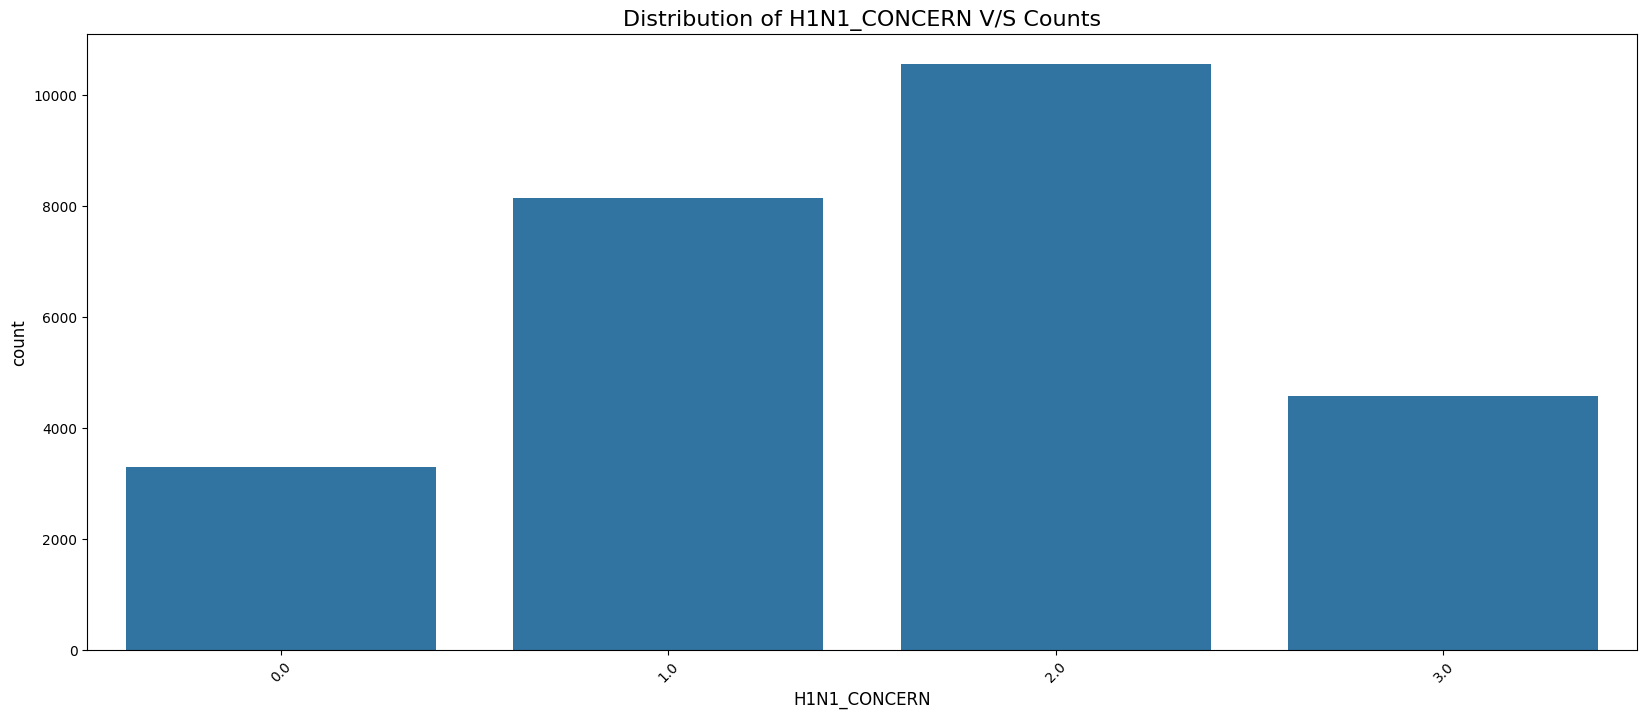

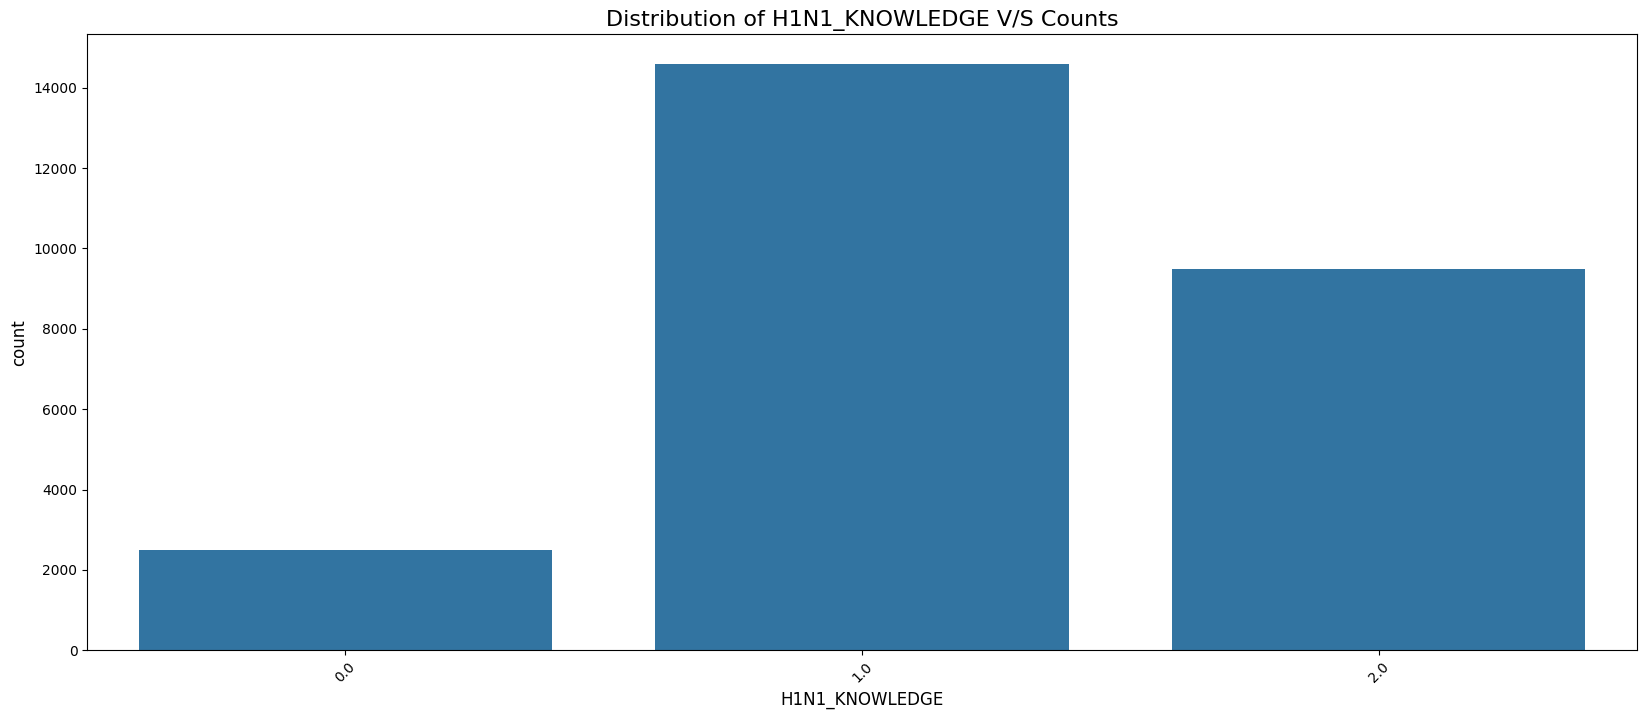

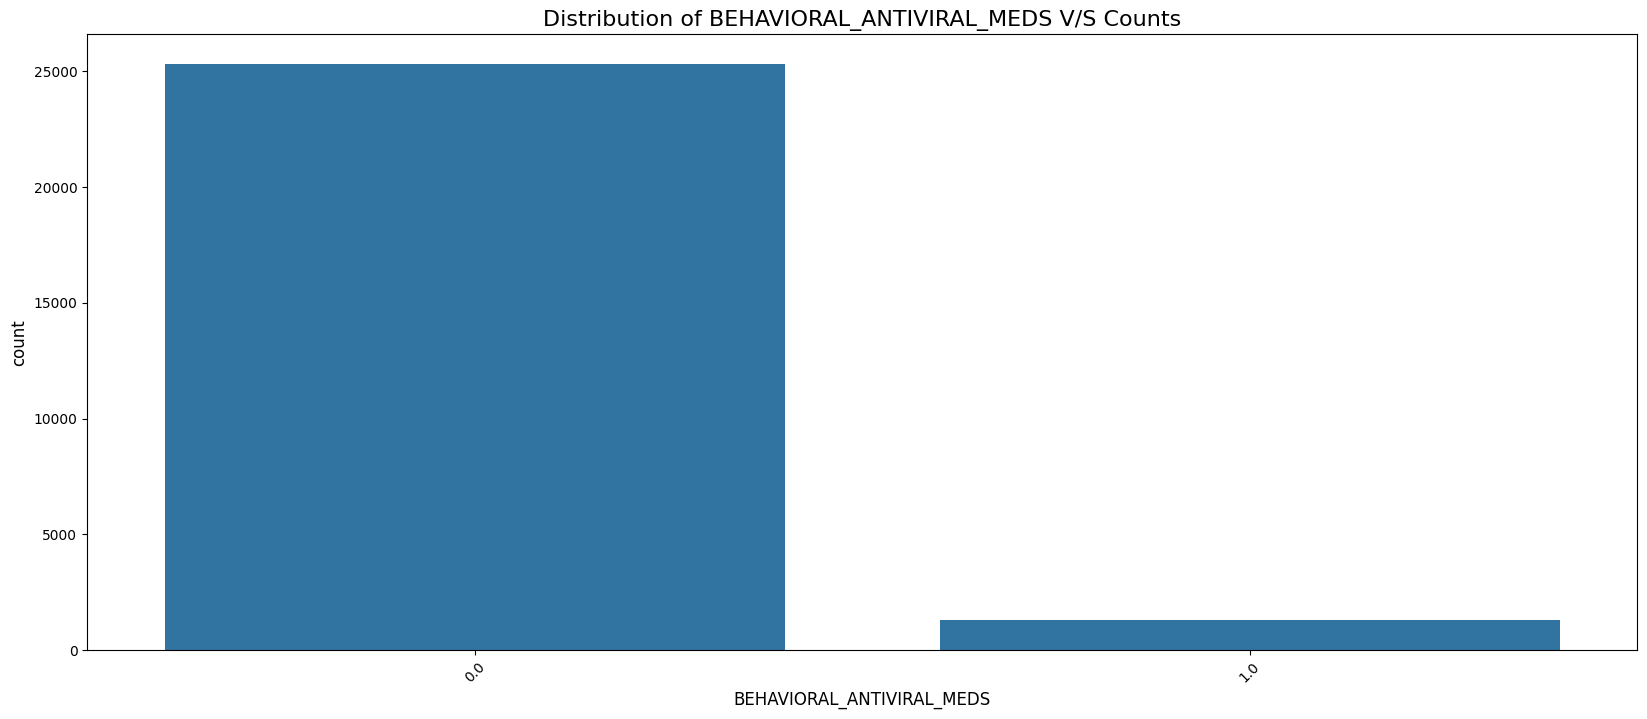

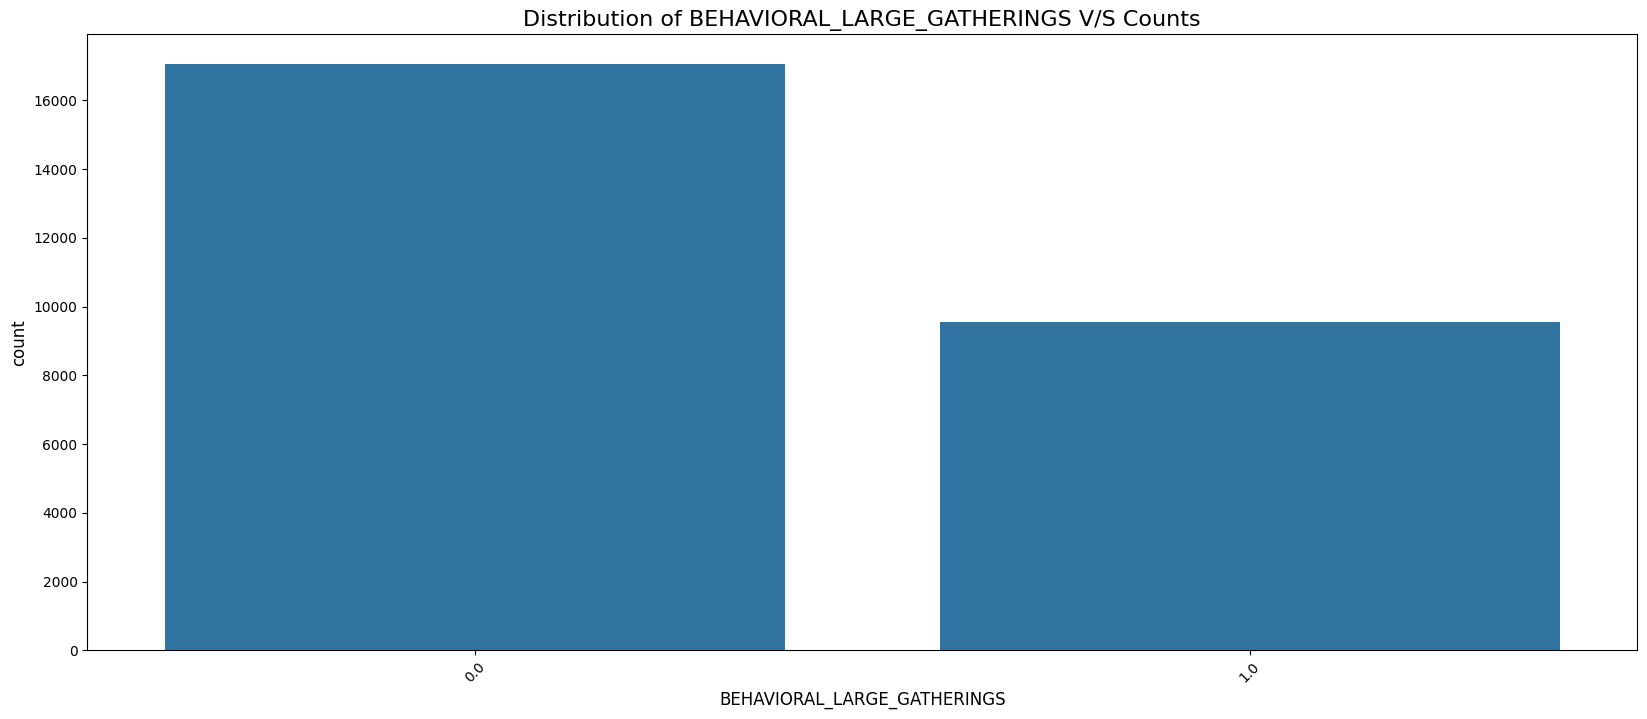

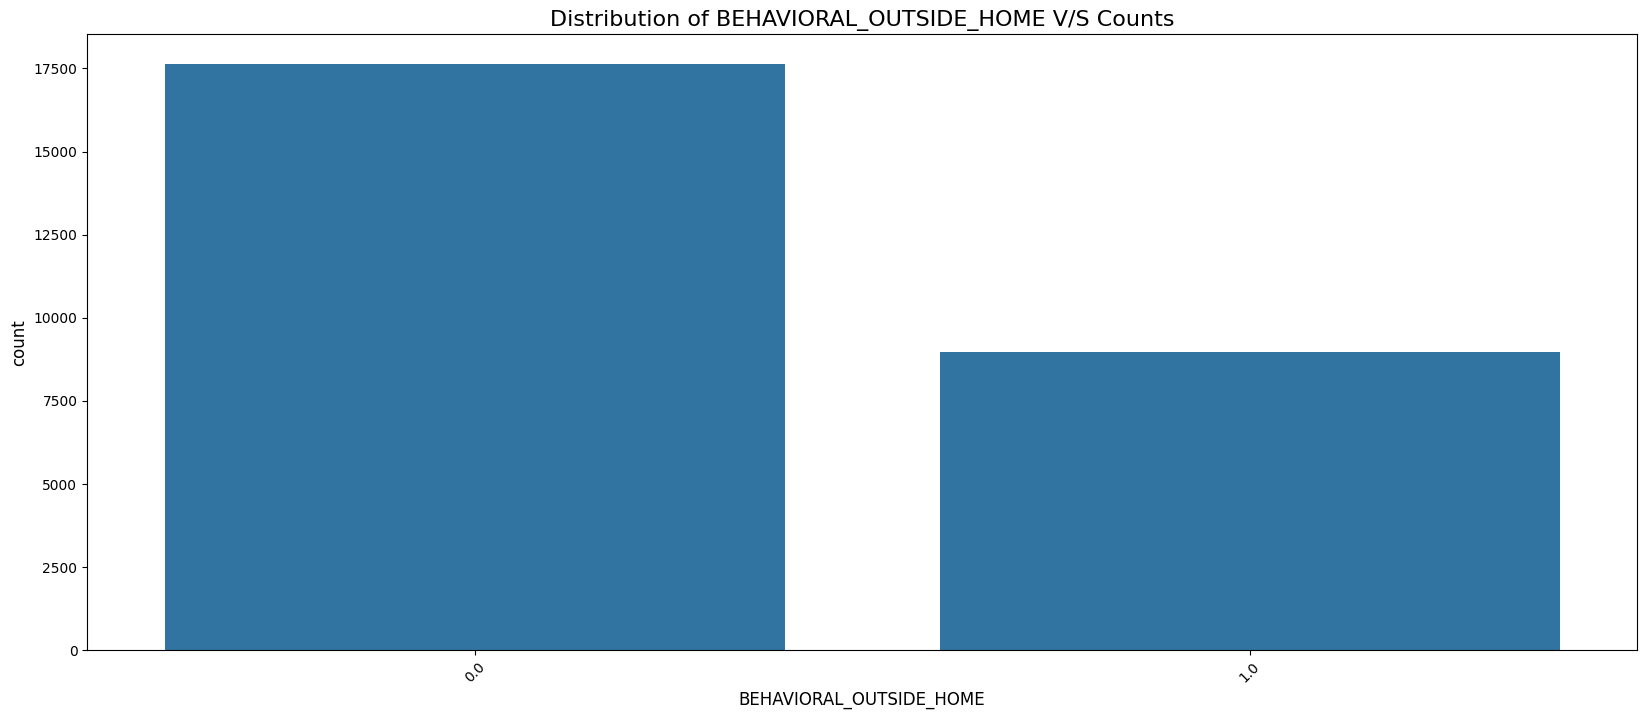

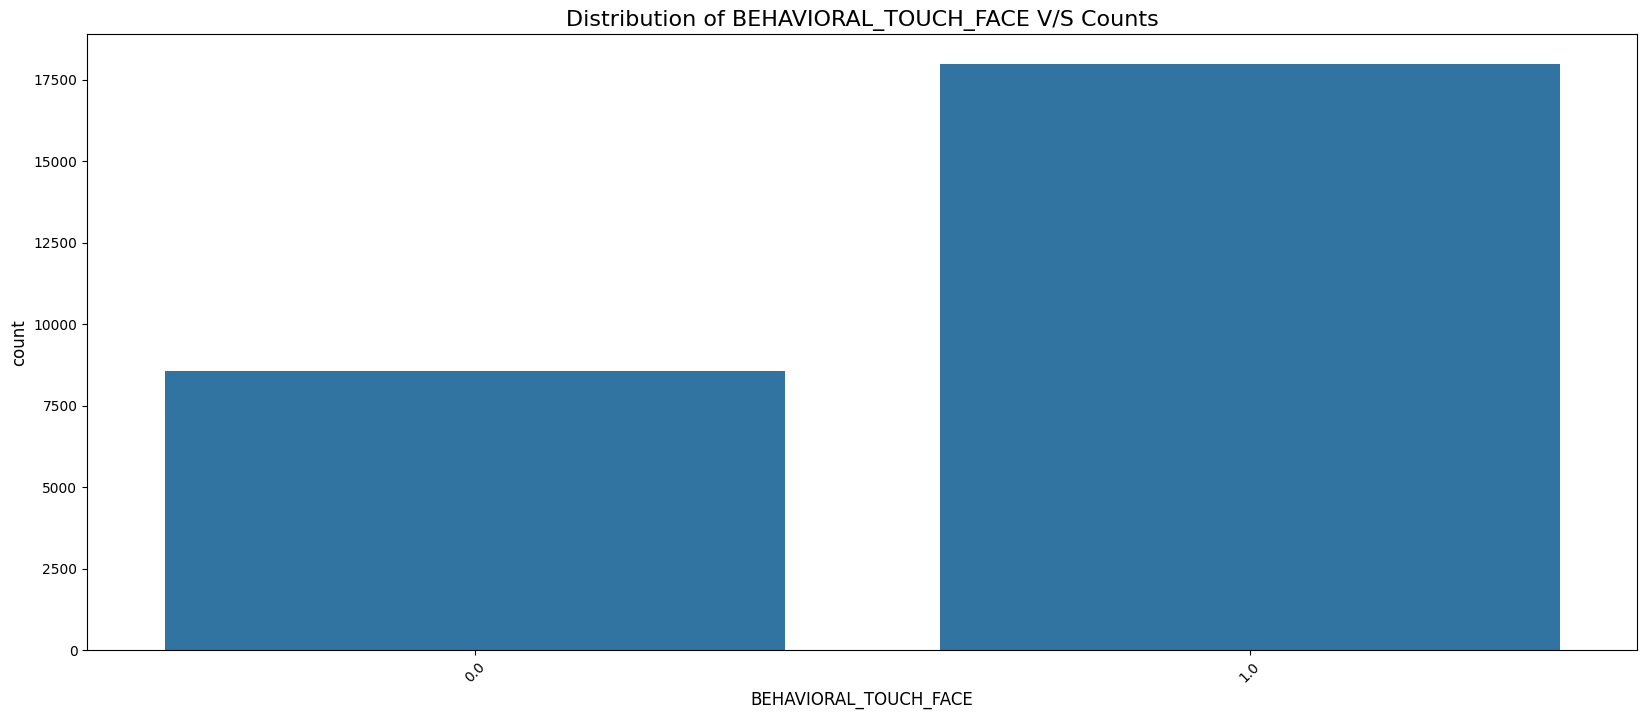

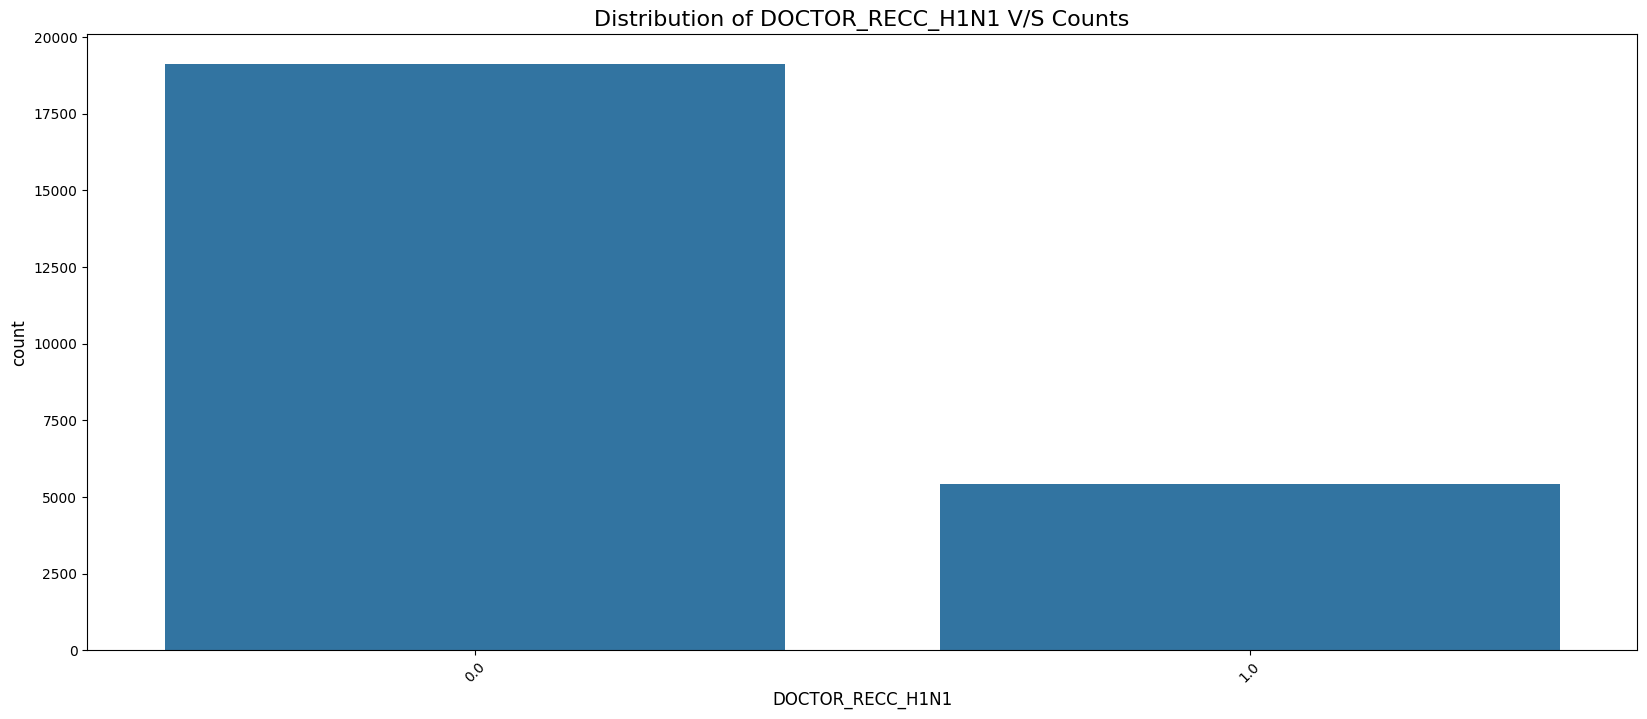

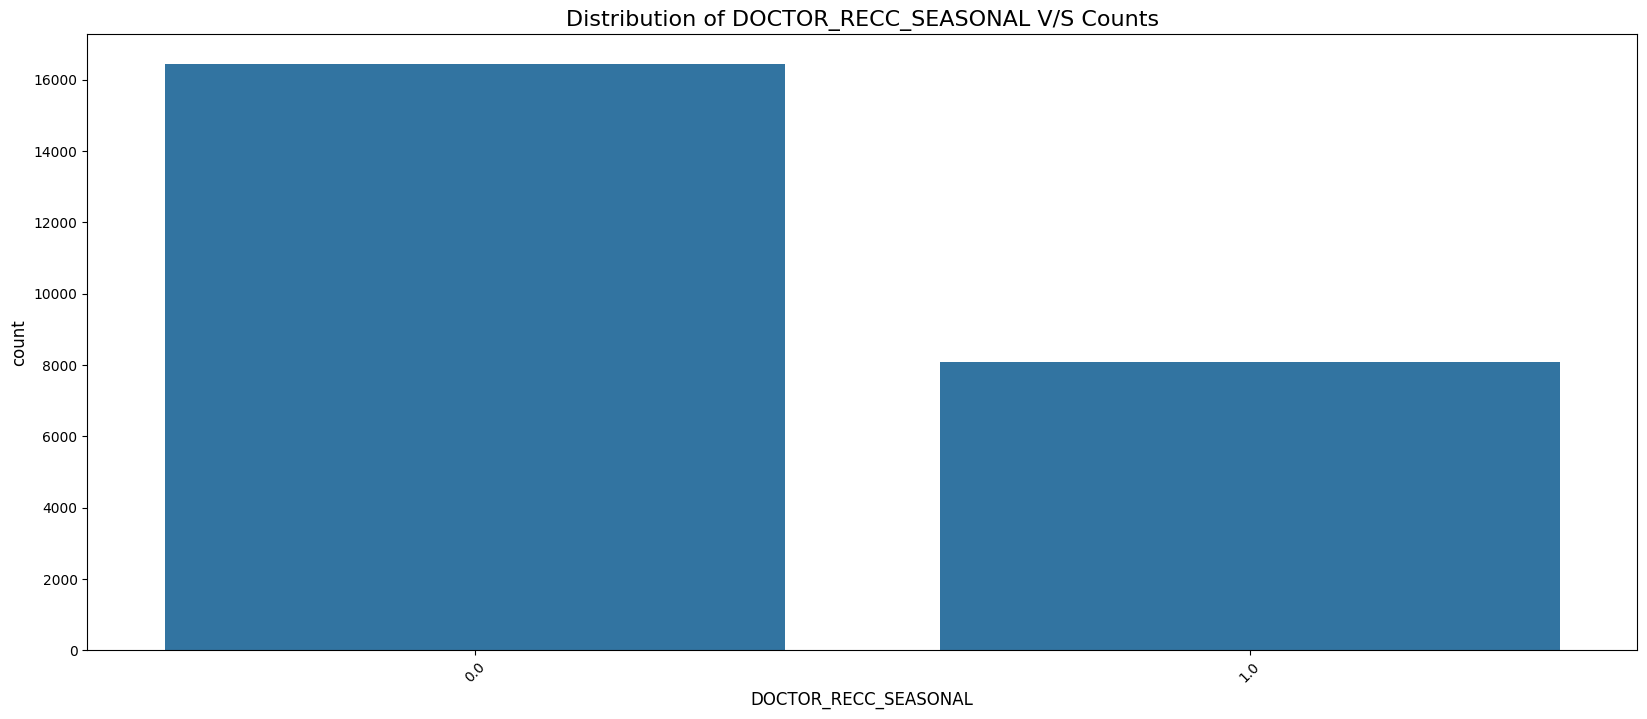

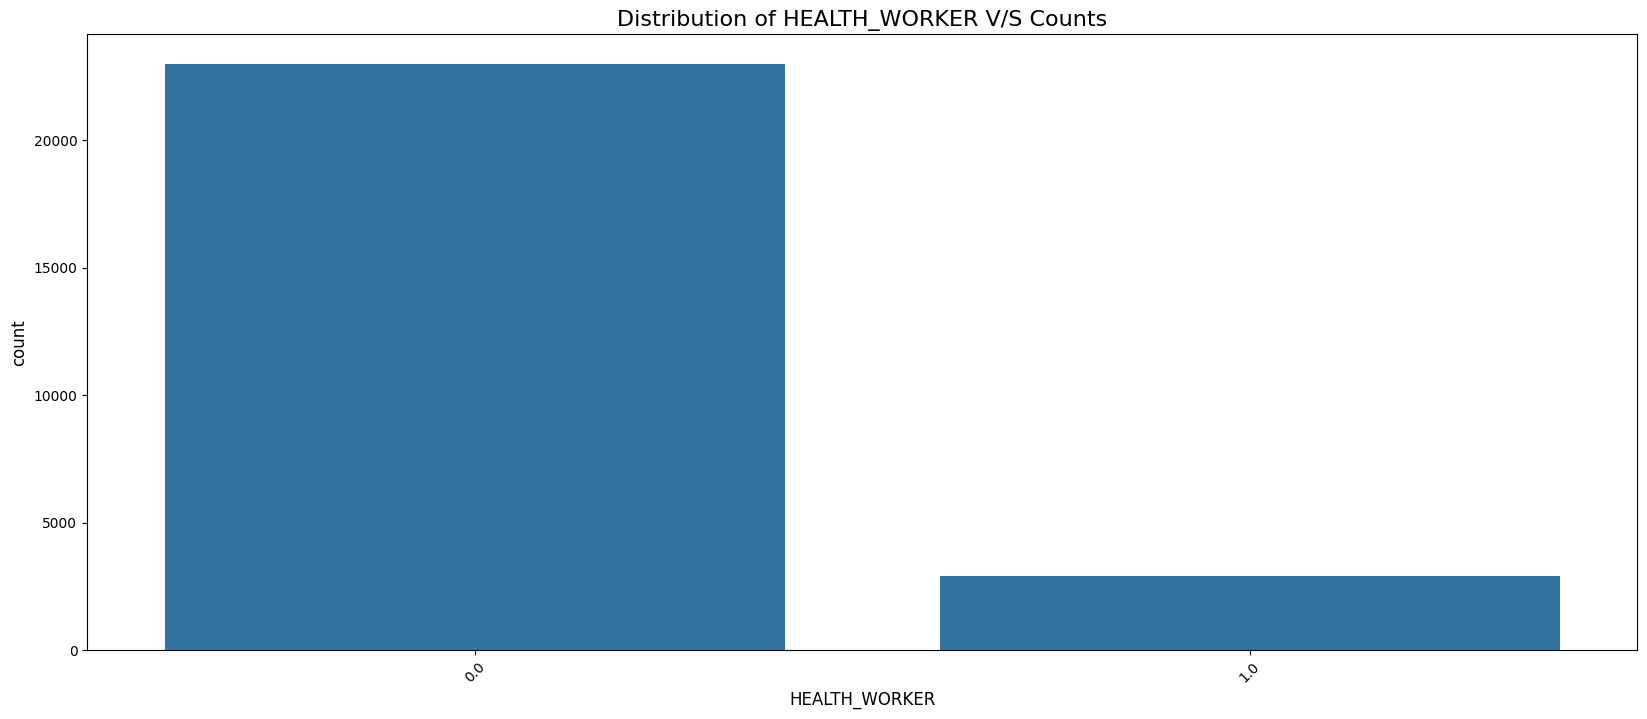

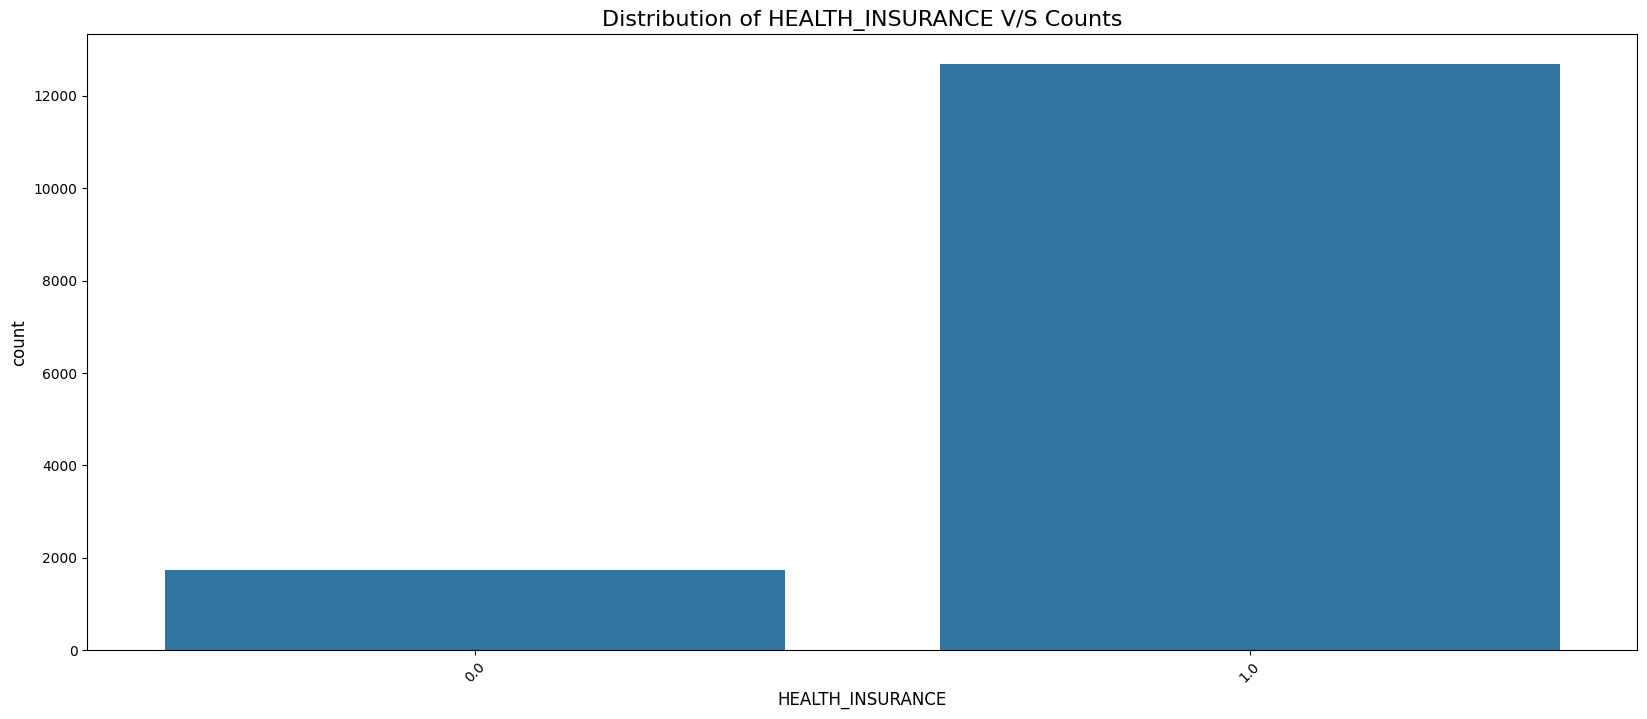

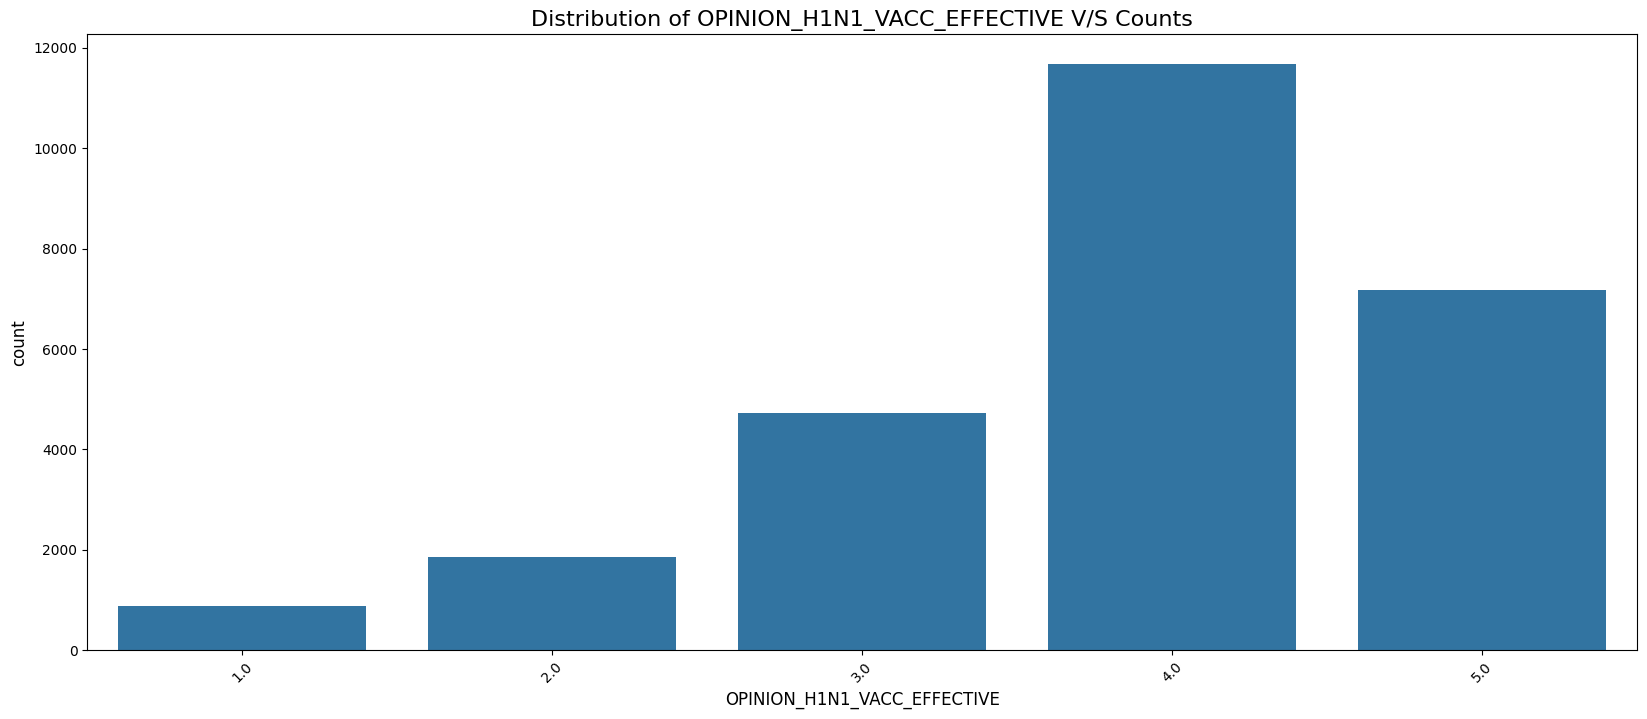

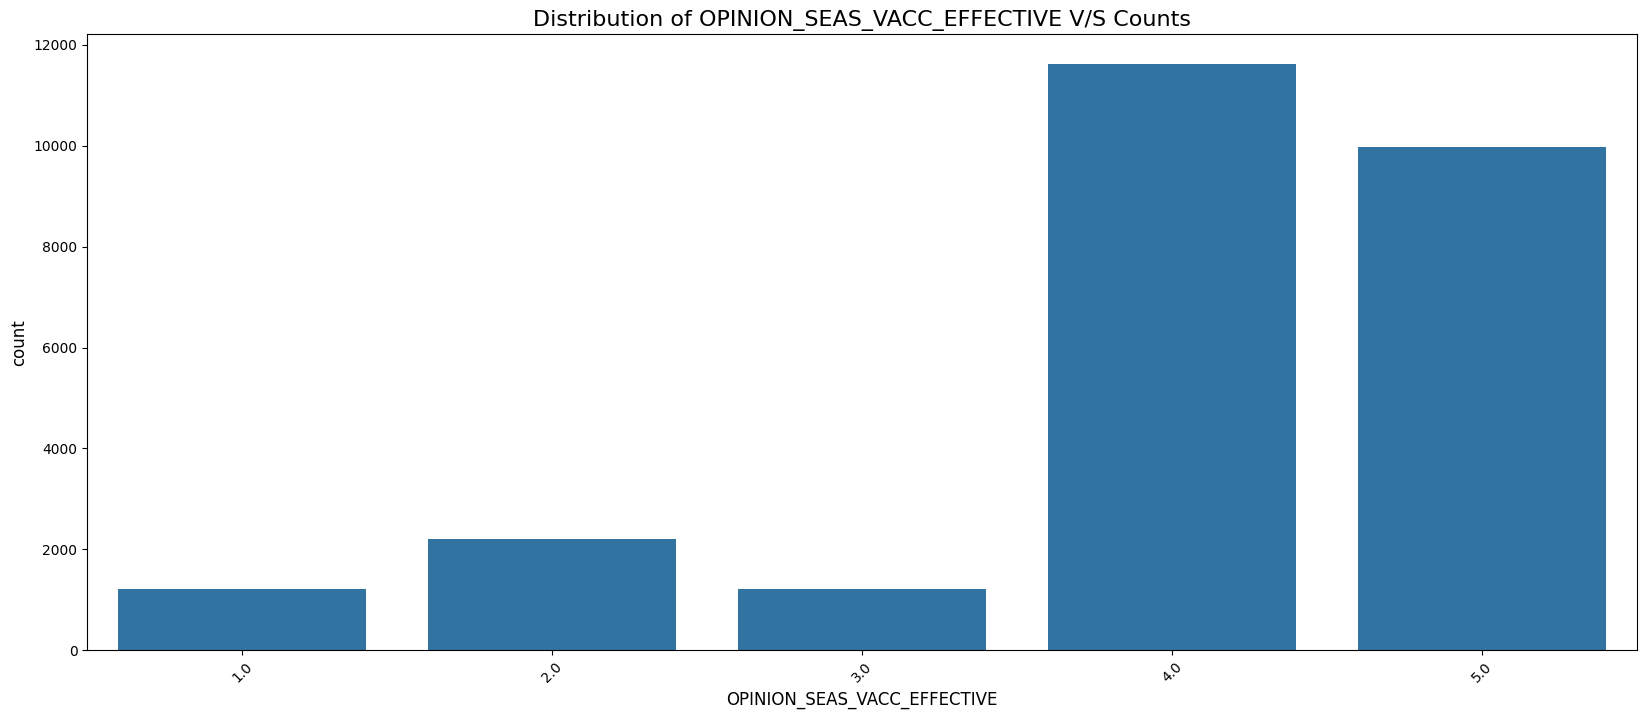

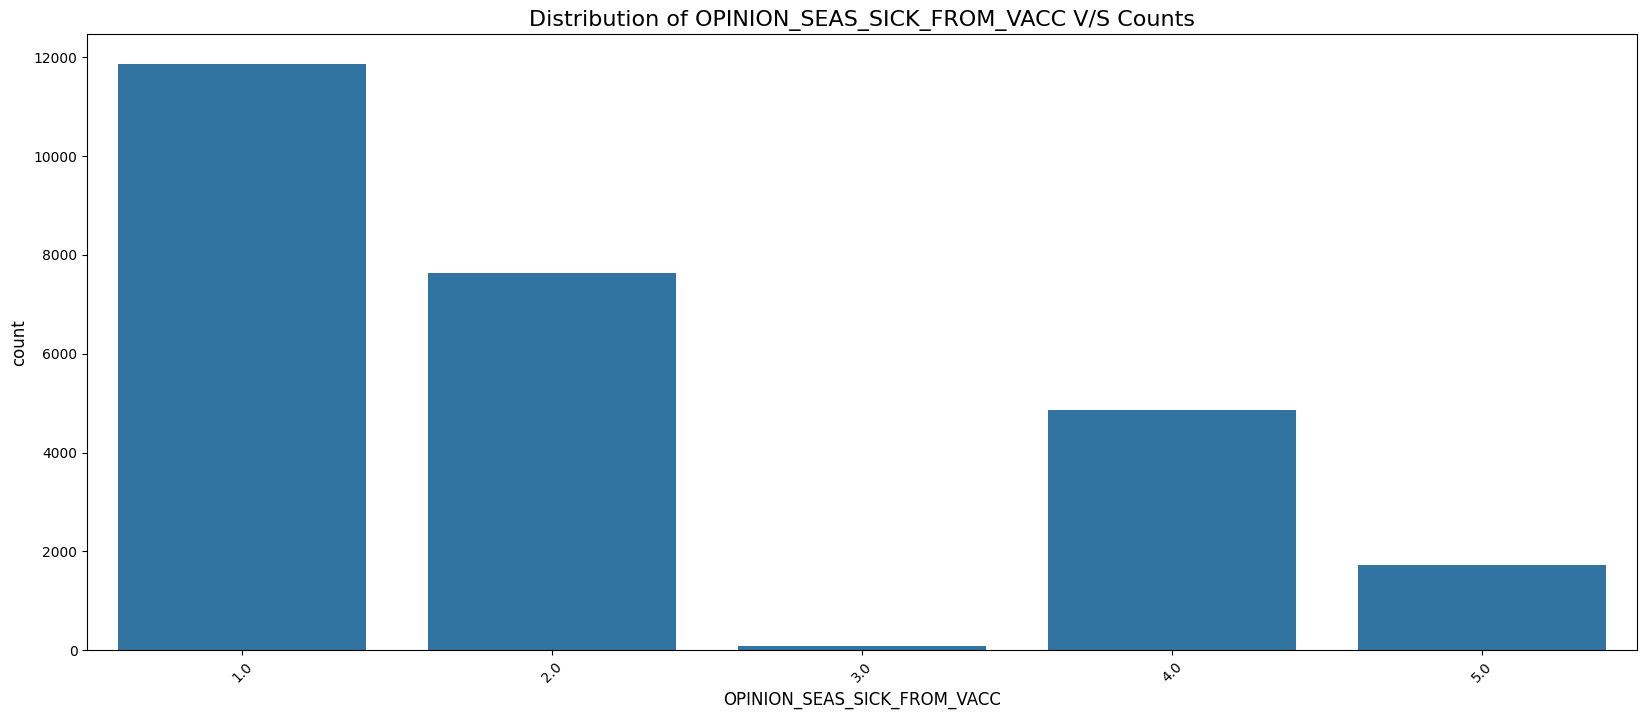

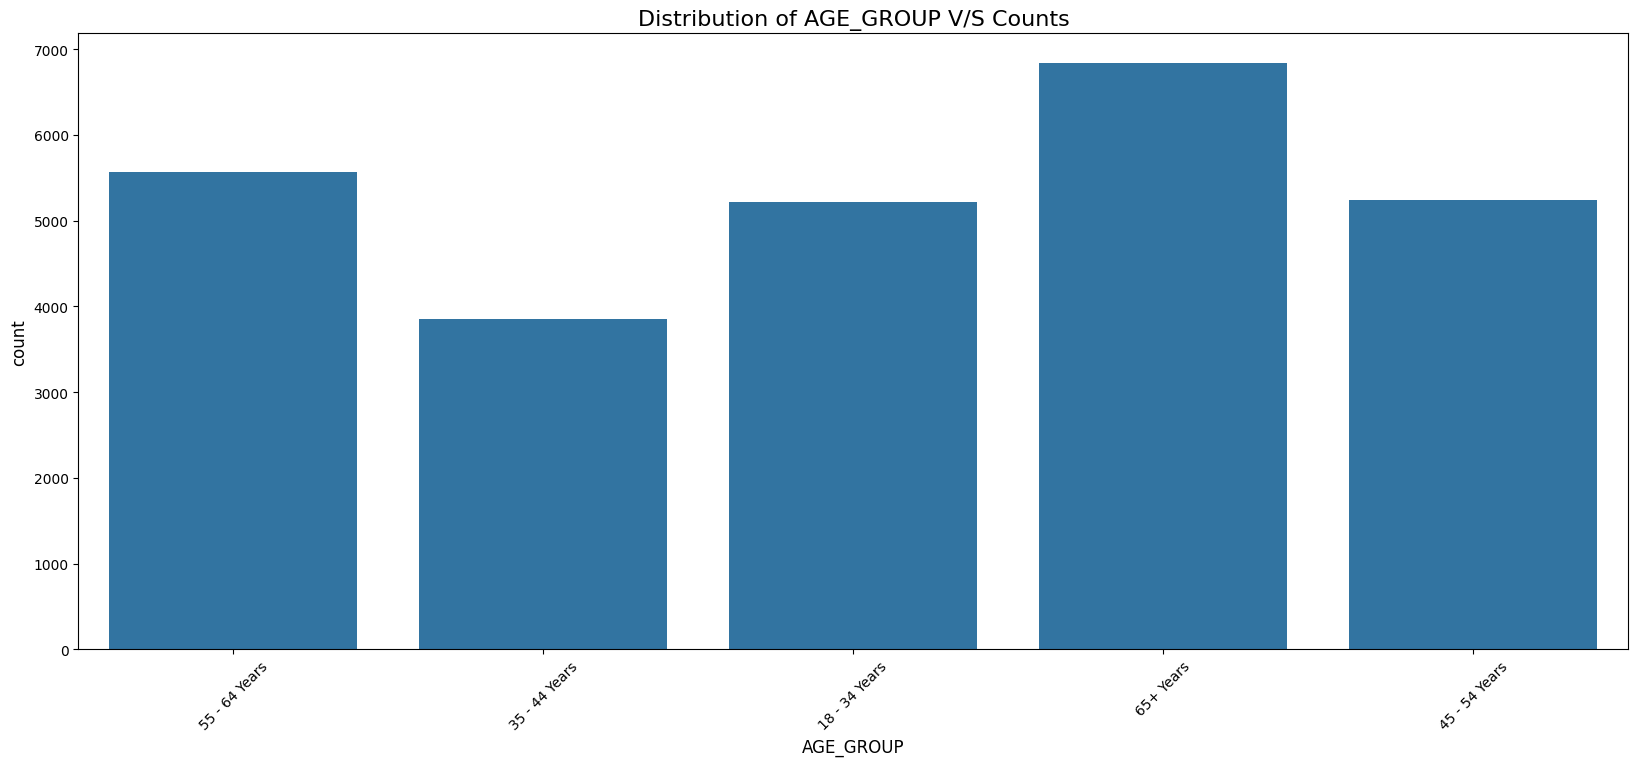

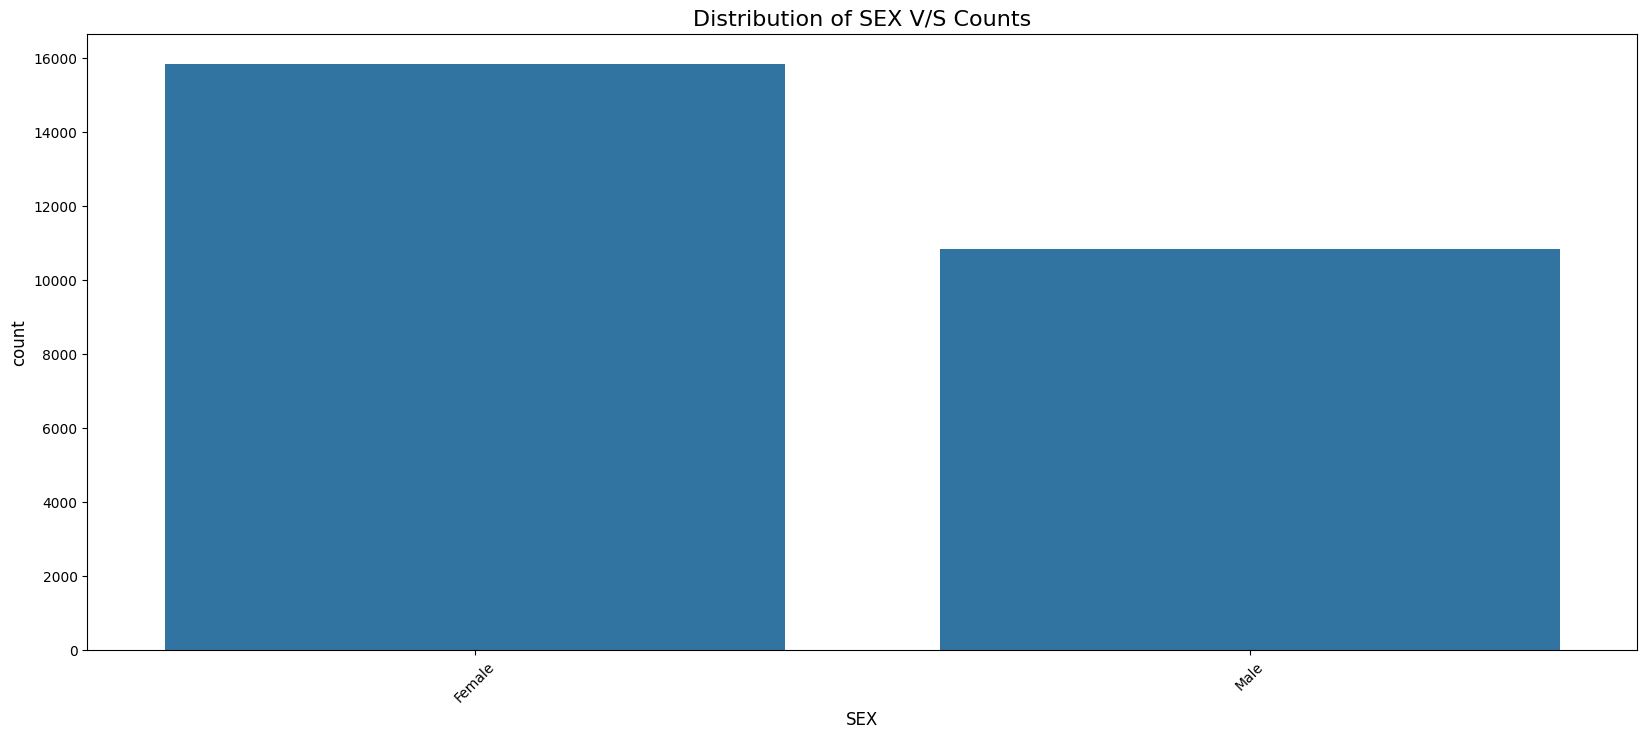

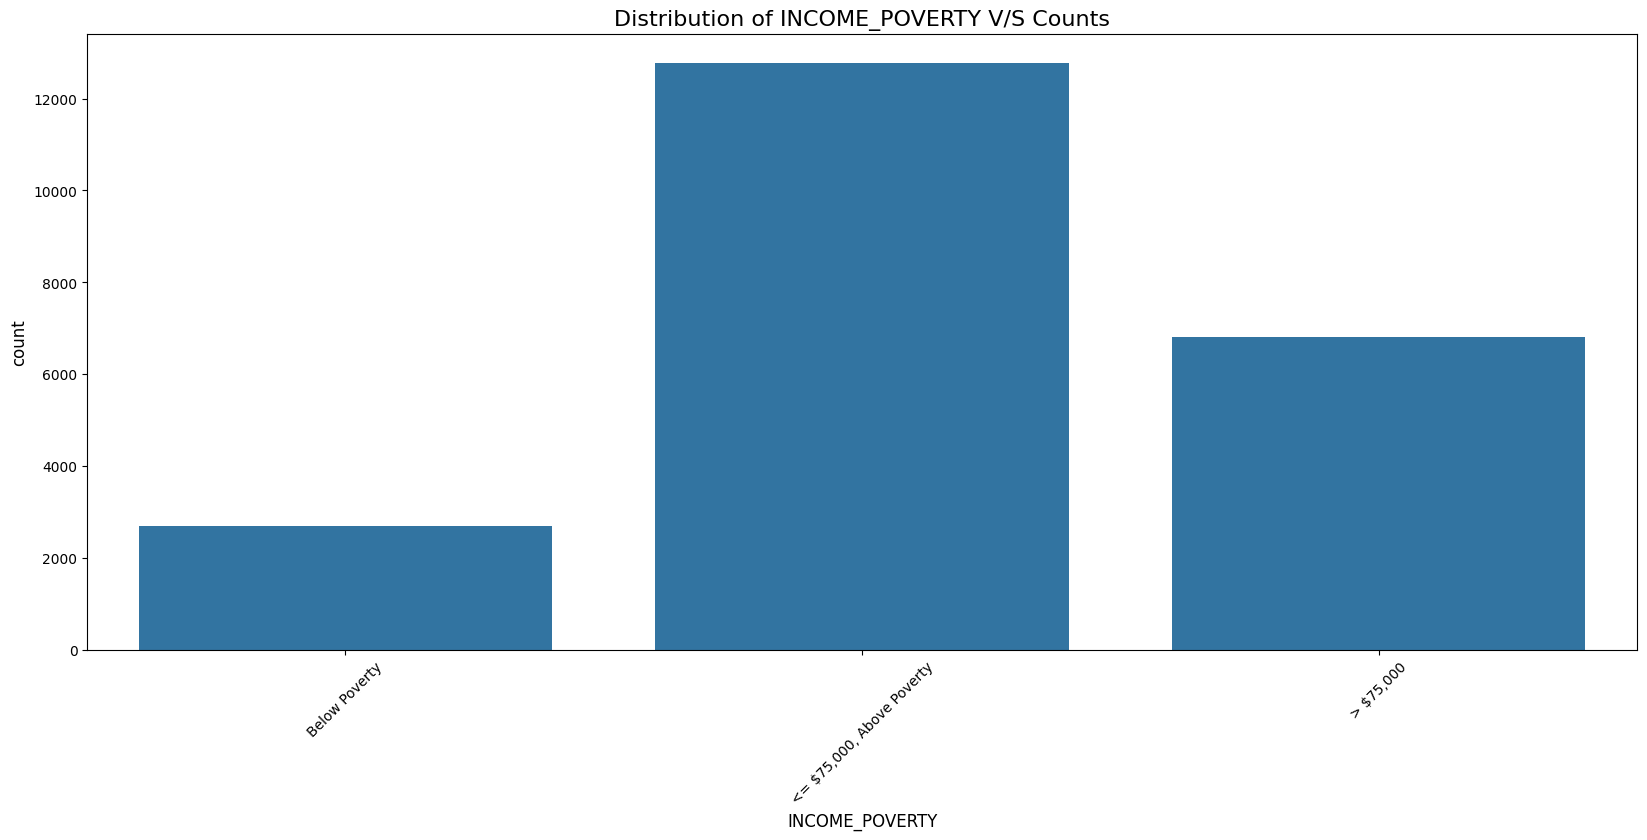

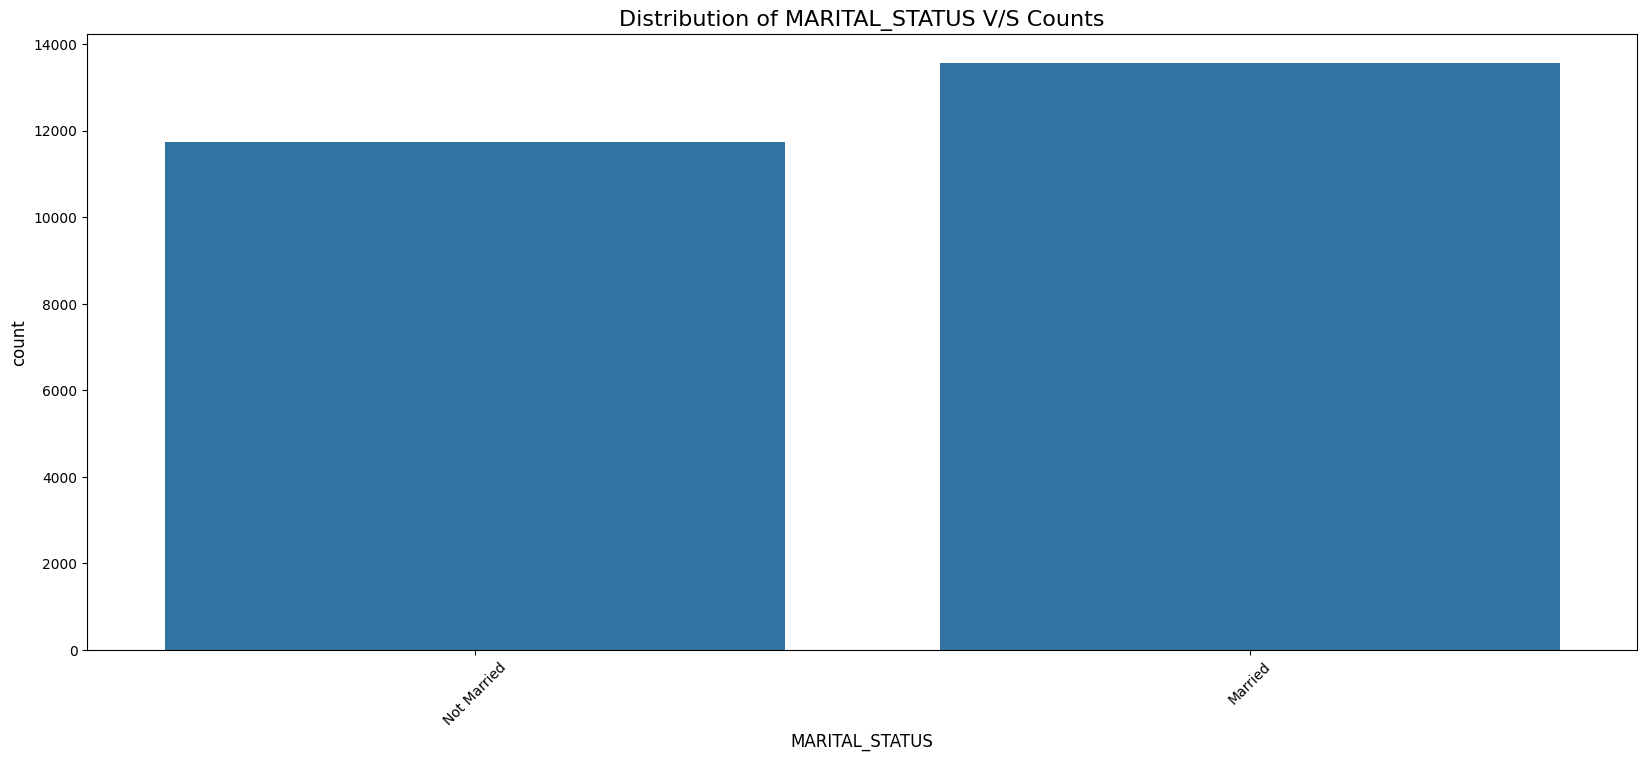

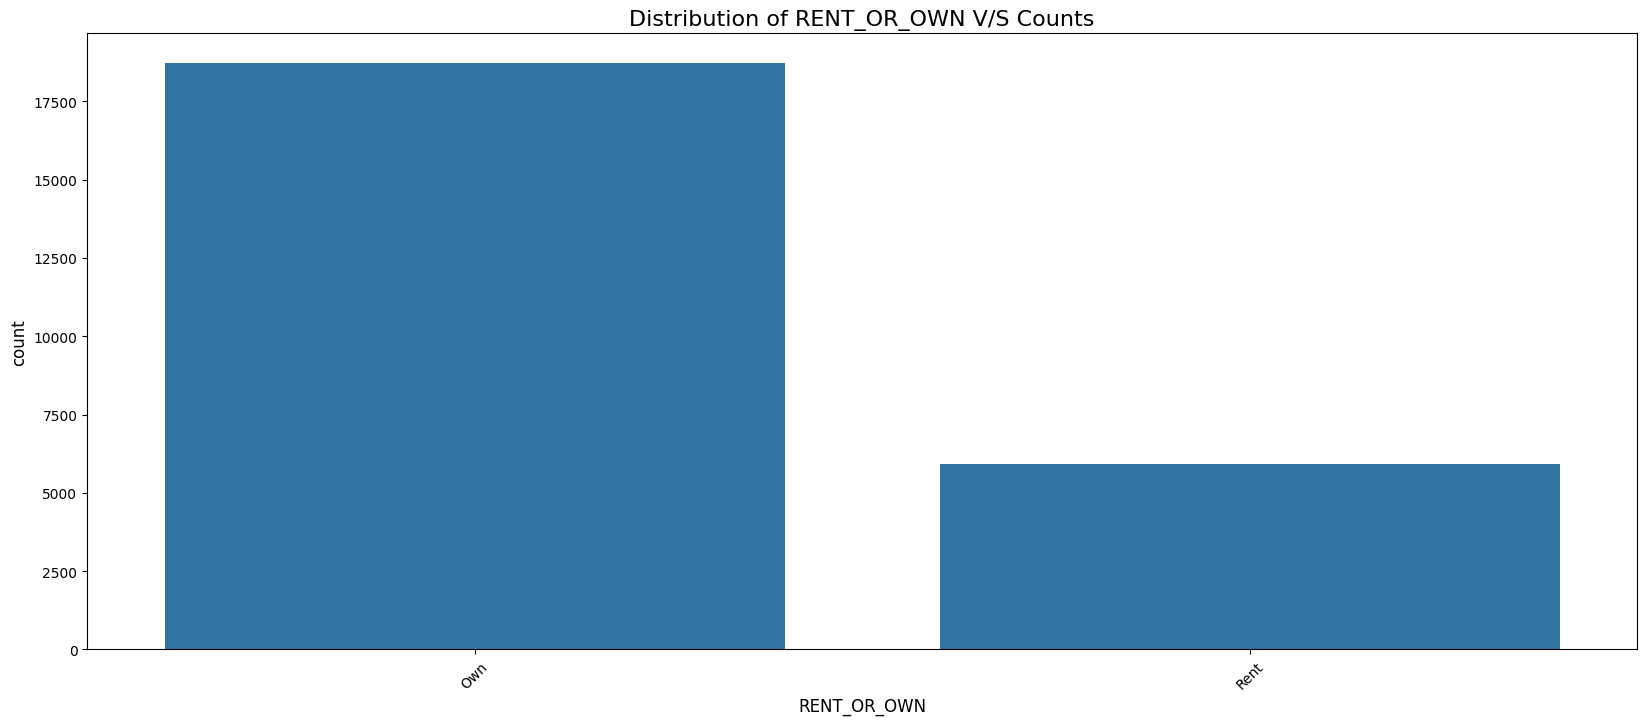

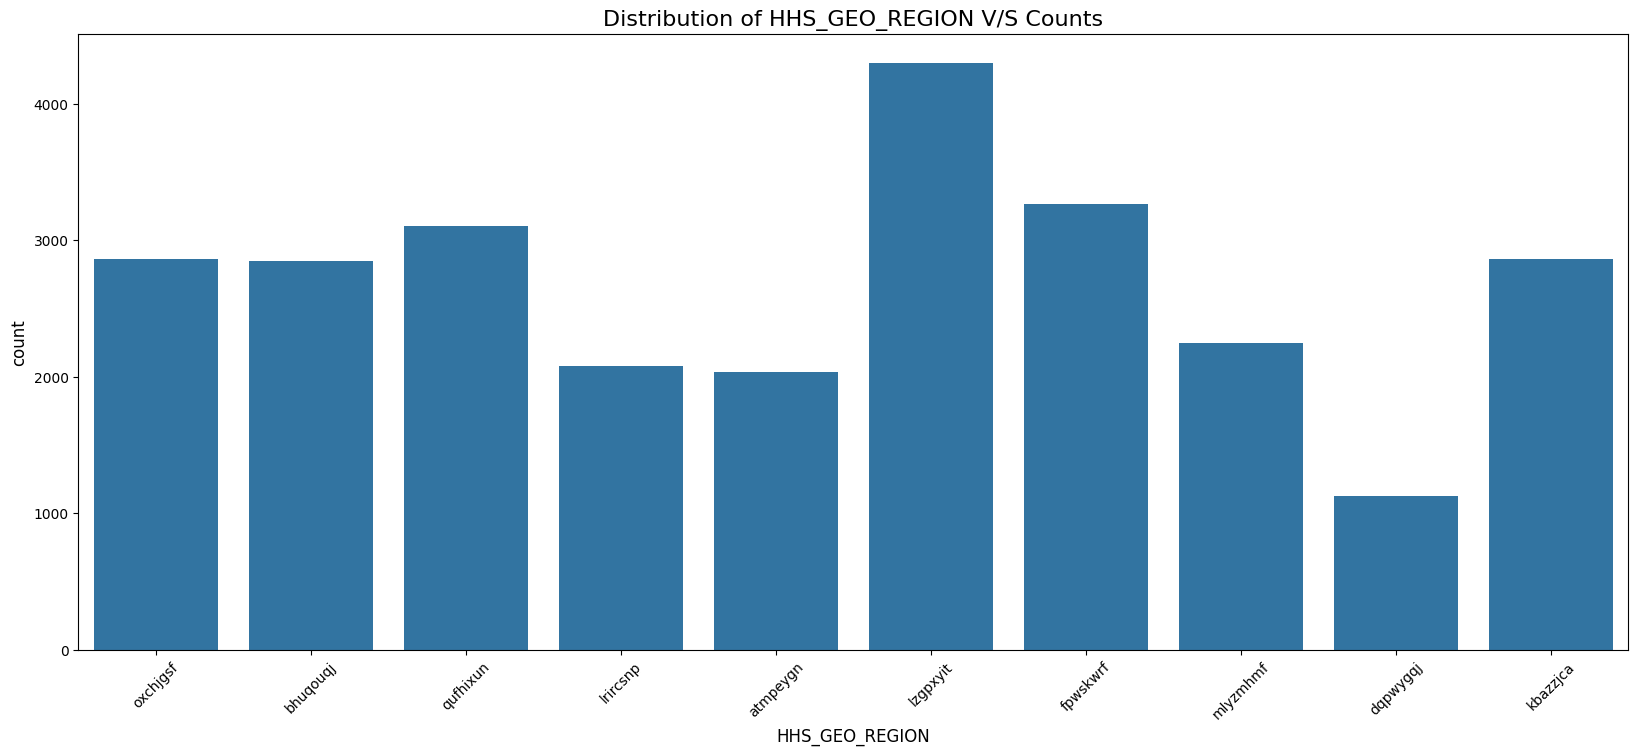

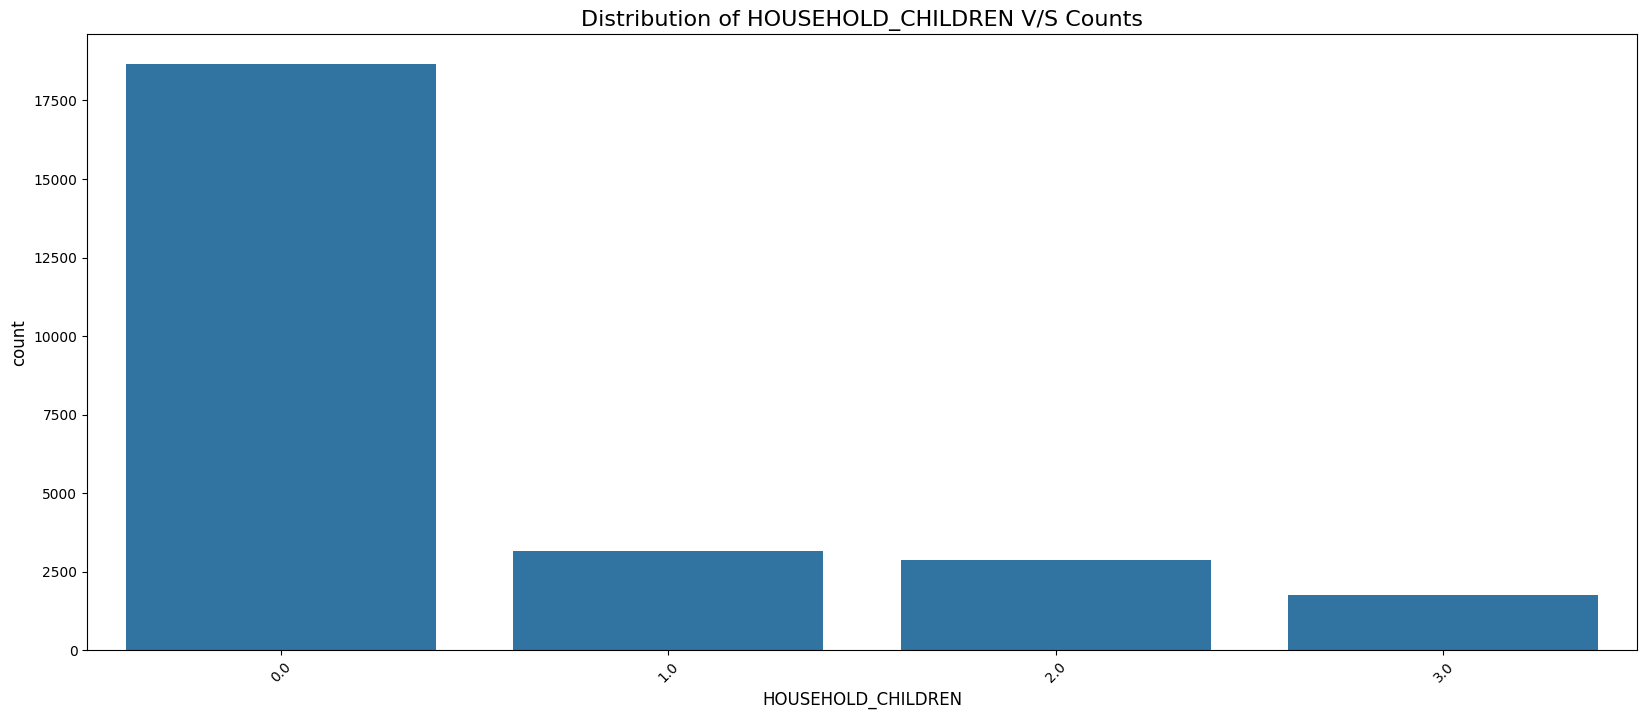

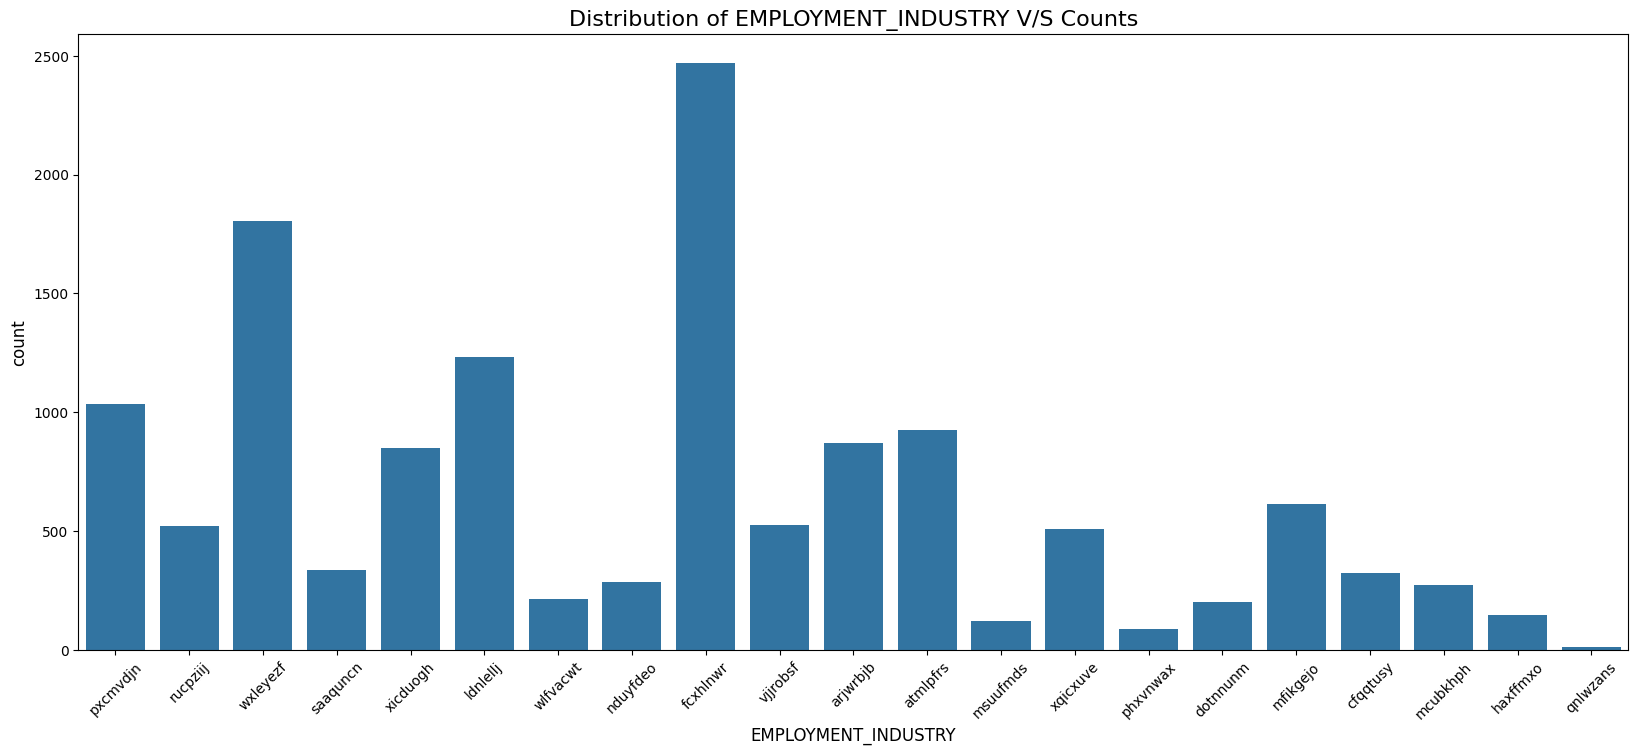

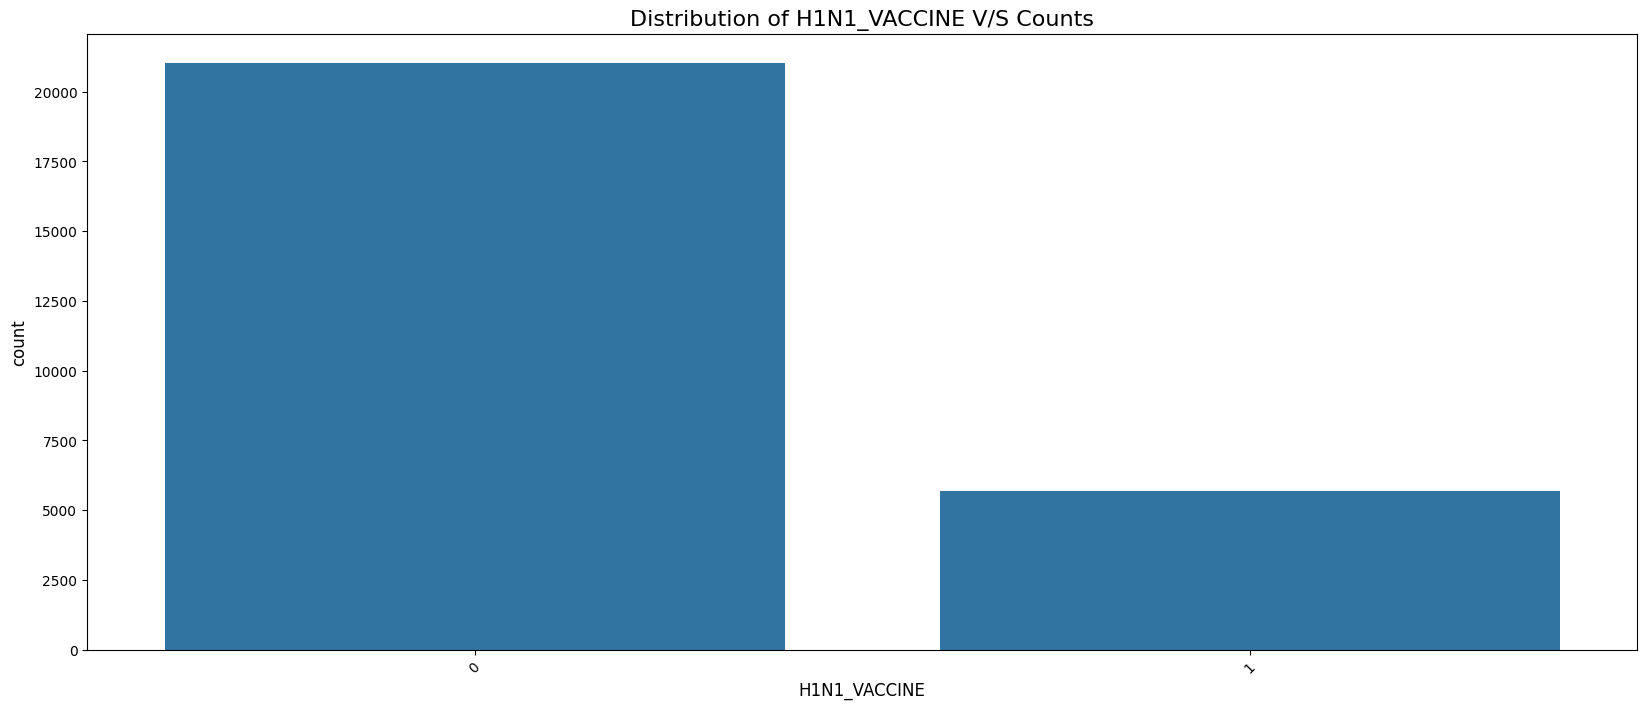

In [19]:
for col in df.columns:
  if col!="respondent_id":
    plot_count(x=col,data=df,title=f"Distribution of {col.upper()}",xlabel=col.upper(),ylabel="count")





### **Conclusion For Uni-Variate Analysis**

1. The graph titled **"Distribution of h1n1_concern"** shows the distribution of the "h1n1_concern" column, which represents the level of concern about the H1N1 flu. The graph shows that the majority of respondents have a moderate level of concern, with a smaller number having a high or low level of concern.

2. The graph titled **"Distribution of h1n1_knowledge"** shows the distribution of the "h1n1_knowledge" column, which represents the level of knowledge about the H1N1 flu. The graph shows that the majority of respondents have a moderate level of knowledge, with a smaller number having a high or low level of knowledge.

3. The graph titled **"Distribution of behavioral_antiviral_meds"** shows the distribution of the "behavioral_antiviral_meds" column, which represents the number of antiviral medications taken by the respondent. The graph shows that the majority of respondents have taken 0 or 1 antiviral medication, with a smaller number having taken 2 or more.

4. The graph titled **"Distribution of behavioral_avoidance"** shows the distribution of the "behavioral_avoidance" column, which represents the number of avoidance behaviors exhibited by the respondent. The graph shows that the majority of respondents have exhibited 0 or 1 avoidance behavior, with a smaller number having exhibited 2 or more.

5. The graph titled **"Distribution of behavioral_face_mask"** shows the distribution of the "behavioral_face_mask" column, which represents the number of face masks worn by the respondent. The graph shows that the majority of respondents have worn 0 or 1 face mask, with a smaller number having worn 2 or more.

6. The graph titled **"Distribution of behavioral_wash_hands"** shows the distribution of the "behavioral_wash_hands" column, which represents the number of times the respondent washes their hands. The graph shows that the majority of respondents wash their hands 0 or 1 time, with a smaller number washing their hands 2 or more times.

7. The graph titled **"Distribution of behavioral_large_gatherings"** shows the distribution of the "behavioral_large_gatherings" column, which represents the number of large gatherings attended by the respondent. The graph shows that the majority of respondents have attended 0 or 1 large gathering, with a smaller number having attended 2 or more.

8. The graph titled **"Distribution of behavioral_outside_home"** shows the distribution of the "behavioral_outside_home" column, which represents the number of times the respondent goes outside their home. The graph shows that the majority of respondents go outside their home 0 or 1 time, with a smaller number going outside their home 2 or more times.

9. The graph titled **"Distribution of behavioral_touch_face"** shows the distribution of the "behavioral_touch_face" column, which represents the number of times the respondent touches their face. The graph shows that the majority of respondents touch their face 0 or 1 time, with a smaller number touching their face 2 or more times.

10. The graph titled **"Distribution of behavioral_avoidance_3"** shows the distribution of the "behavioral_avoidance_3" column, which represents the number of avoidance behaviors exhibited by the respondent in the past 3 days. The graph shows that the majority of respondents have exhibited 0 or 1 avoidance behavior, with a smaller number having exhibited 2 or more.

11. The graph titled **"Distribution of h1n1_concern" **shows that the majority of respondents have a moderate level of concern about H1N1, with a count of around 1500. The counts for low and high levels of concern are significantly lower, around 500 and 200 respectively.

12. The graph titled **"Distribution of h1n1_knowledge" **shows that the majority of respondents have a moderate level of knowledge about H1N1, with a count of around 1200. The counts for low and high levels of knowledge are around 800 and 400 respectively.

13. The graph titled **"Distribution of behavioral_antiviral_meds"** shows that the majority of respondents do not take antiviral medications, with a count of around 2000. The count for those who do take antiviral medications is around 500.

14. The graph titled **"Distribution of behavioral_antiviral_meds"** shows that the majority of respondents do not take antiviral medications, with a count of around 2000. The count for those who do take antiviral medications is around 500.

15. The graph titled **"Distribution of behavioral_avoidance"** shows that the majority of respondents do not avoid certain behaviors, with a count of around 1500. The count for those who do avoid certain behaviors is around 1000.

16. The graph titled **"Distribution of behavioral_face_mask"** shows that the majority of respondents do not wear face masks, with a count of around 2000. The count for those who do wear face masks is around 500.

17. The graph titled **"Distribution of behavioral_wash_hands"** shows that the majority of respondents wash their hands frequently, with a count of around 2500. The count for those who do not wash their hands frequently is around 500.

18. The graph titled **"Distribution of behavioral_large_gatherings"** shows that the majority of respondents do not avoid large gatherings, with a count of around 2000. The count for those who do avoid large gatherings is around 500.

19. The graph titled **"Distribution of behavioral_outside_home"** shows that the majority of respondents do not avoid going outside their home, with a count of around 2500. The count for those who do avoid going outside their home is around 500.

20. The graph titled **"Distribution of behavioral_touch_face"** shows that the majority of respondents do not avoid touching their face, with a count of around 2000. The count for those who do avoid touching their face is around 500.

21. The graph titled **"Distribution of doctor_recc_h1n1"** shows that the majority of respondents do not receive a recommendation from their doctor to get vaccinated against H1N1, with a count of around 2000. The count for those who do receive a recommendation is around 500.

22. The graph titled **"Distribution of doctor_recc_seasonal"** shows that the majority of respondents do not receive a recommendation from their doctor to get vaccinated against seasonal flu, with a count of around 2000. The count for those who do receive a recommendation is around 500.

23. The graph titled ***"Distribution of chronic_med_condition"*** shows that the majority of respondents do not have a chronic medical condition, with a count of around 2500. The count for those who do have a chronic medical condition is around 500.

24. The graph titled **"Distribution of child_under_6_months"** shows that the majority of respondents do not have a child under 6 months old, with a count of around 2500. The count for those who do have a child under 6 months old is around 500.

25. The graph titled **"Distribution of health_worker"** shows that the majority of respondents are not health workers, with a count of around 2500. The count for those who are health workers is around 500.

26. The graph titled **"Distribution of health_insurance"** that the majority of respondents have health insurance, with a count of around 2500. The count for those who do not have health insurance is around 500.

27. The graph titled **"Distribution of opinion_h1n1_risk"** shows that the majority of respondents believe that the risk of getting H1N1 is low, with a count of around 1500. The counts for those who believe the risk is moderate or high are around 800 and 400 respectively.

28. The graph titled **"opinion_h1n1_vacc_effective"** shows that the majority of respondents believe that the H1N1 vaccine is effective, with a peak at the value 5 (very effective).

29. The graph titled **"opinion_h1n1_risk"** shows that the majority of respondents believe that the risk of getting H1N1 is low, with a peak at the value 2 (low risk).

30. The graph titled **"opinion_h1n1_sick_from_vacc"** shows that the majority of respondents believe that the risk of getting sick from the H1N1 vaccine is low, with a peak at the value 2 (low risk).

31. The graph titled **"opinion_seas_vacc_effective"** shows that the majority of respondents believe that the seasonal flu vaccine is effective, with a peak at the value 5 (very effective).

32. The graph titled **"opinion_seas_risk"** shows that the majority of respondents believe that the risk of getting seasonal flu is low, with a peak at the value 2 (low risk).

33. The graph titled **"opinion_seas_sick_from_vacc"** that the majority of respondents believe that the risk of getting sick from the seasonal flu vaccine is low, with a peak at the value 2 (low risk).

34. The graph titled **"household_adults"** that the majority of respondents have 1-2 adults in their household, with a peak at the value 2.

35. The graph titled **"household_children"** shows that the majority of respondents have 0-1 children in their household, with a peak at the value 0.

36. The graph titled **"h1n1_vaccine"** shows that the majority of respondents have not received the H1N1 vaccine, with a peak at the value 0 (no).

37. The graph titled **"seasonal_vaccine"** shows that the majority of respondents have received the seasonal flu vaccine, with a peak at the value 1 (yes).

Overall, the graphs suggest that the respondents generally have positive opinions about the effectiveness of the vaccines and low perceptions of risk, and that they are more likely to have received the seasonal flu vaccine than the H1N1 vaccine.


In [20]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

### **BI-Variate Analysis For H1N1 Vaccine**

In [21]:
df_h1n1=df.drop(columns=['opinion_seas_vacc_effective','opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'seasonal_vaccine' ])

In [22]:
df_h1n1.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_industry', 'employment_occupation',
       'h1n1_vaccine'],
      dtype='object')

In [23]:
def plot_count(x,data, xlabel,title,y='h1n1_vaccine', ylabel='H1N1 Vaccination'):
    plt.figure(figsize=(20, 8))
    sns.countplot(x=x, data=df_h1n1, hue=y)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel=x.upper(), fontsize=12)
    plt.xticks(rotation=45)
    plt.ylabel(ylabel, fontsize=12)
    plt.show()

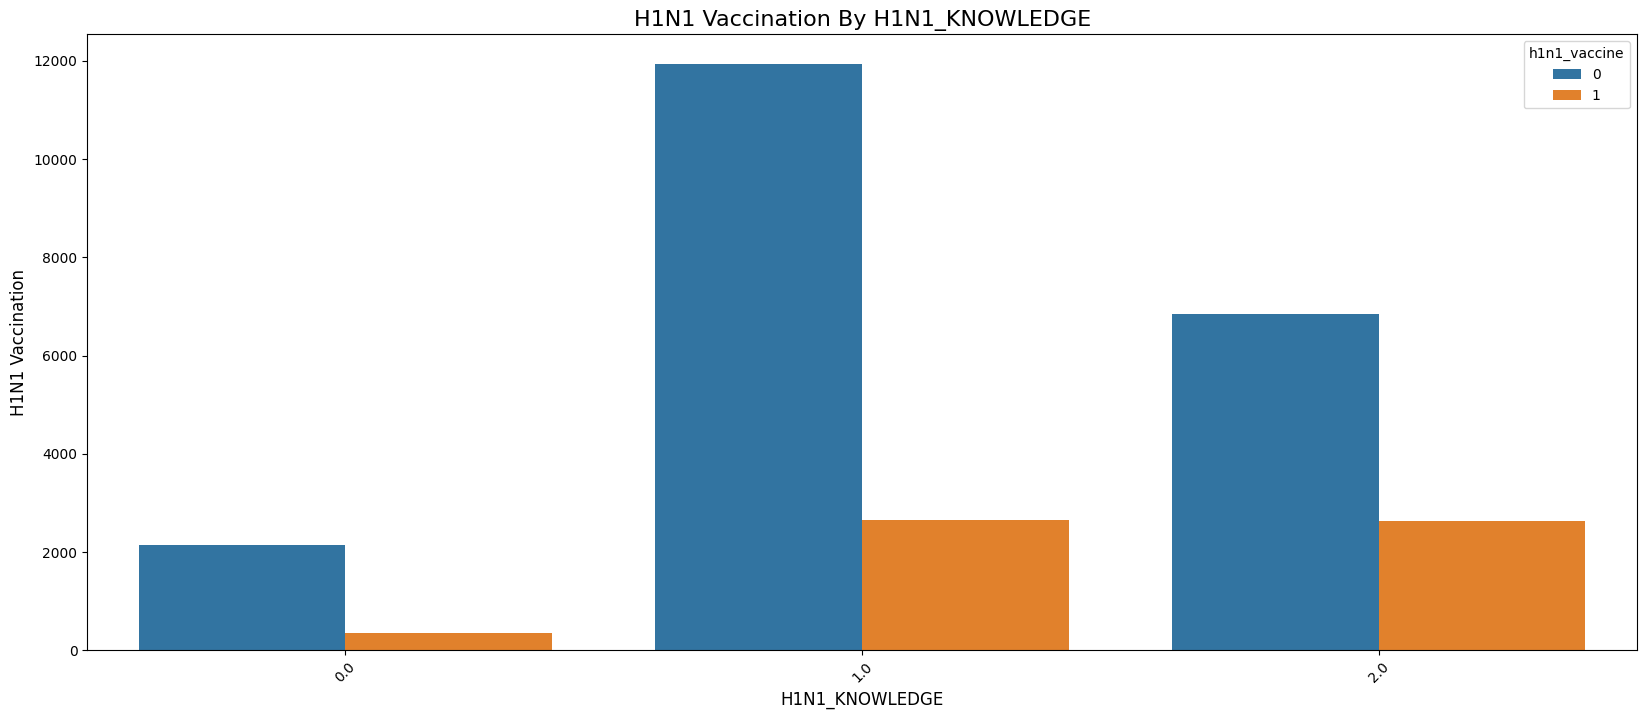

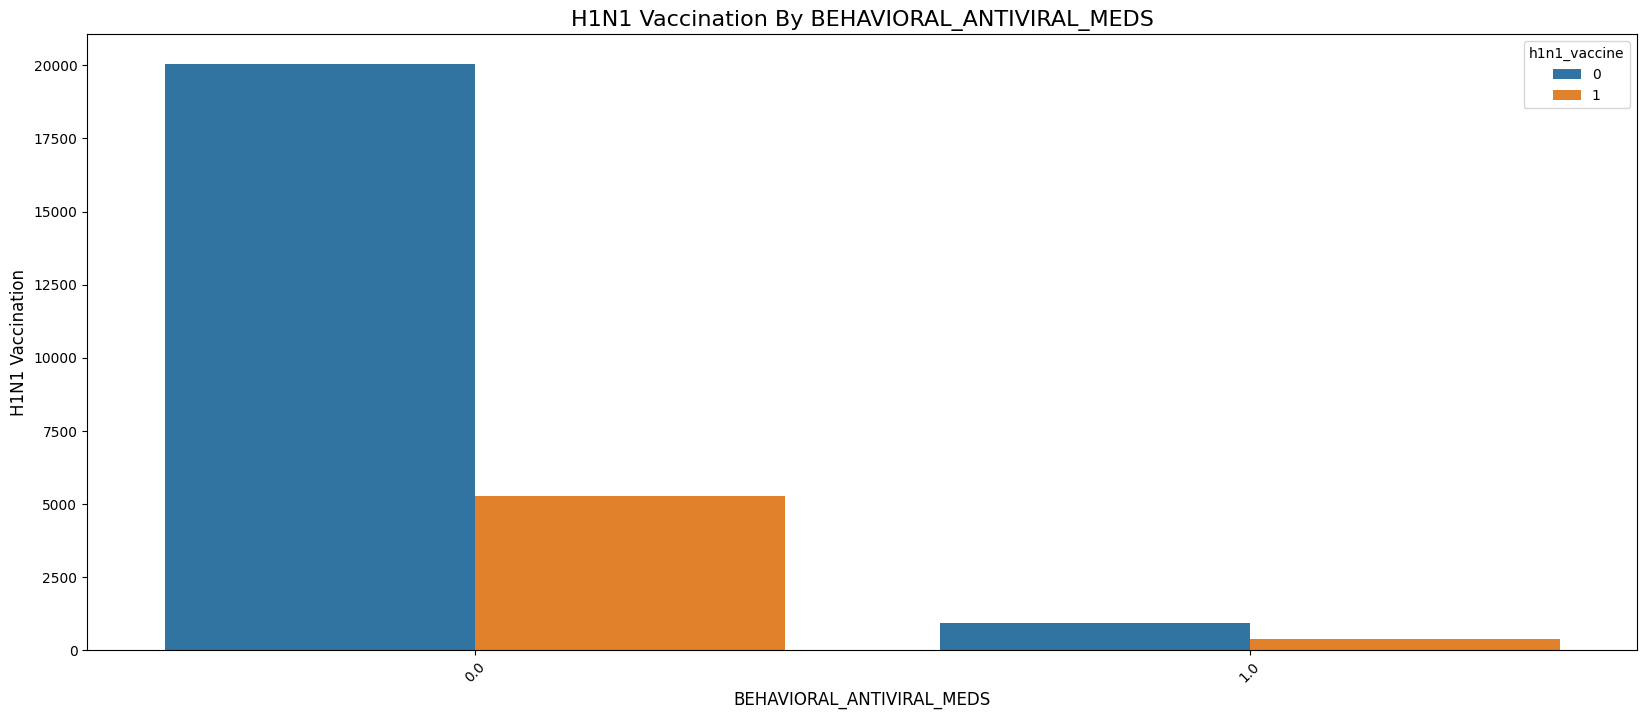

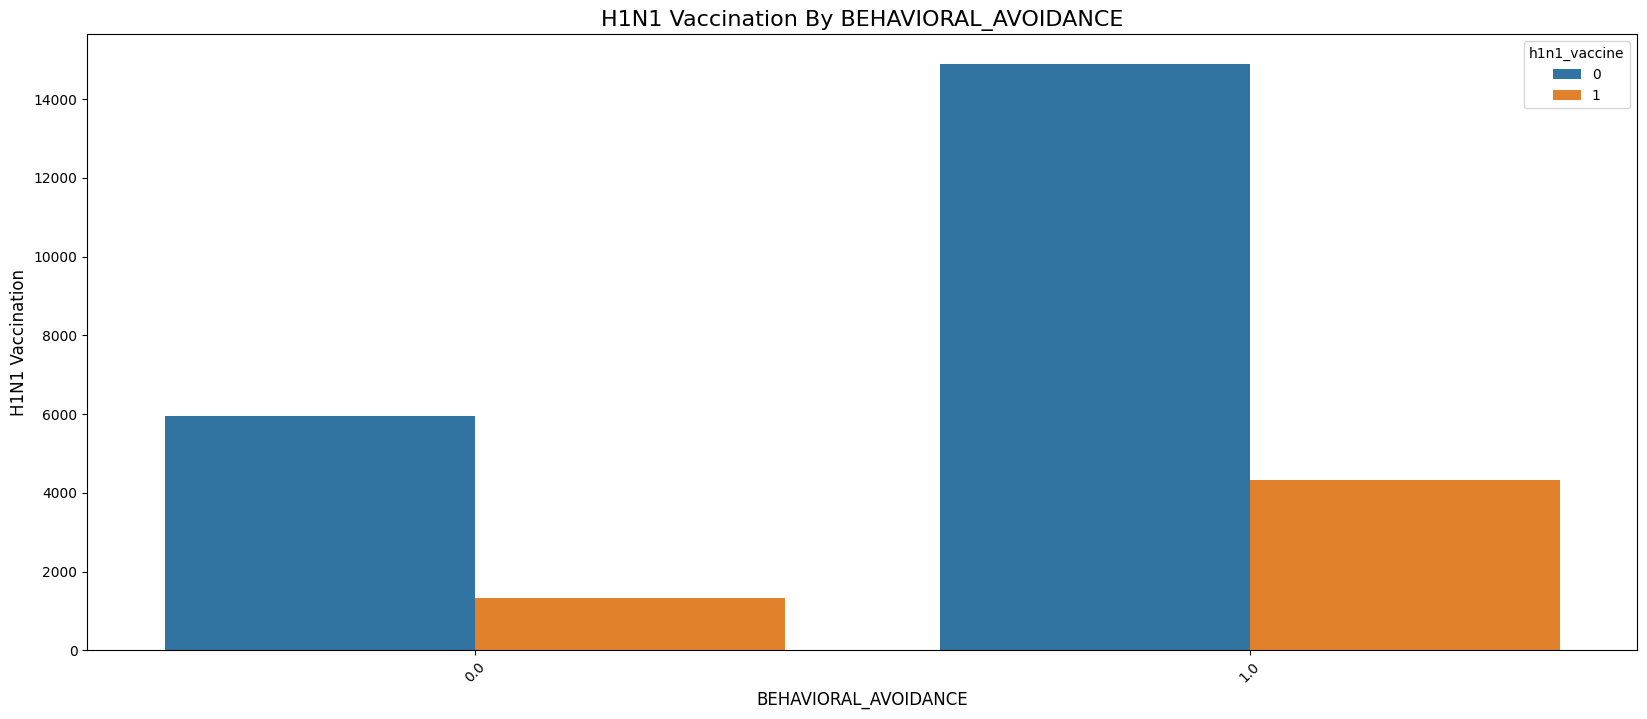

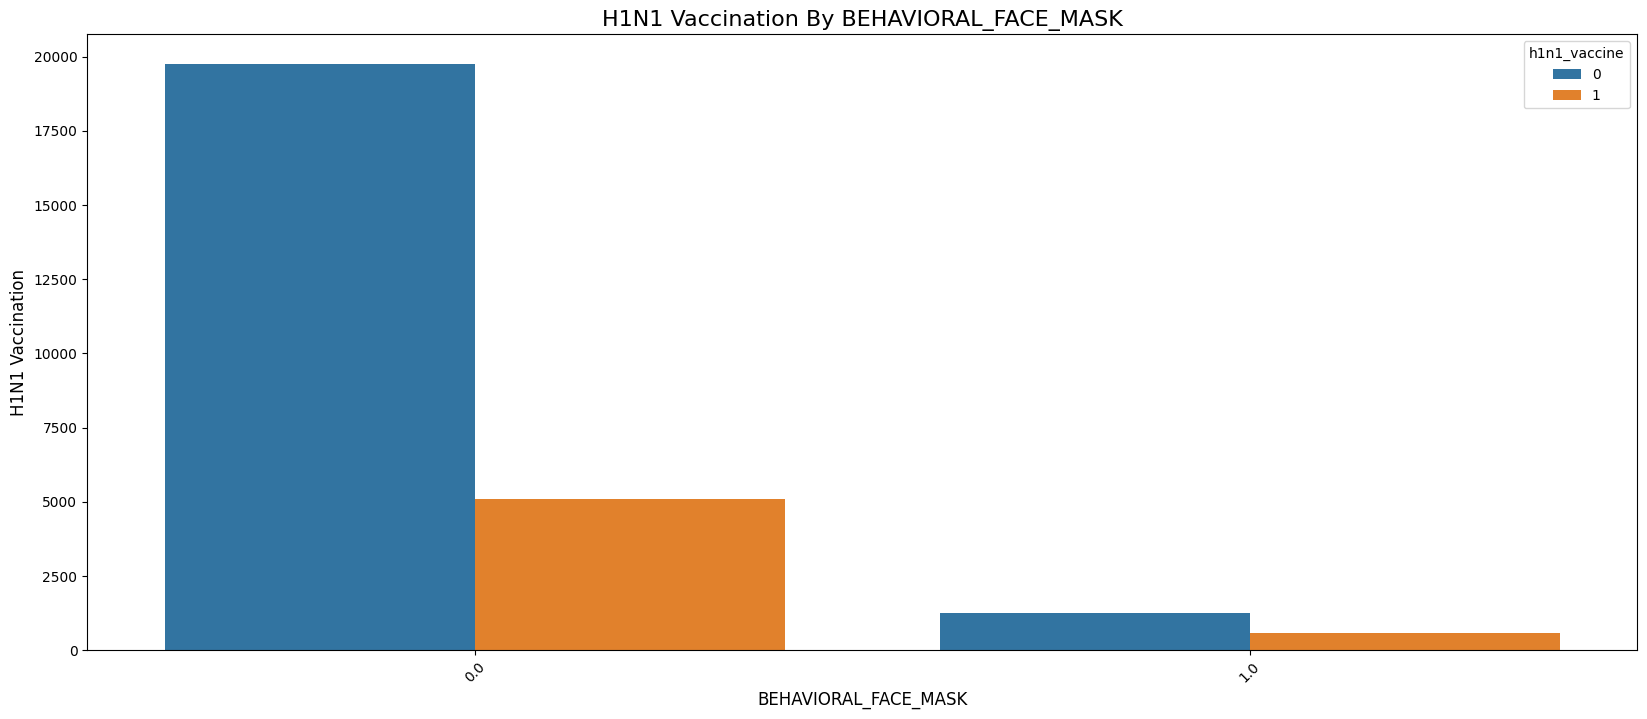

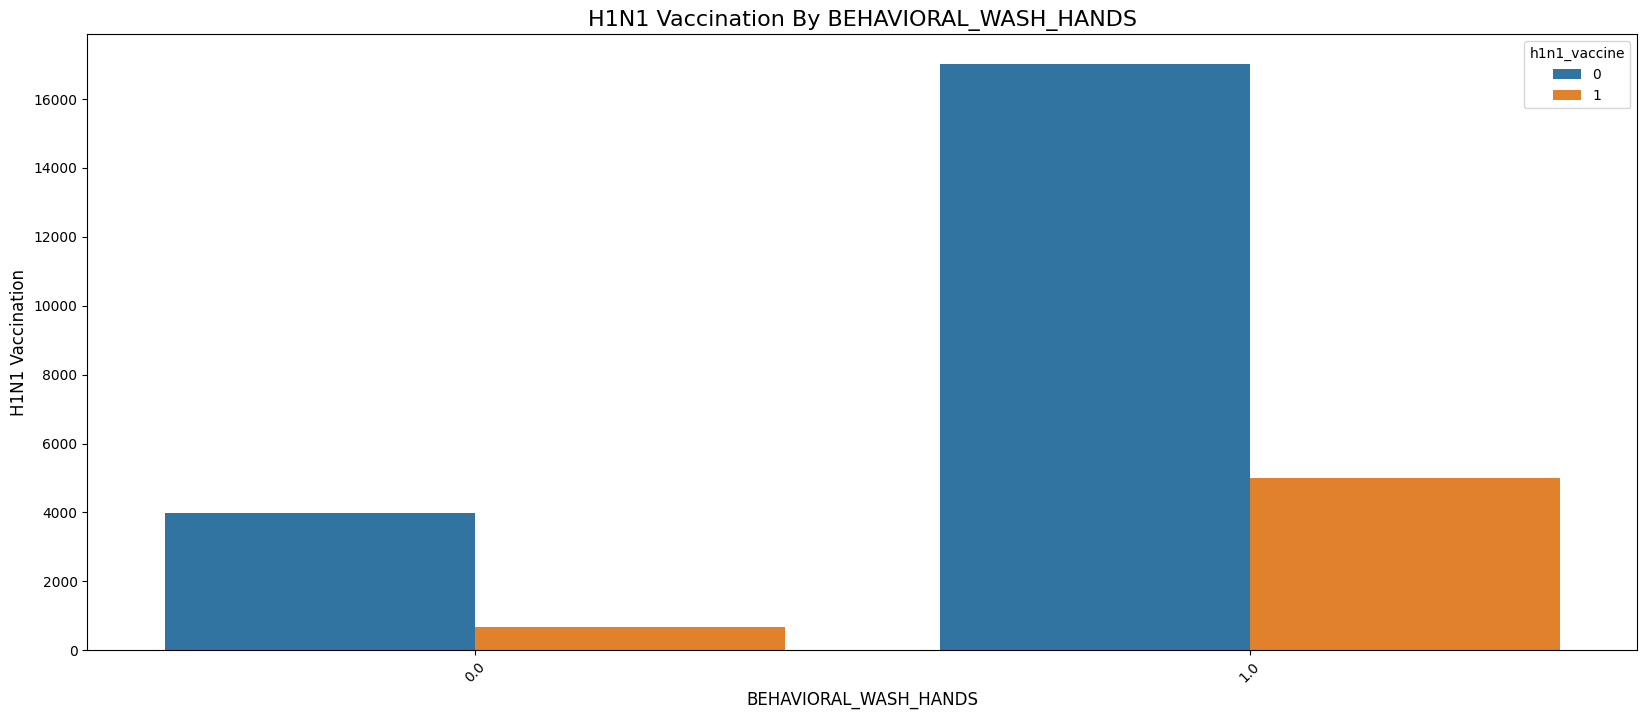

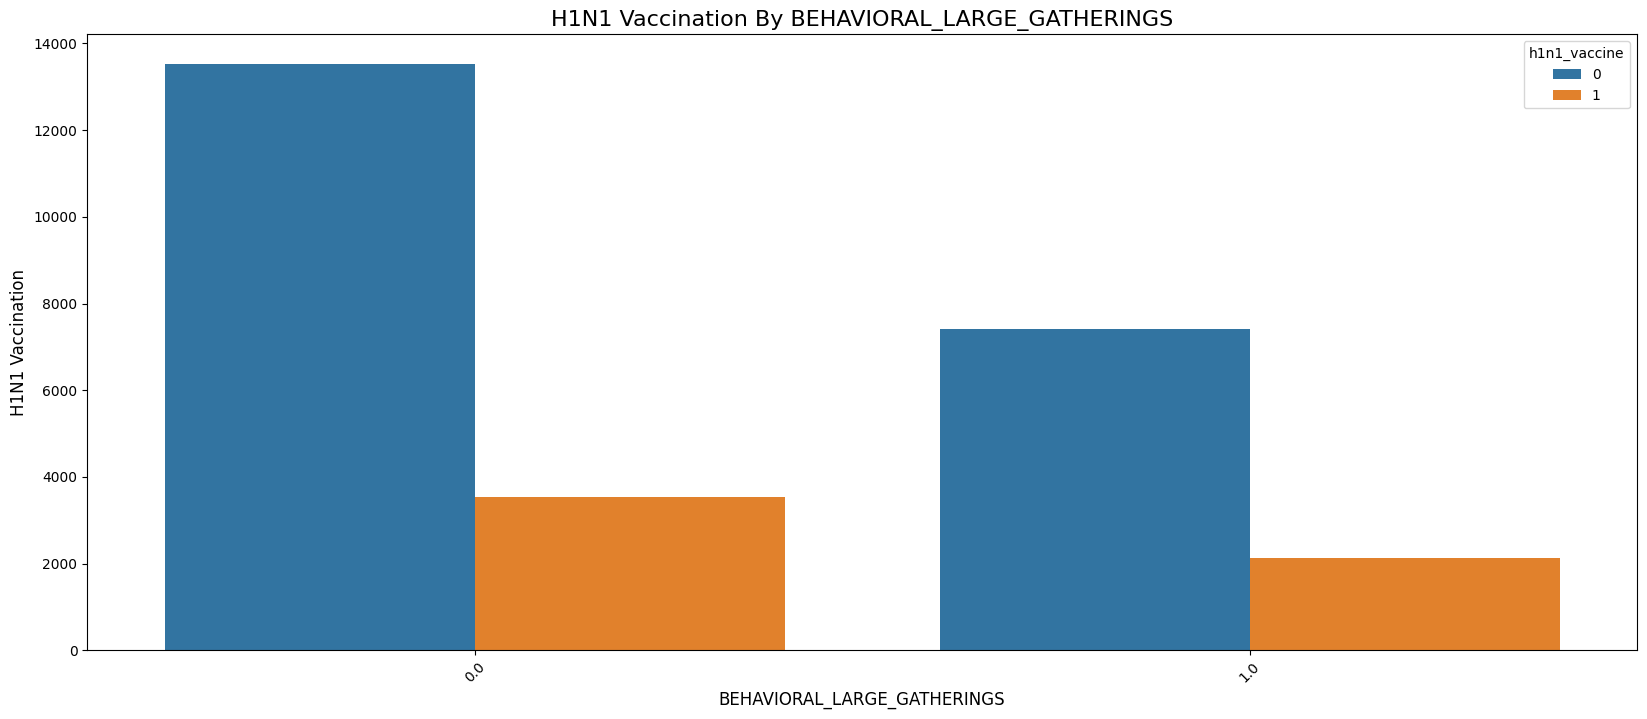

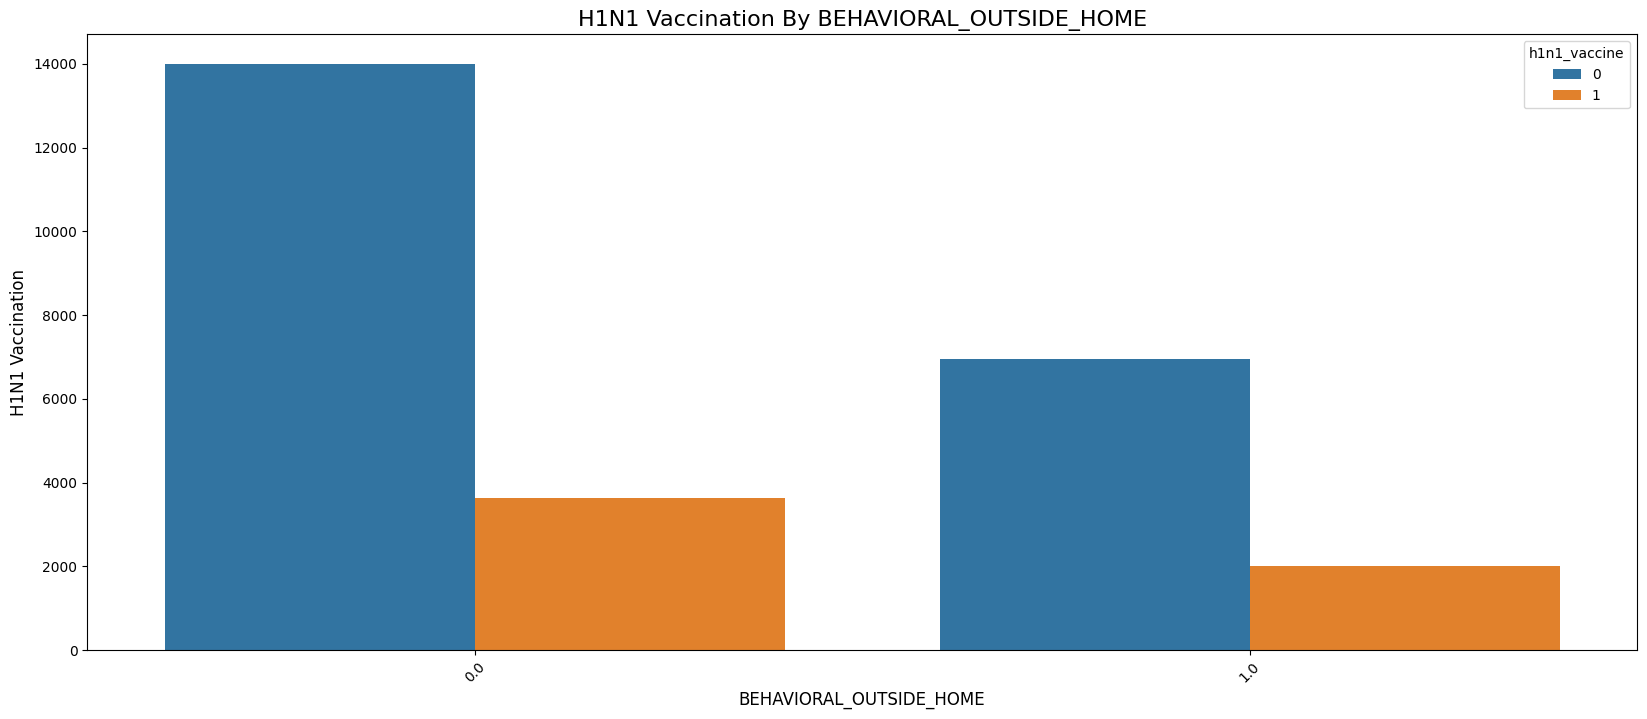

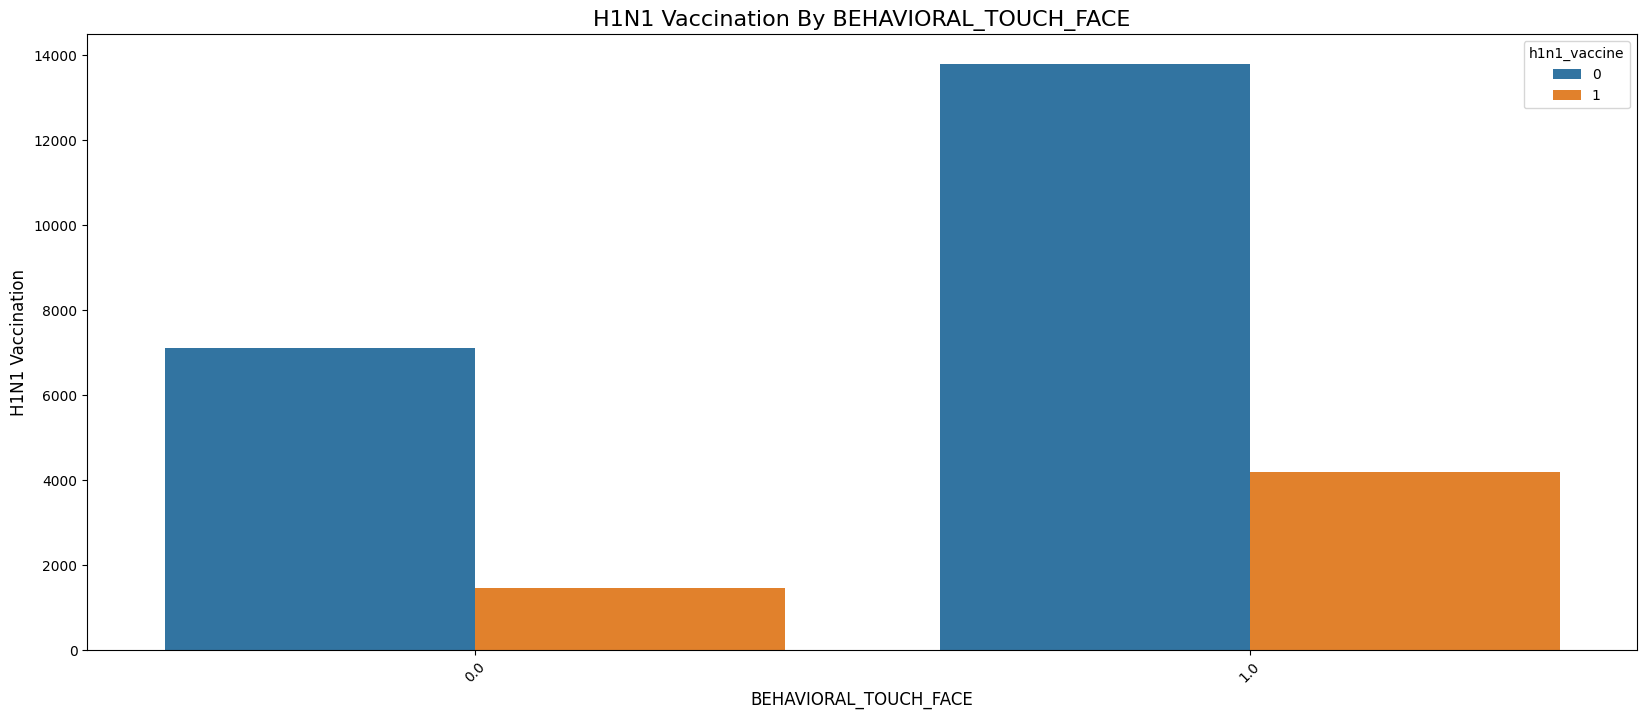

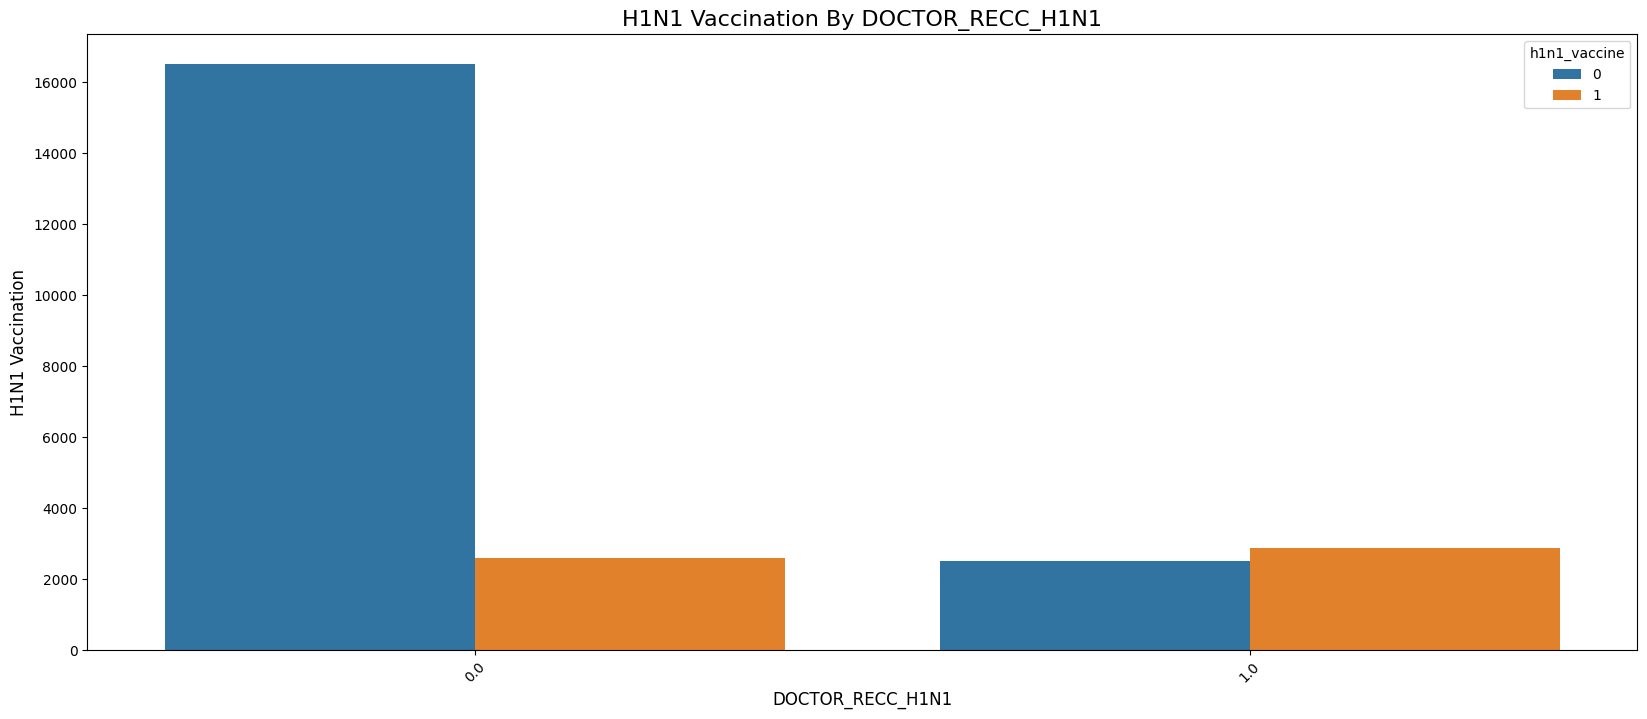

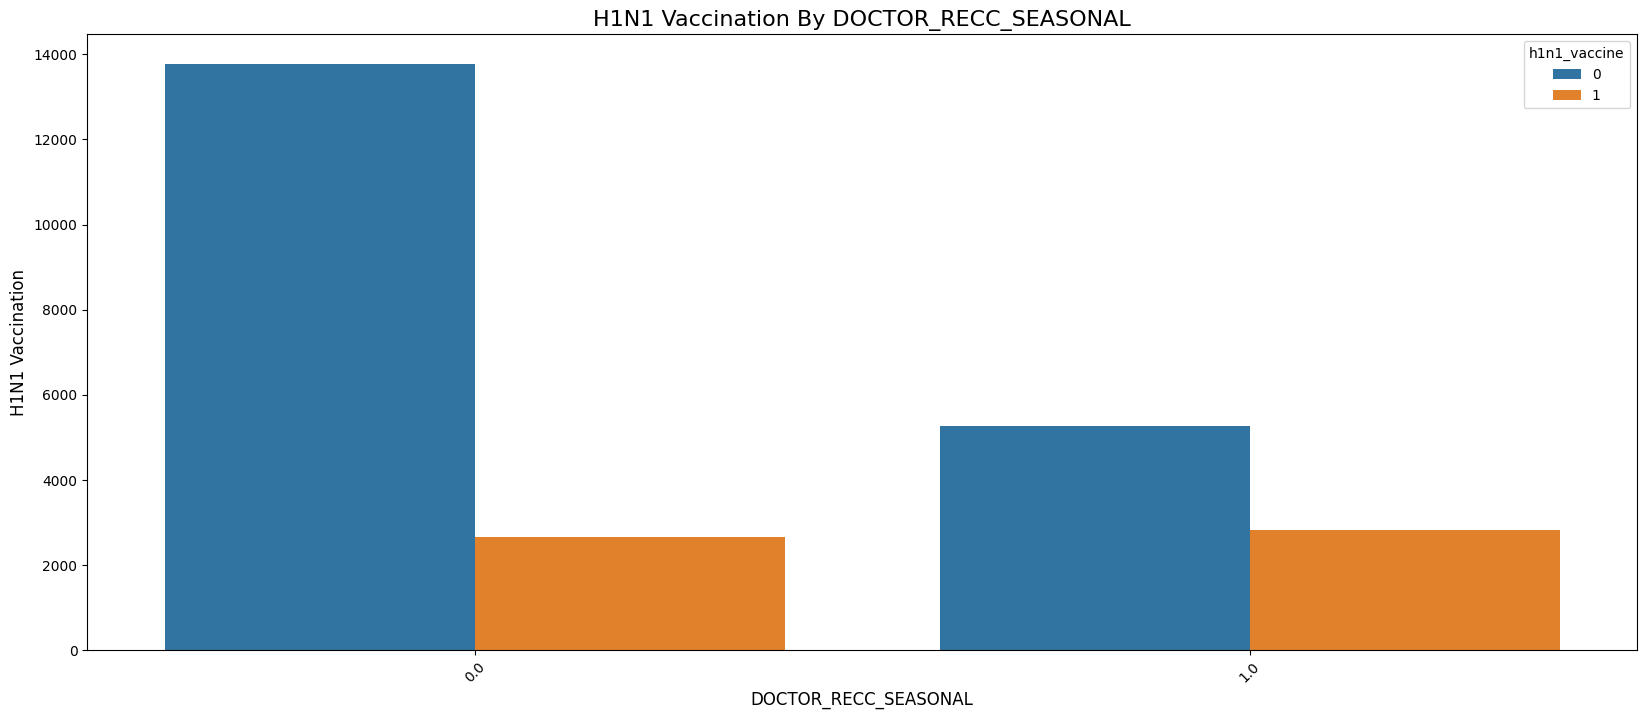

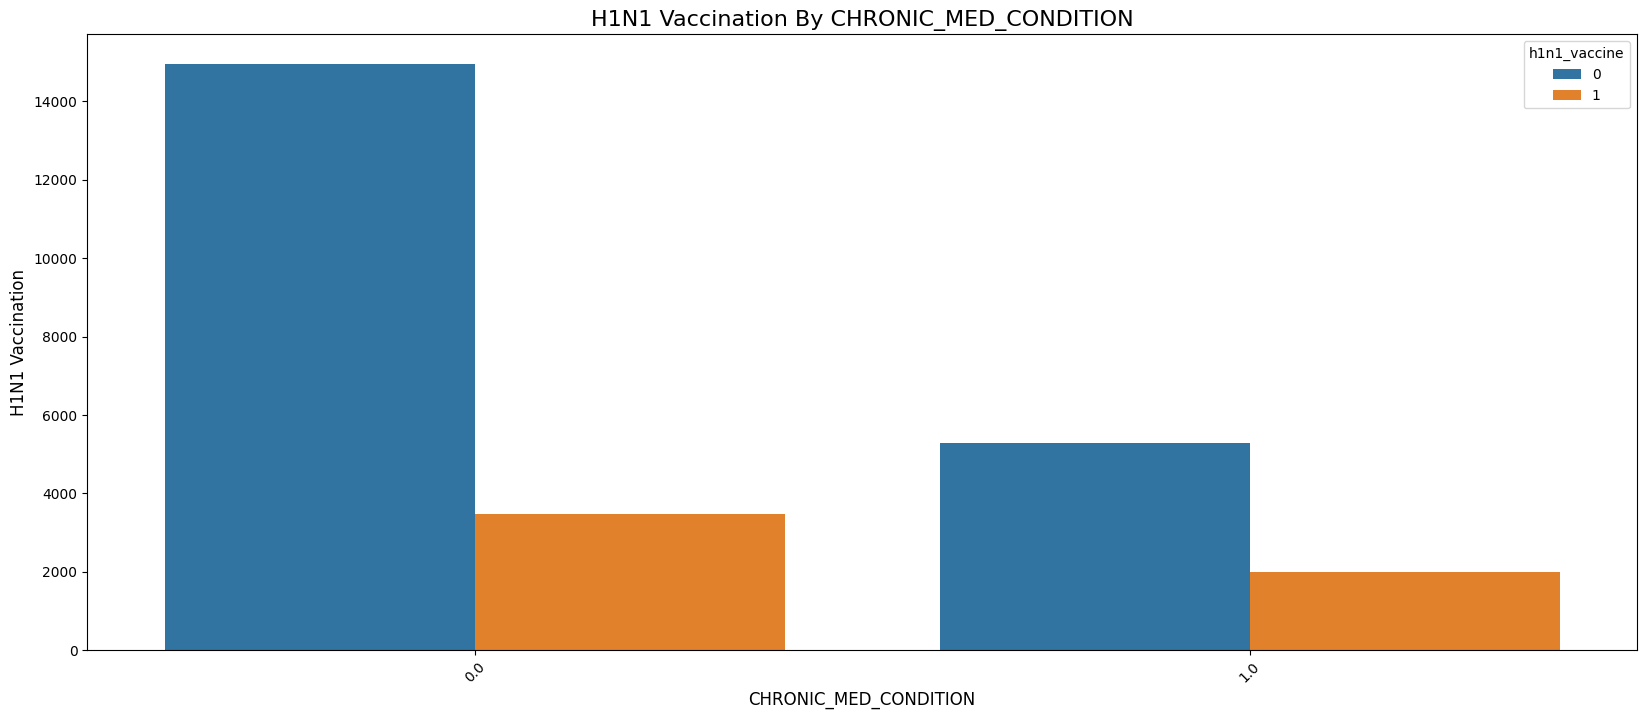

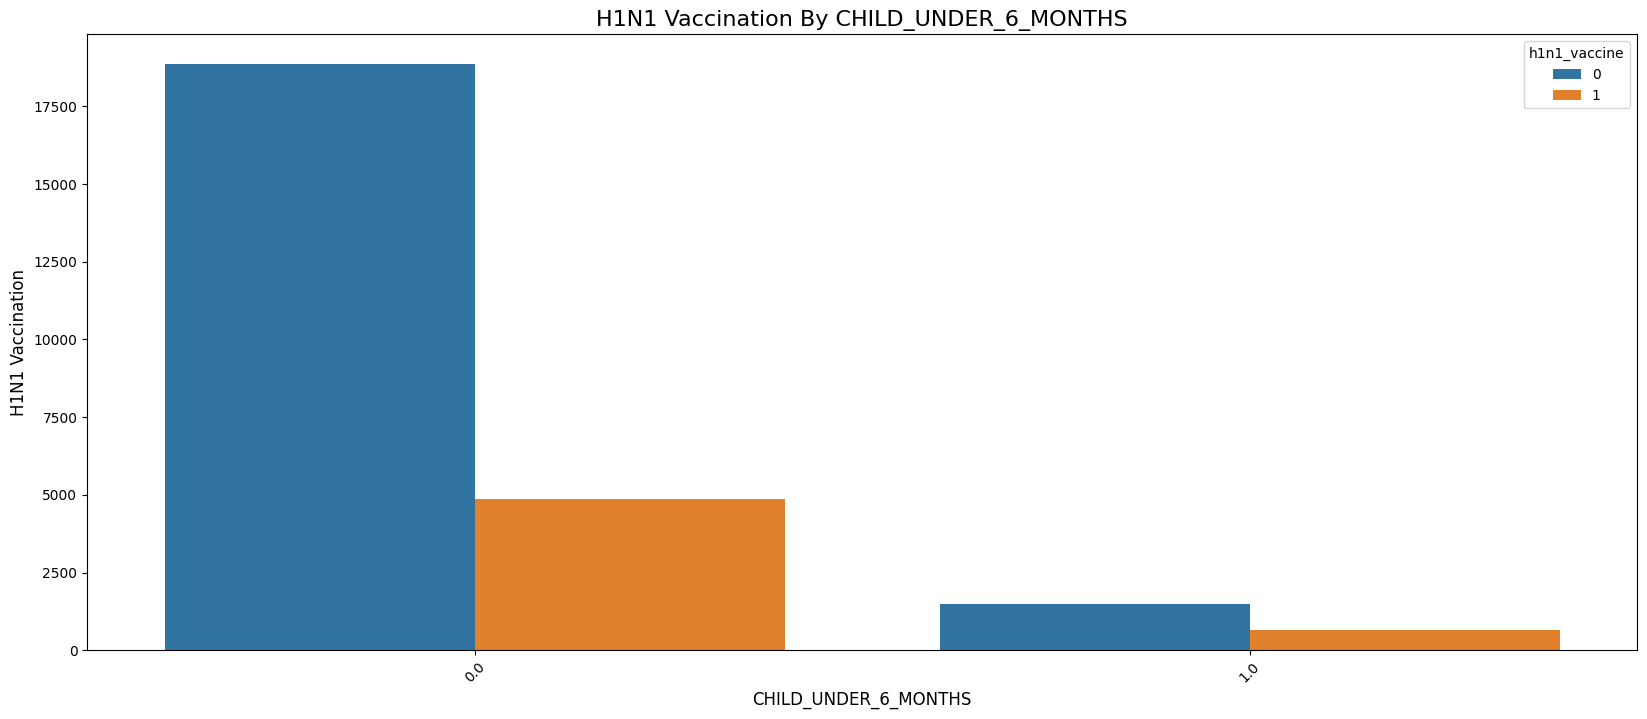

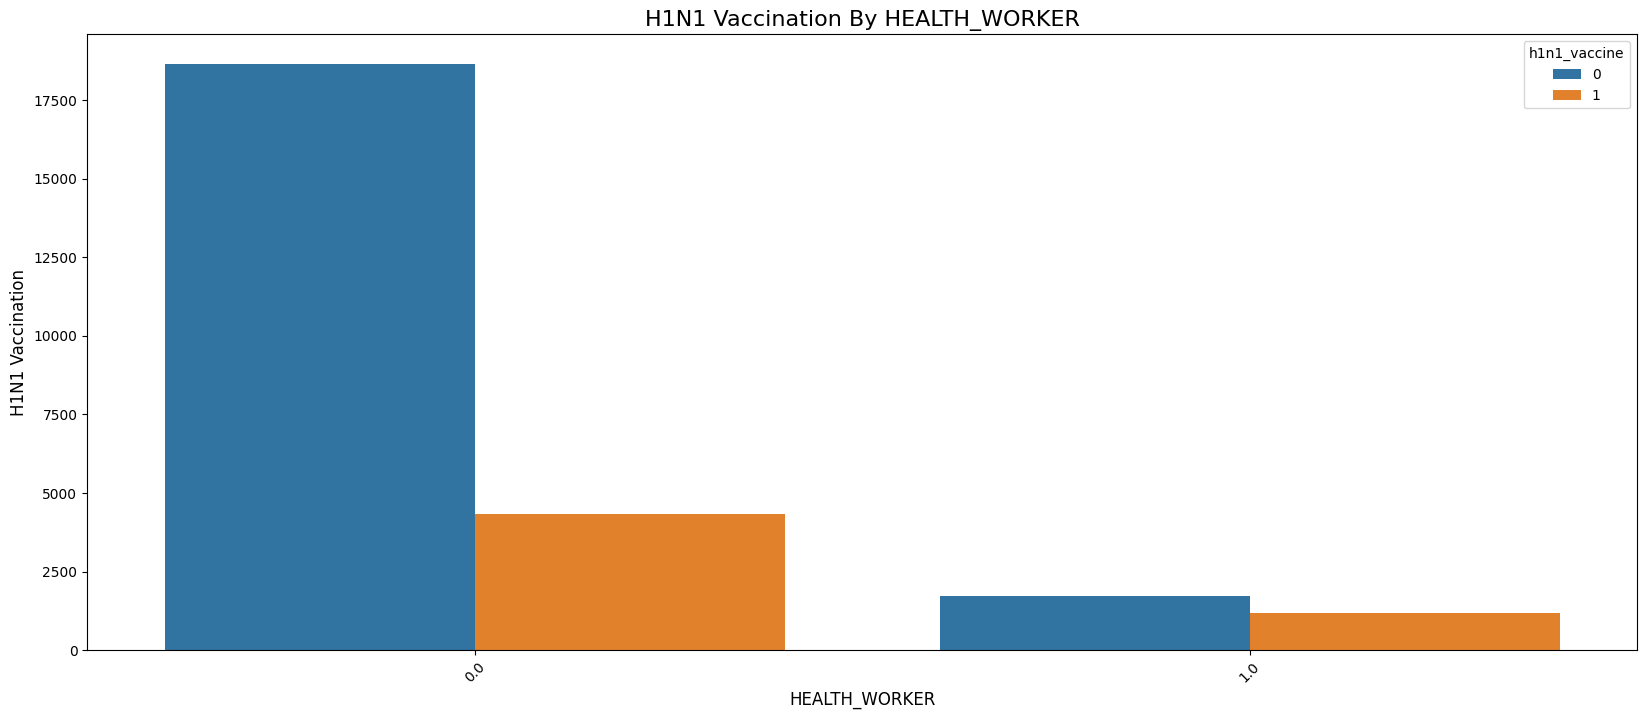

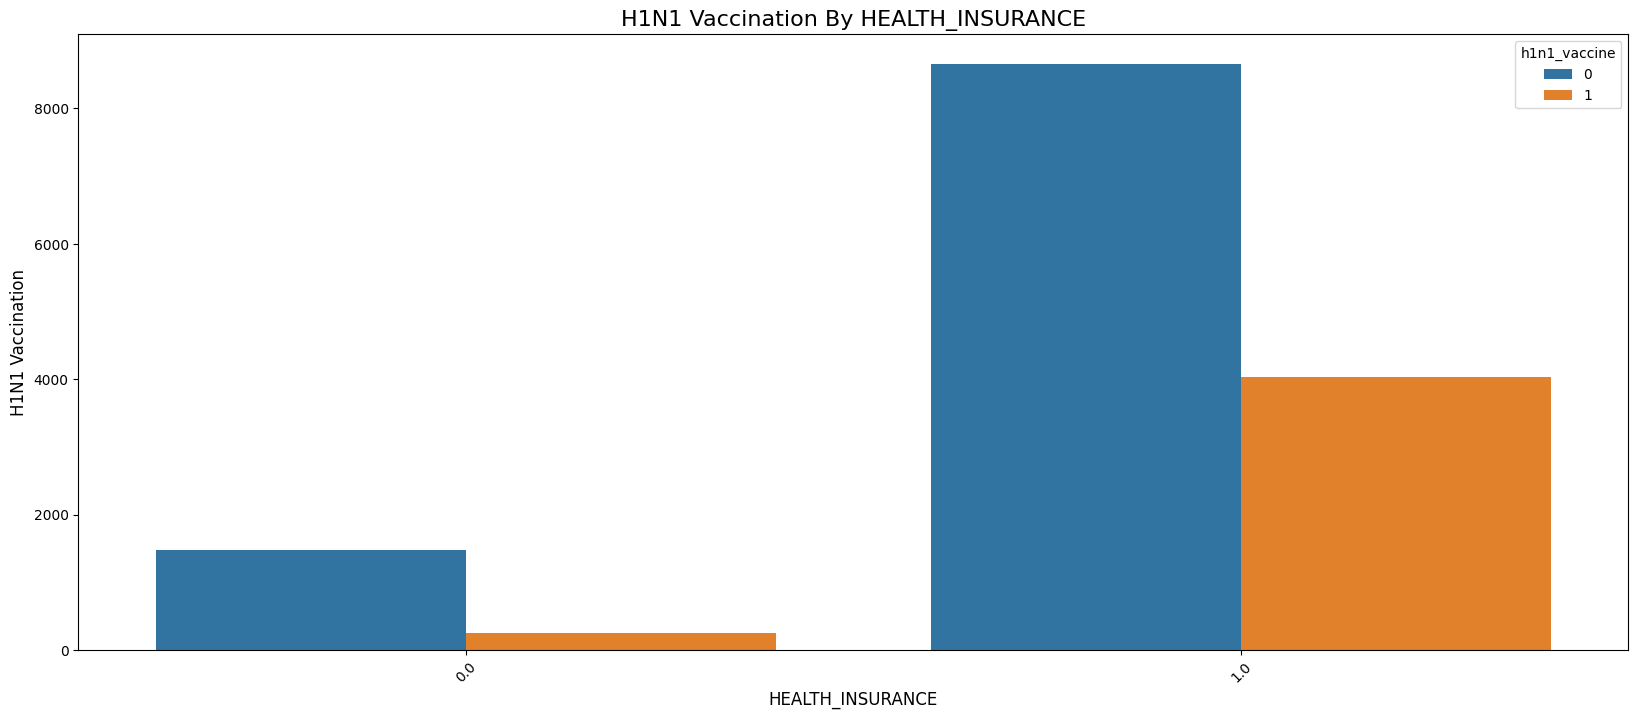

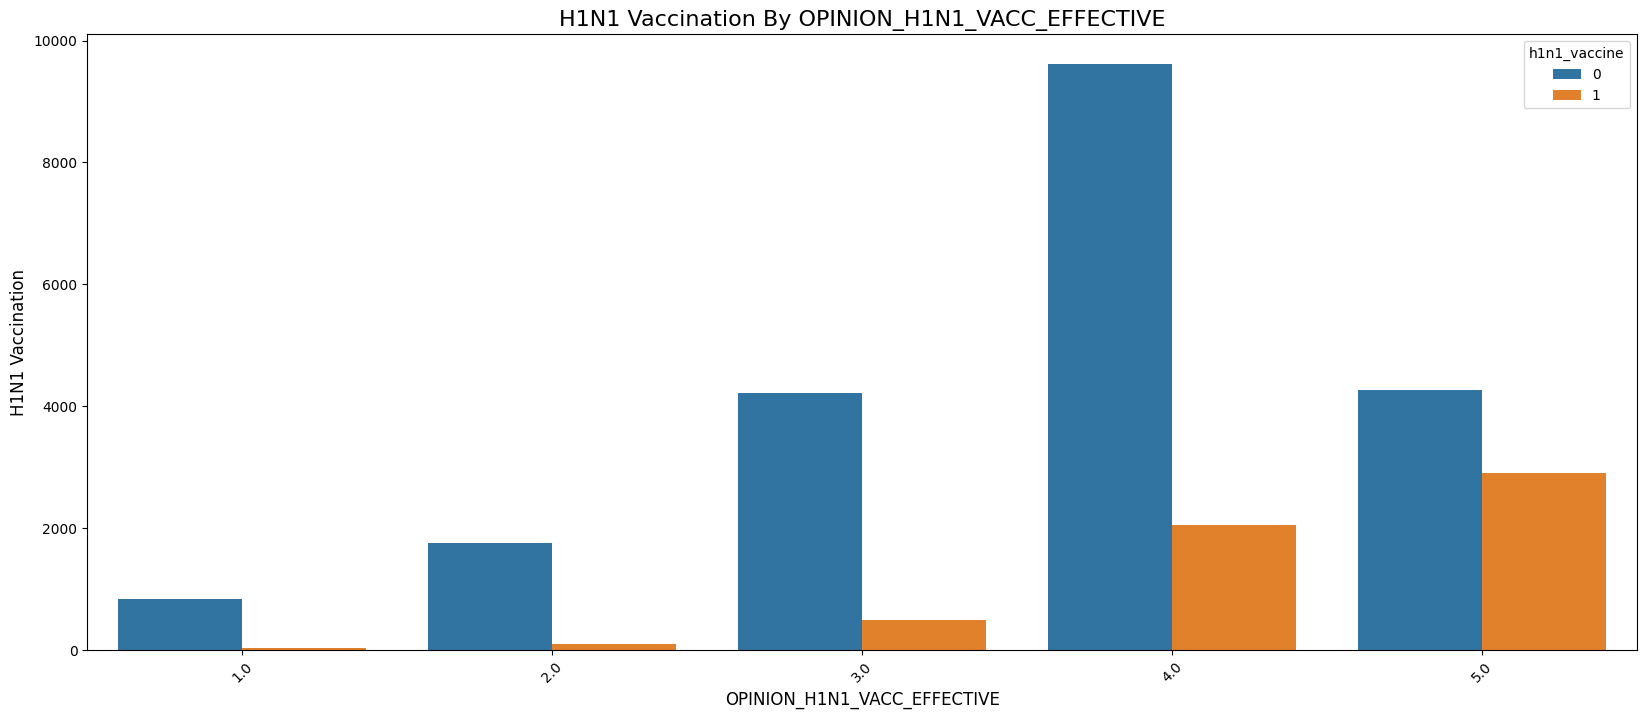

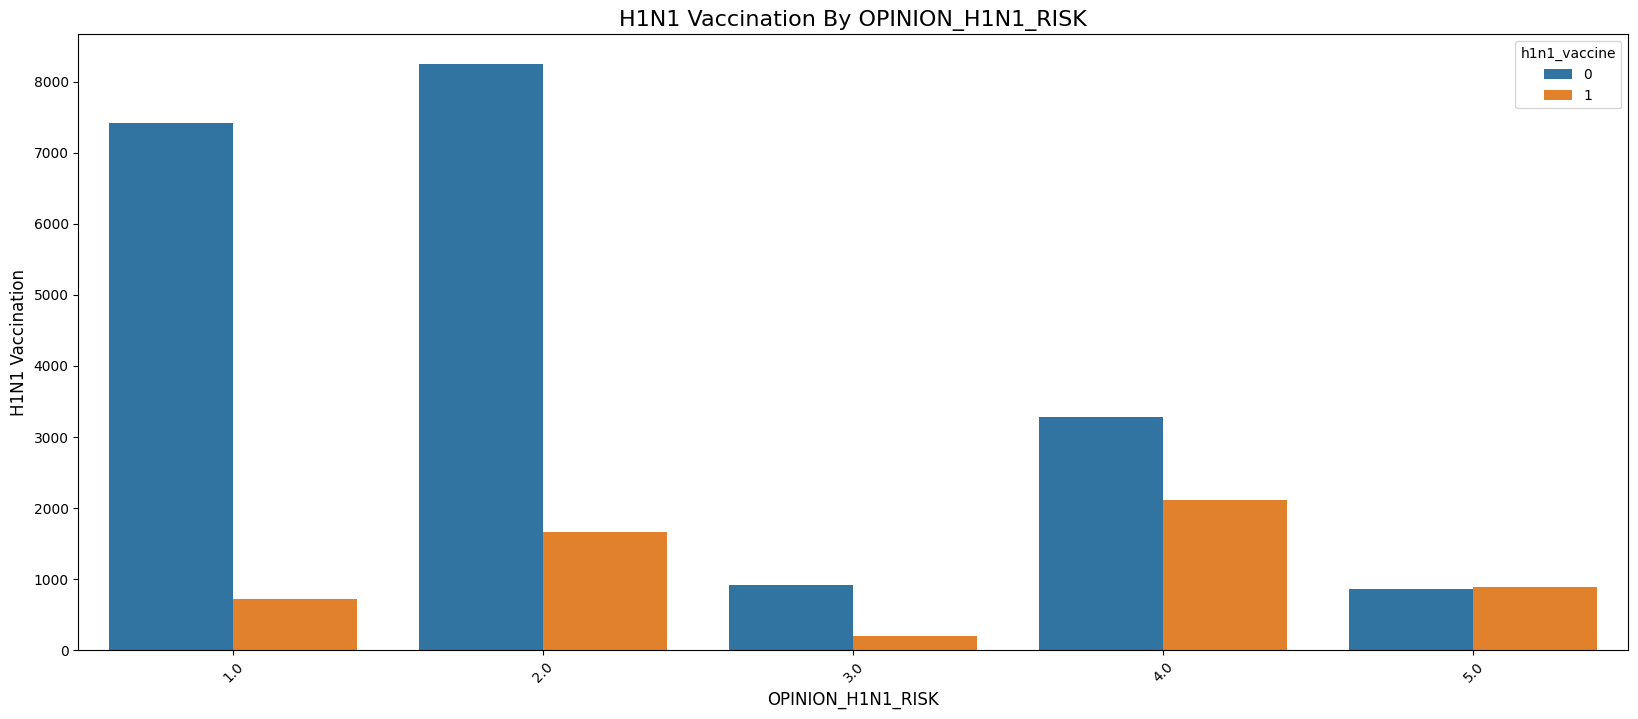

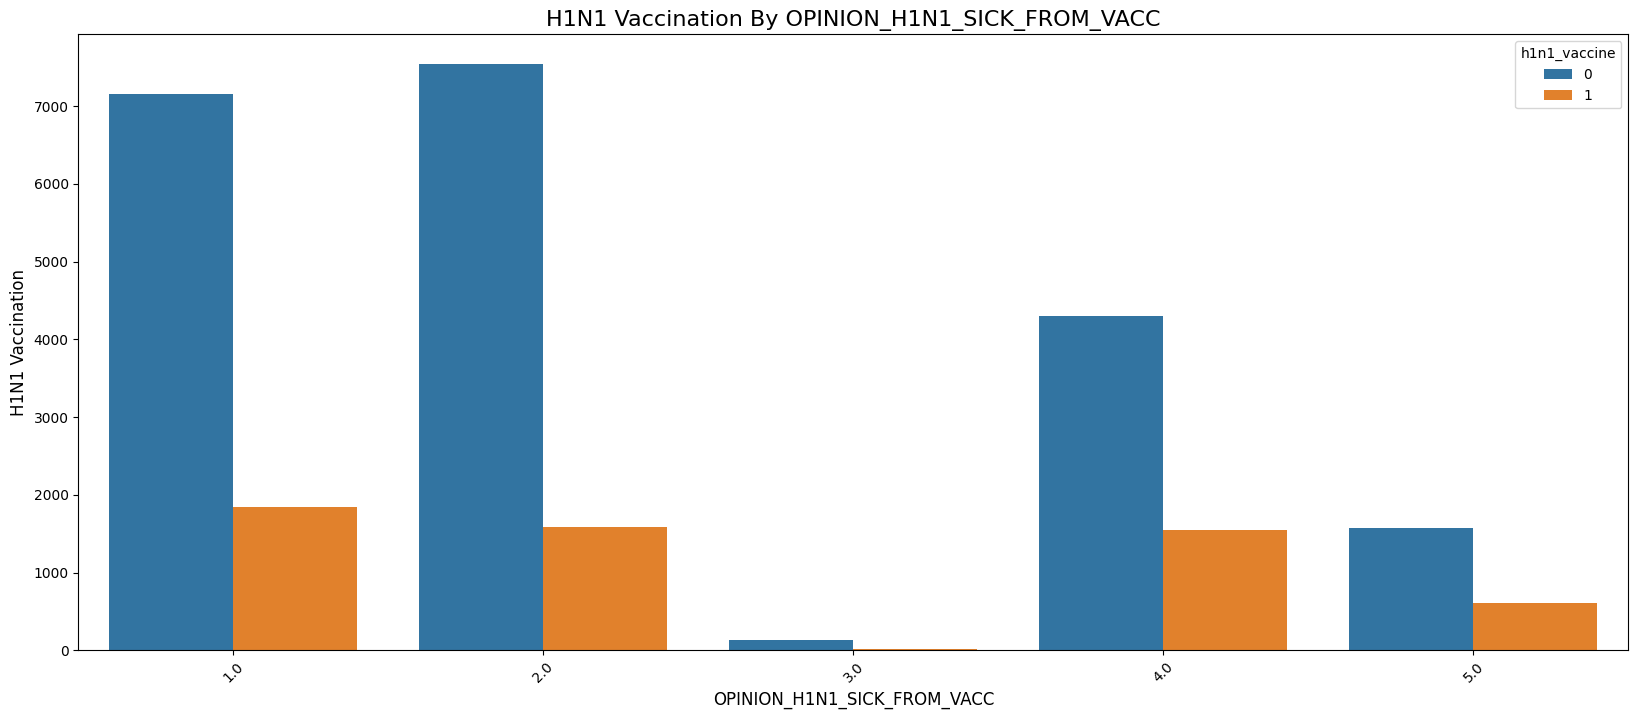

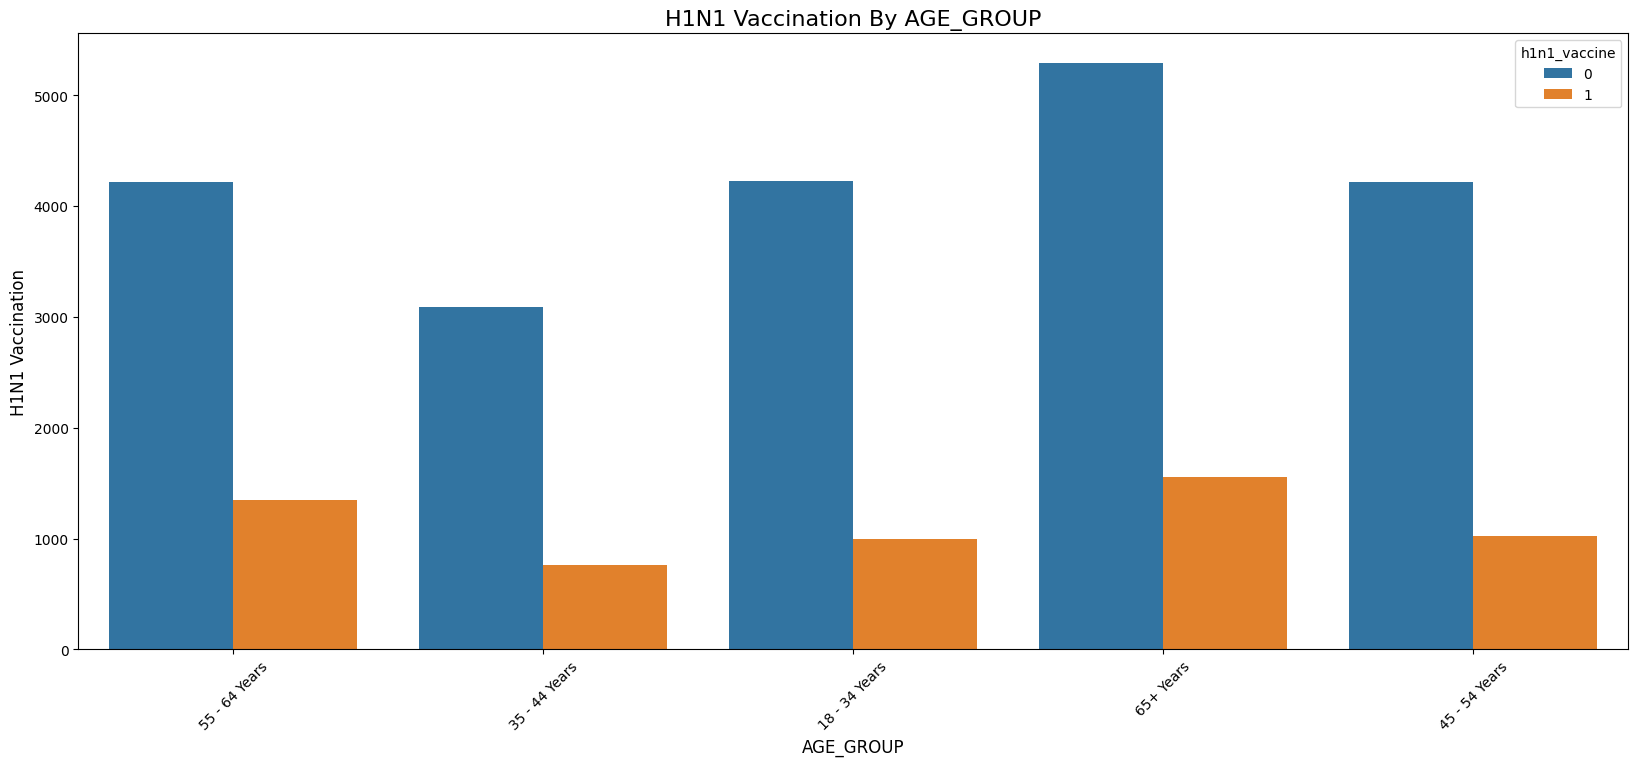

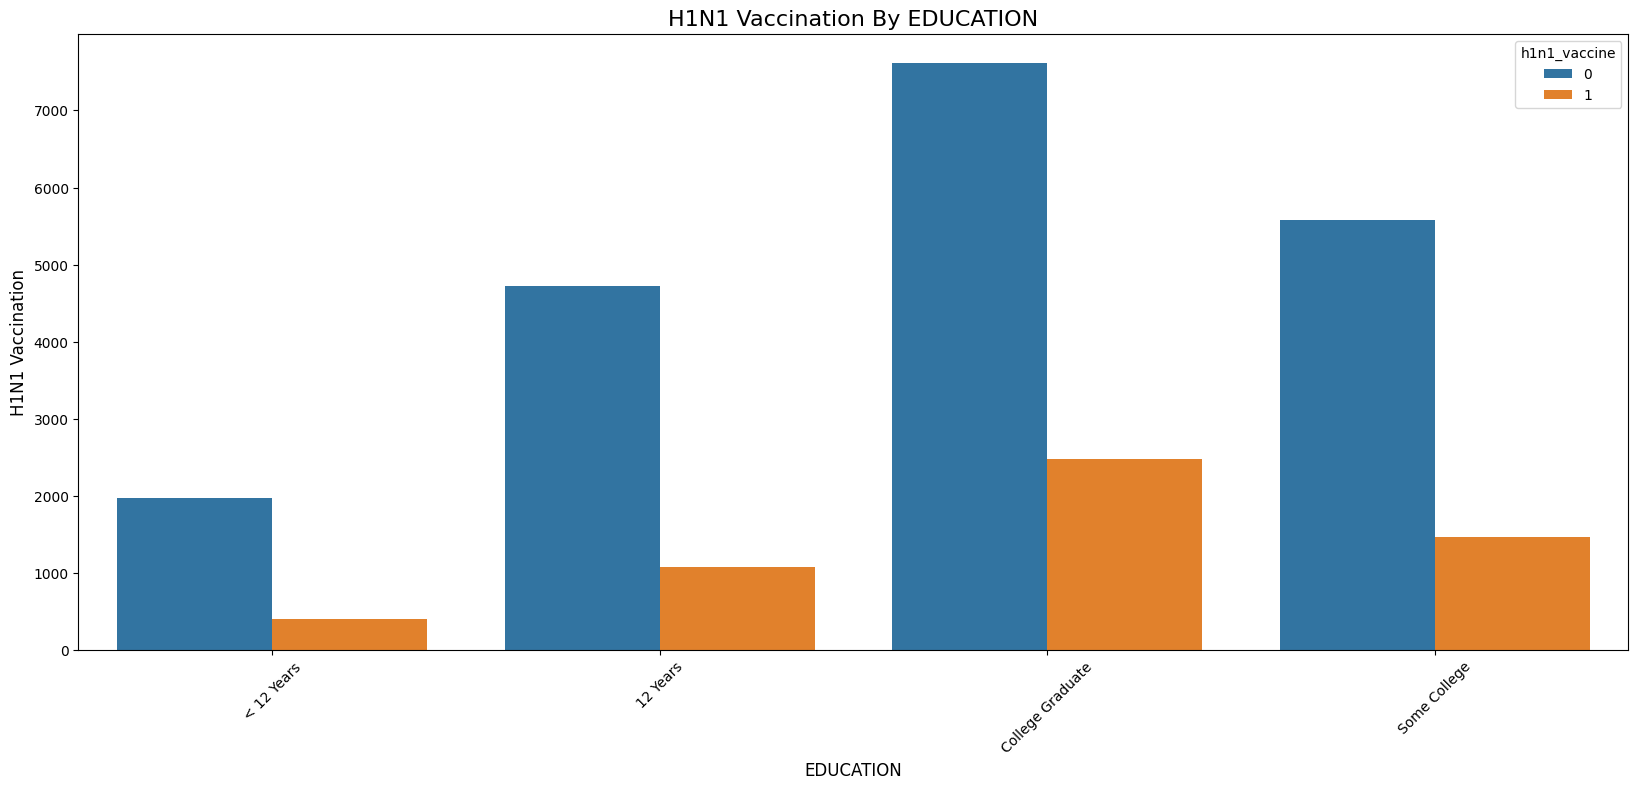

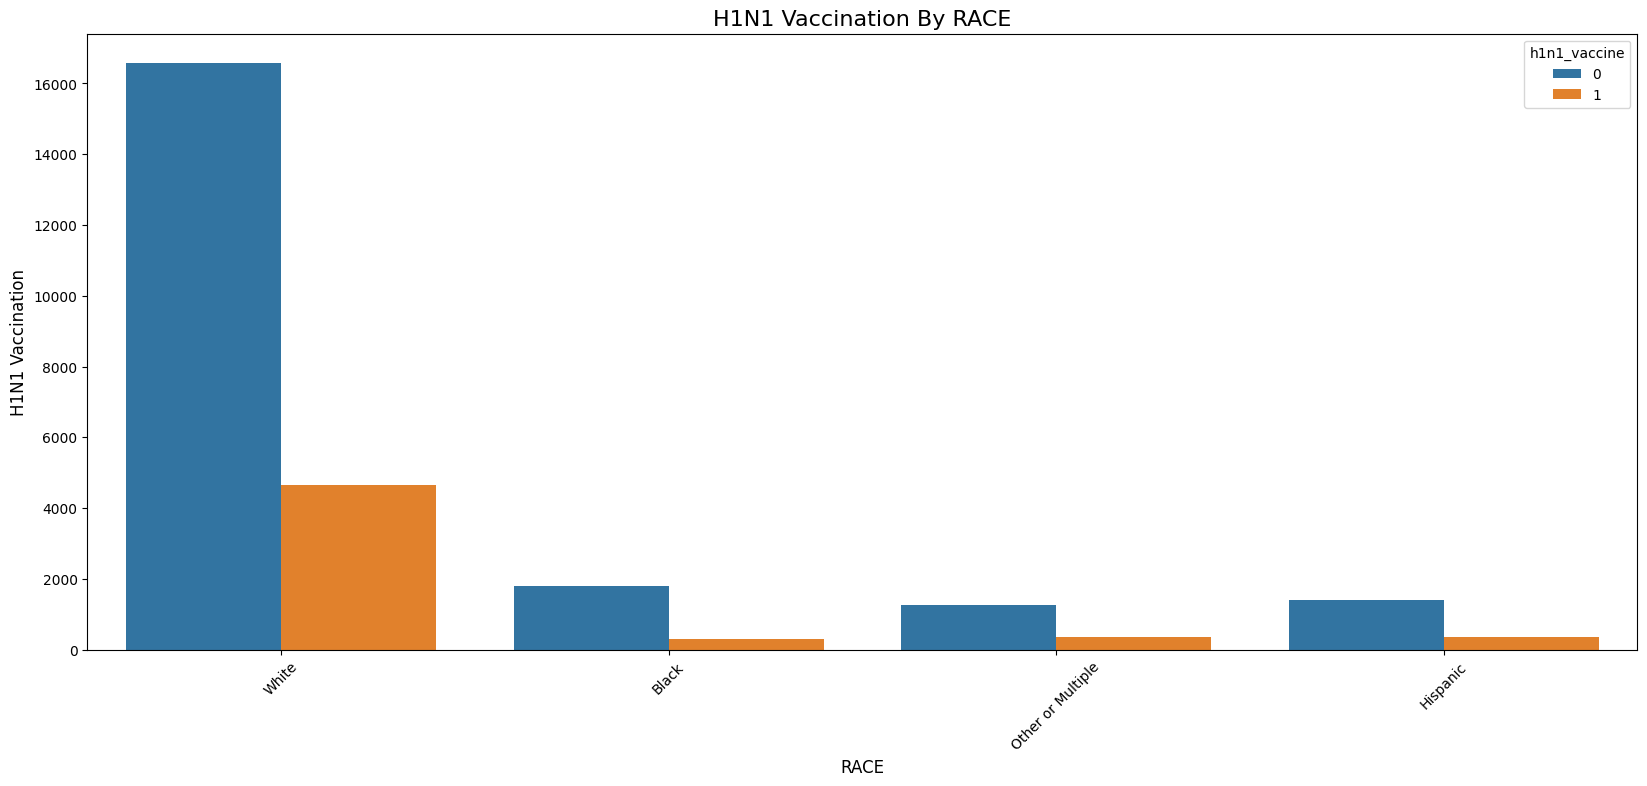

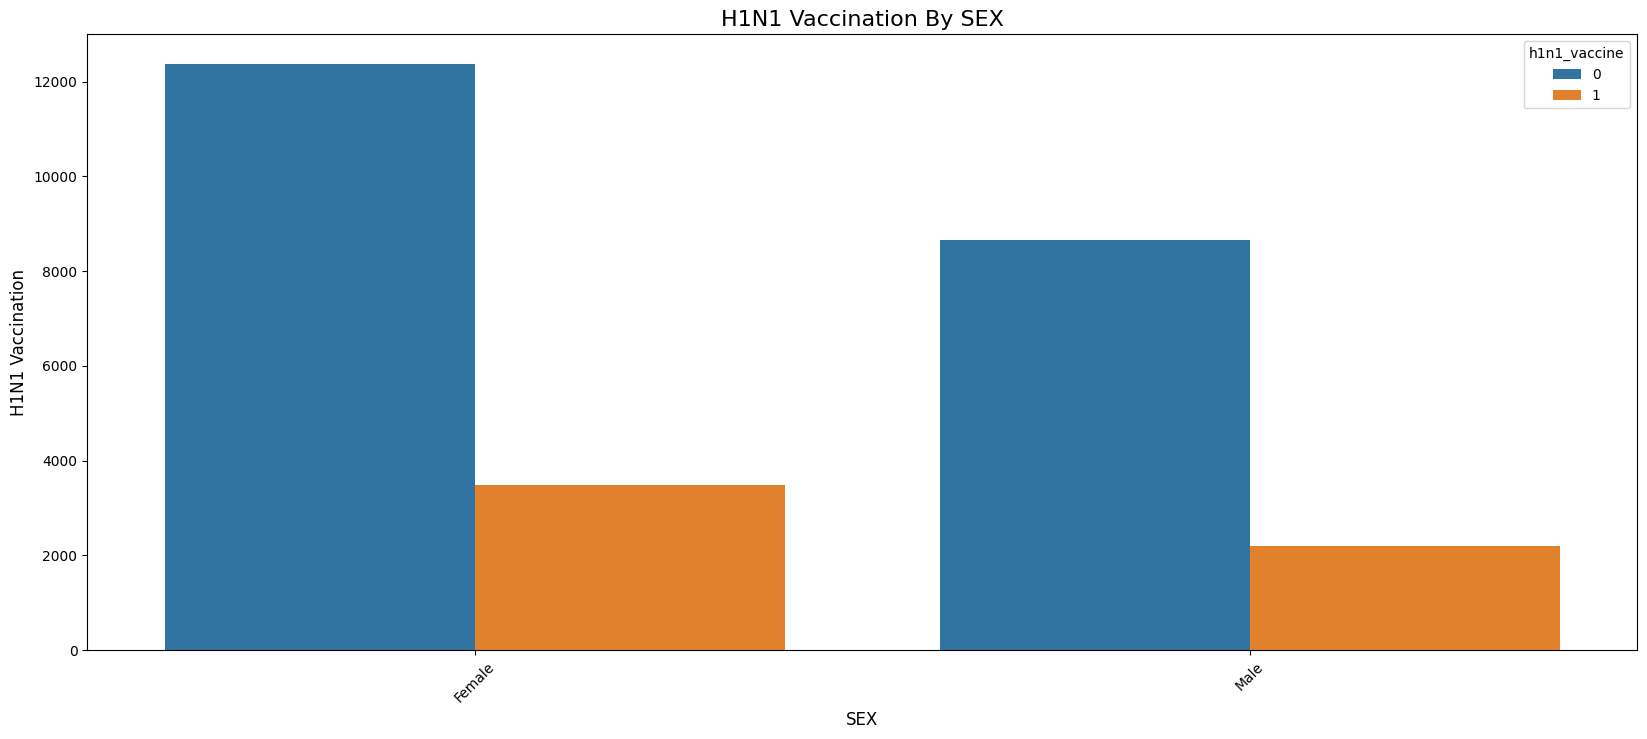

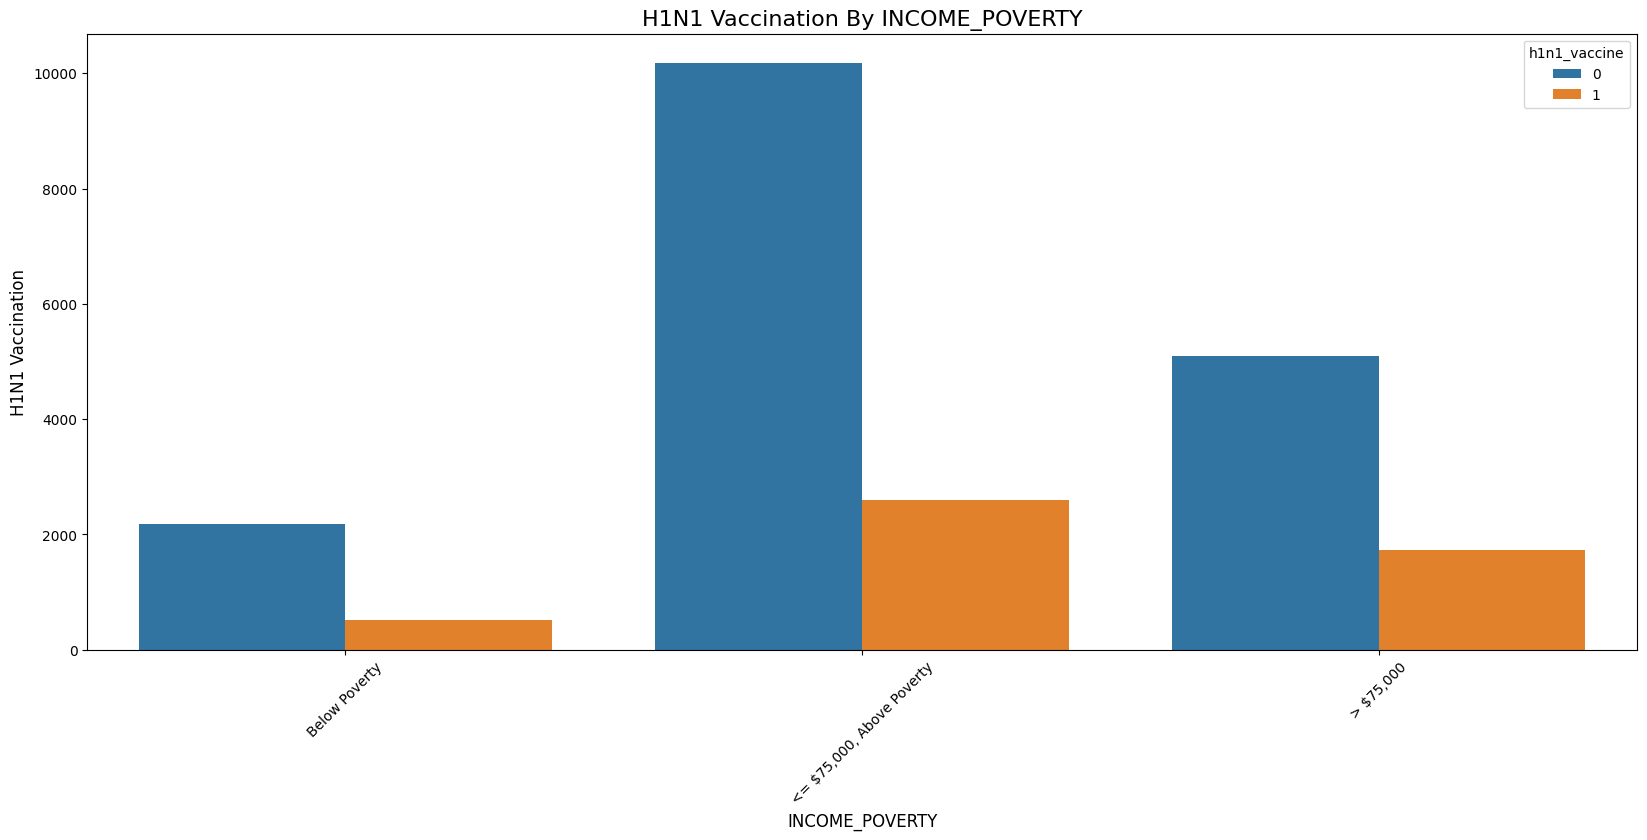

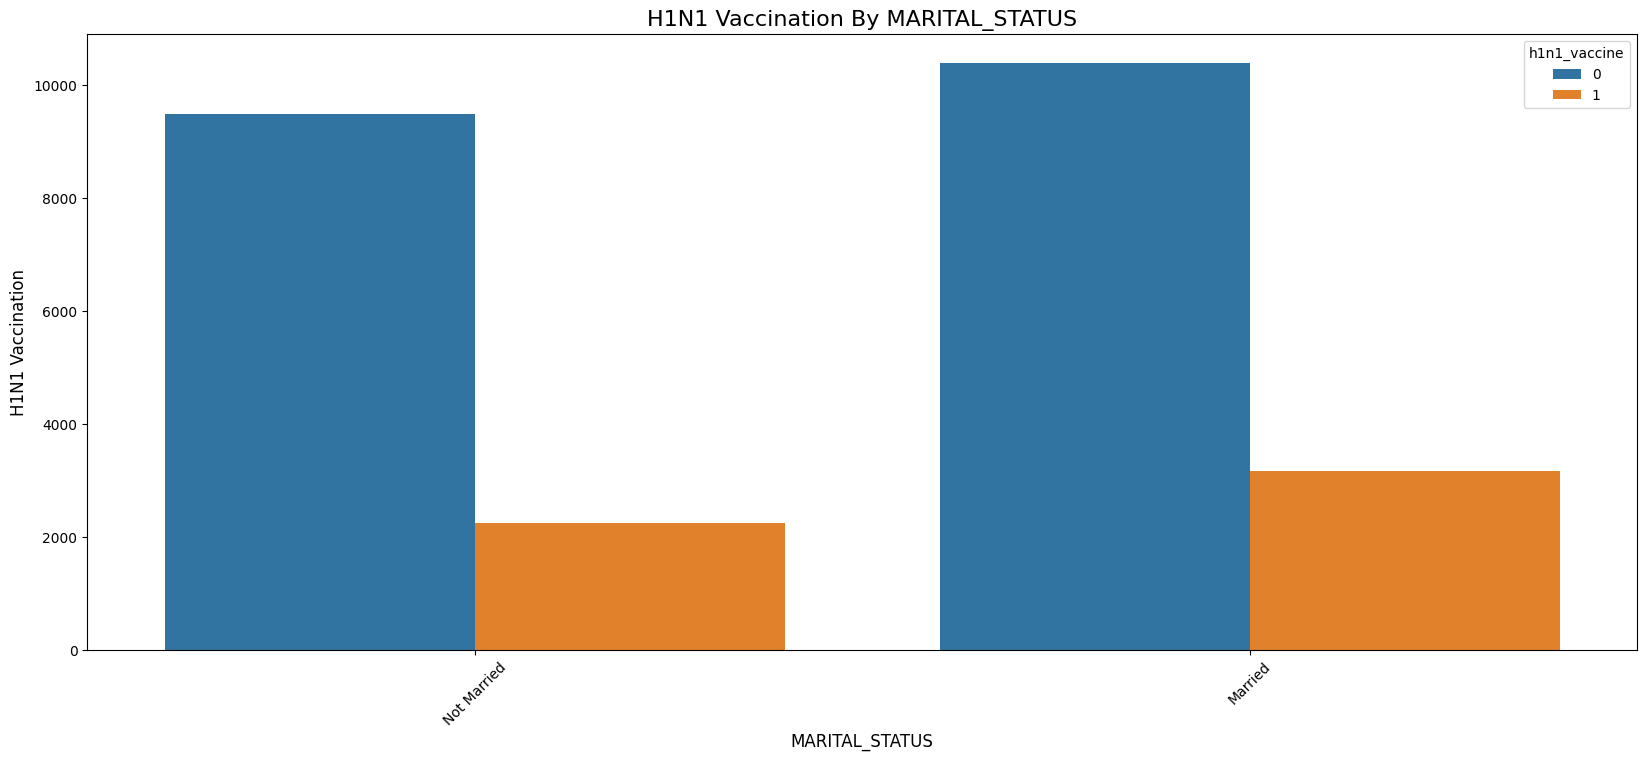

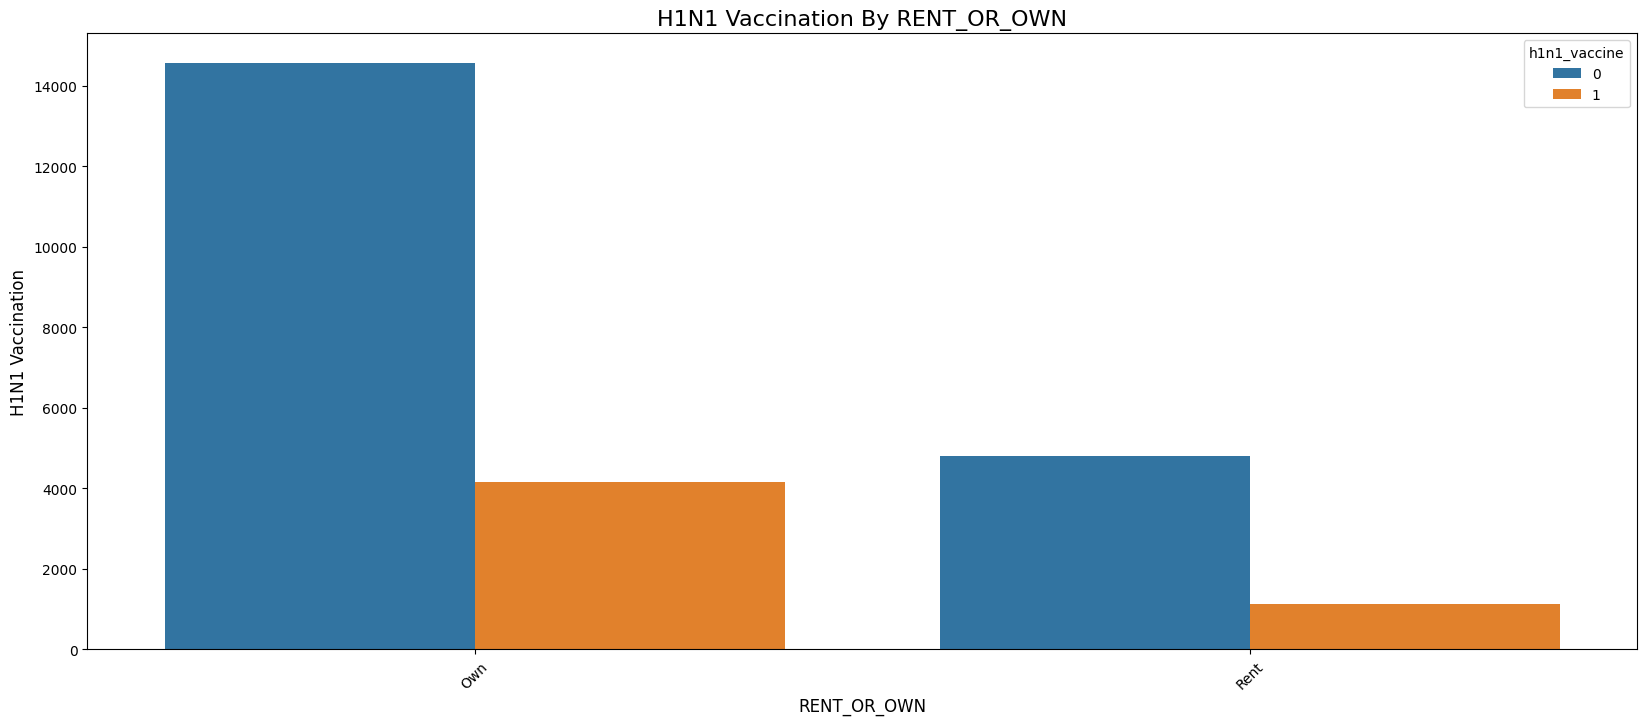

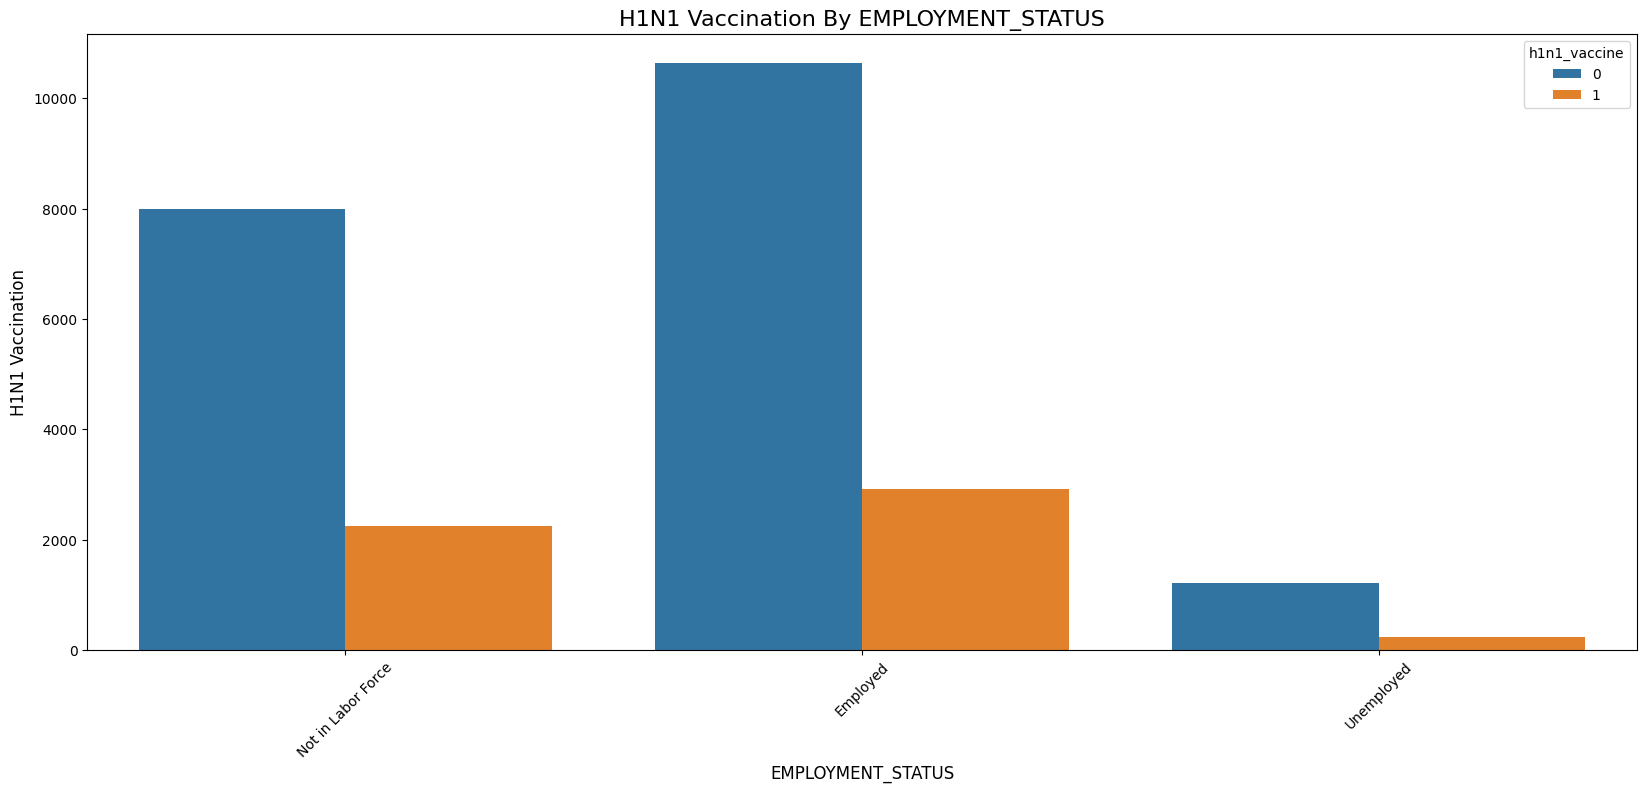

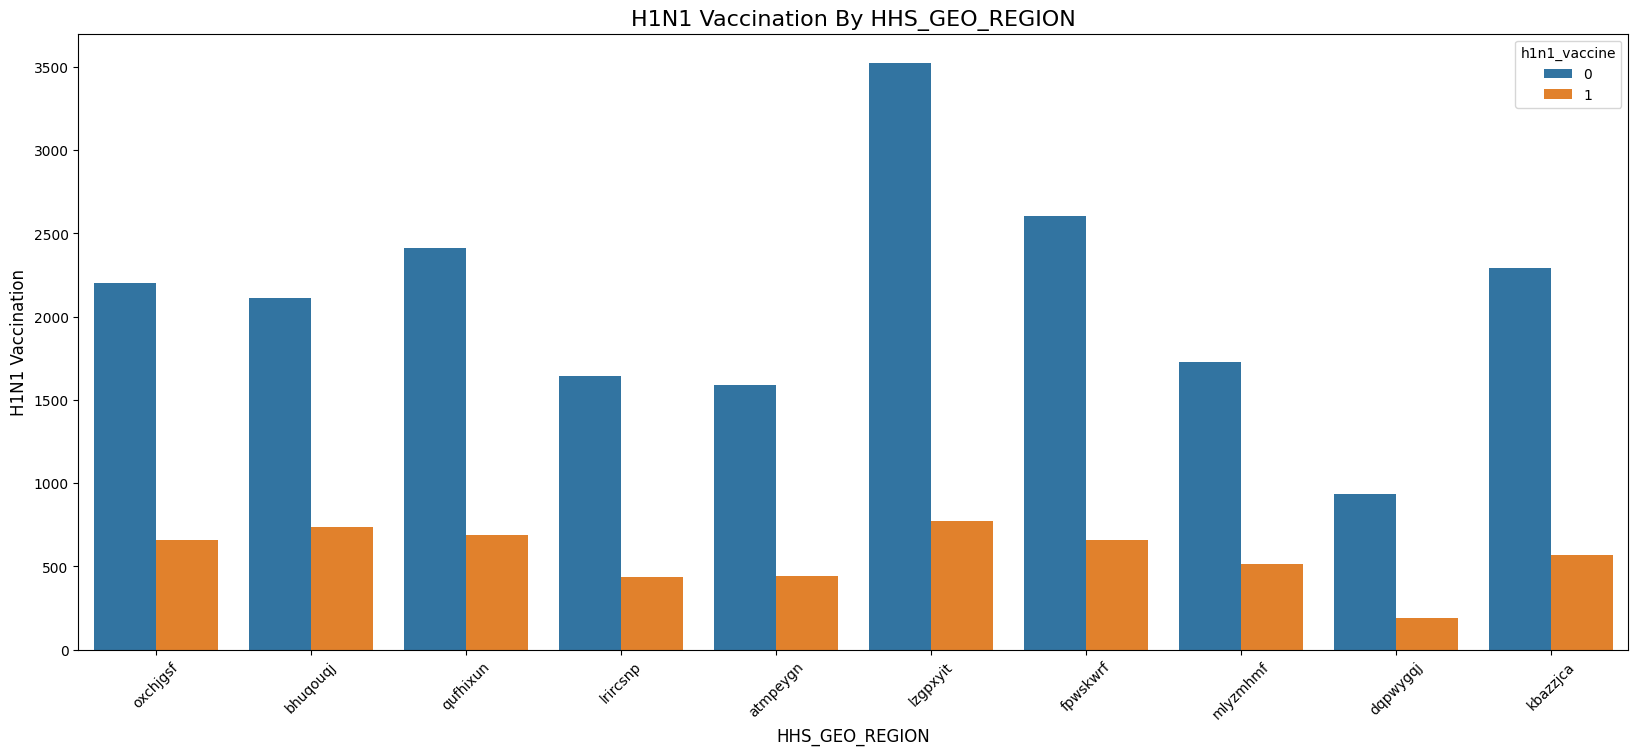

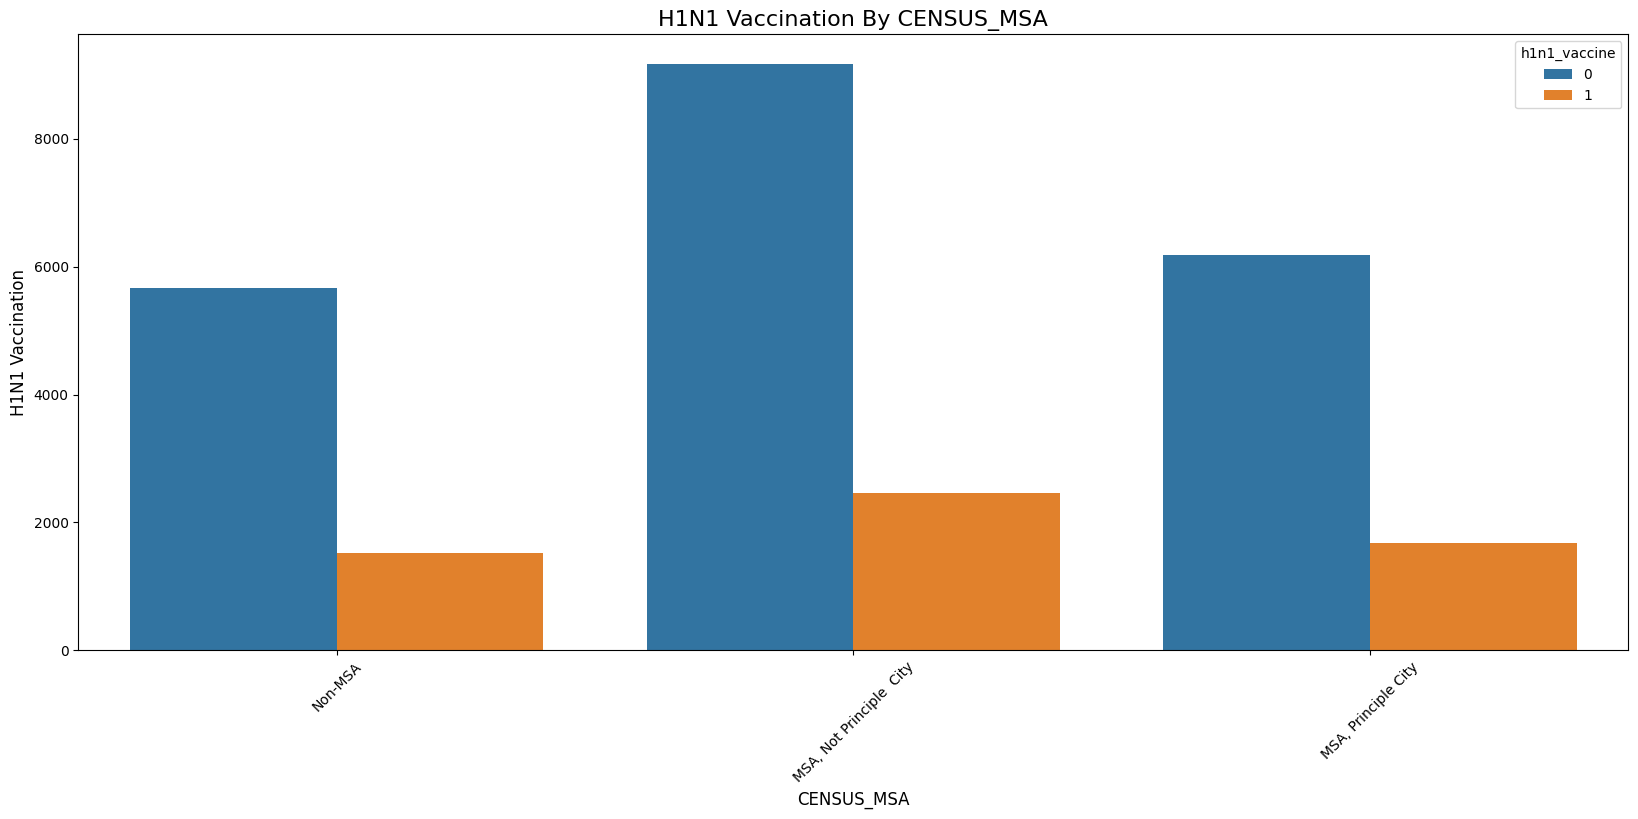

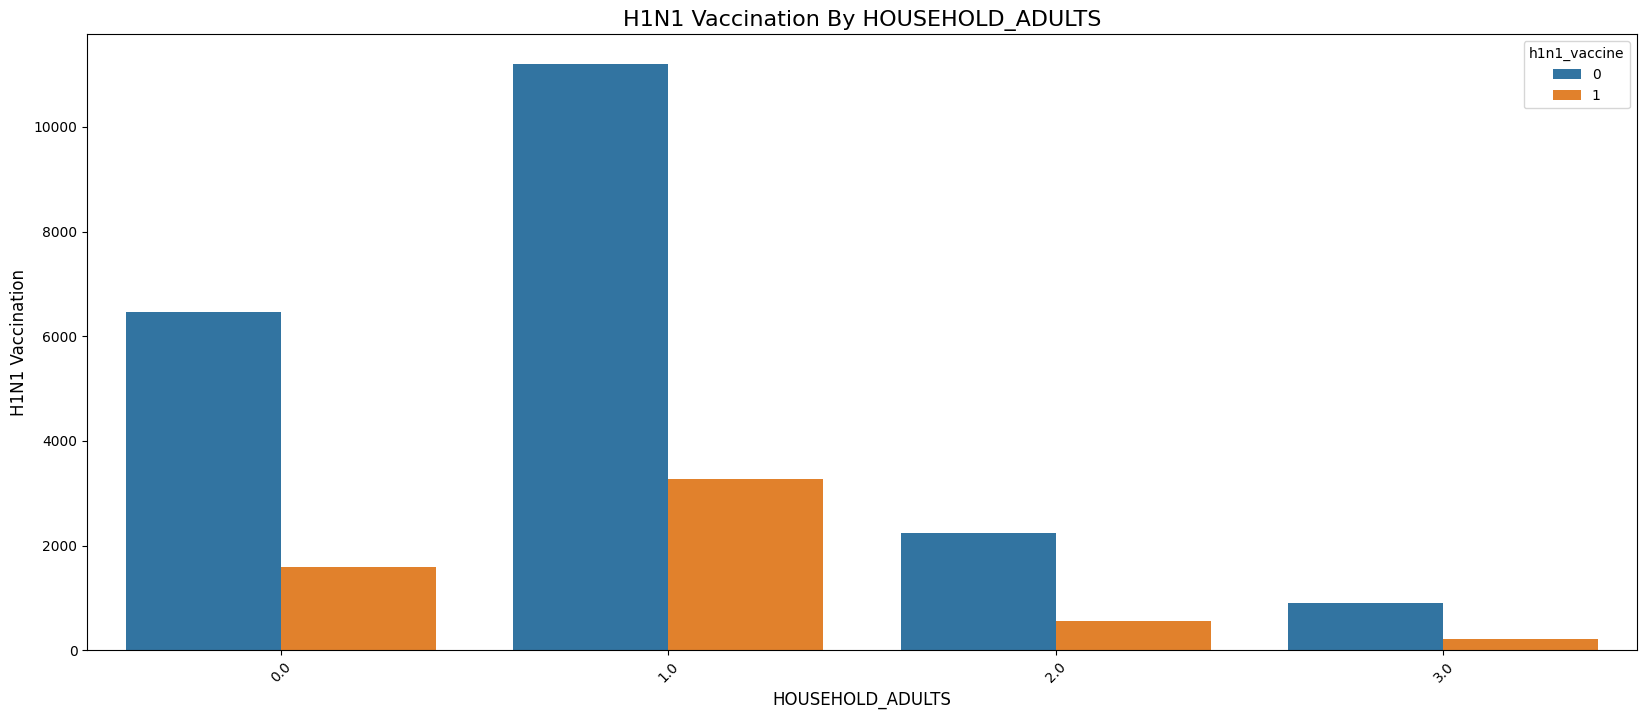

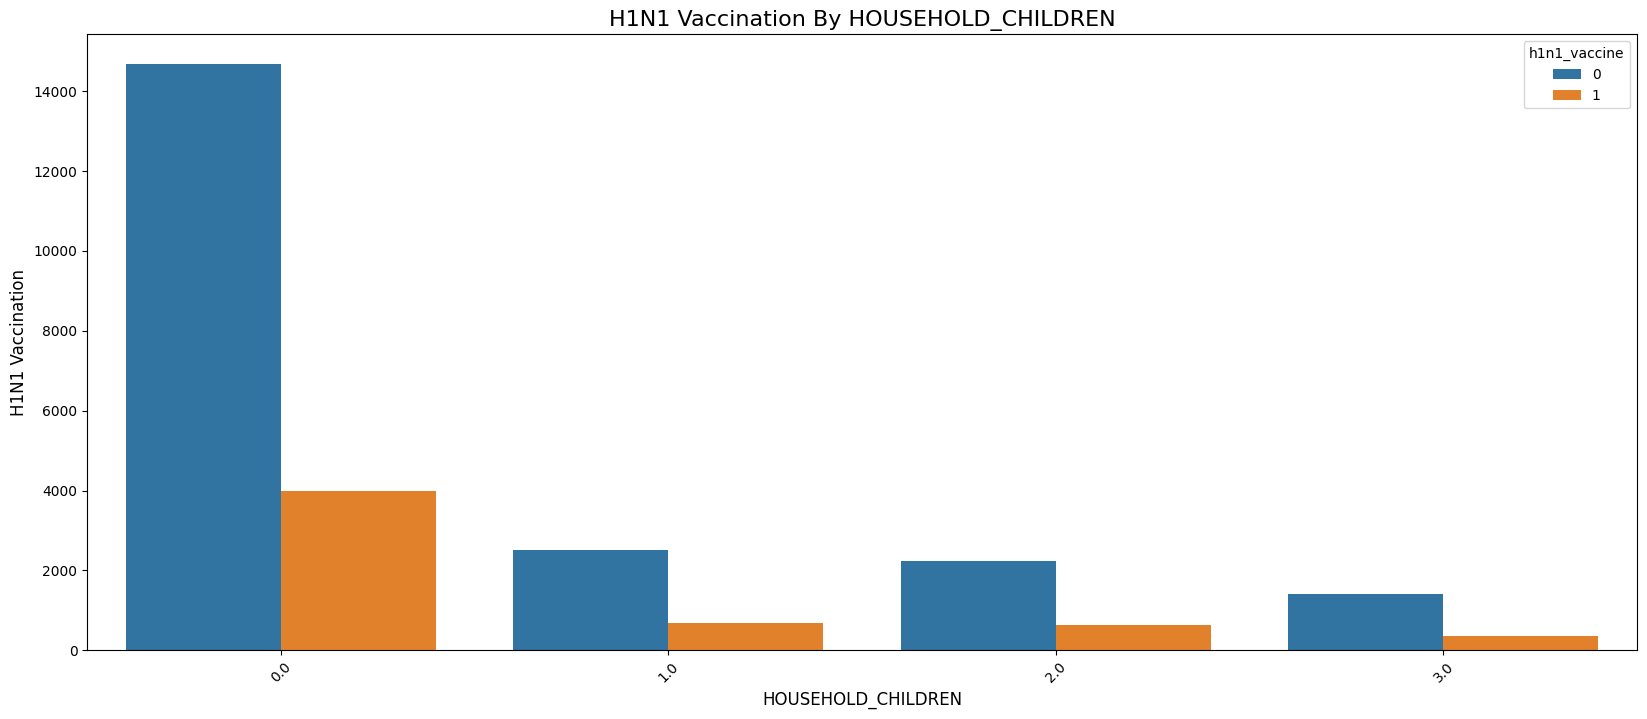

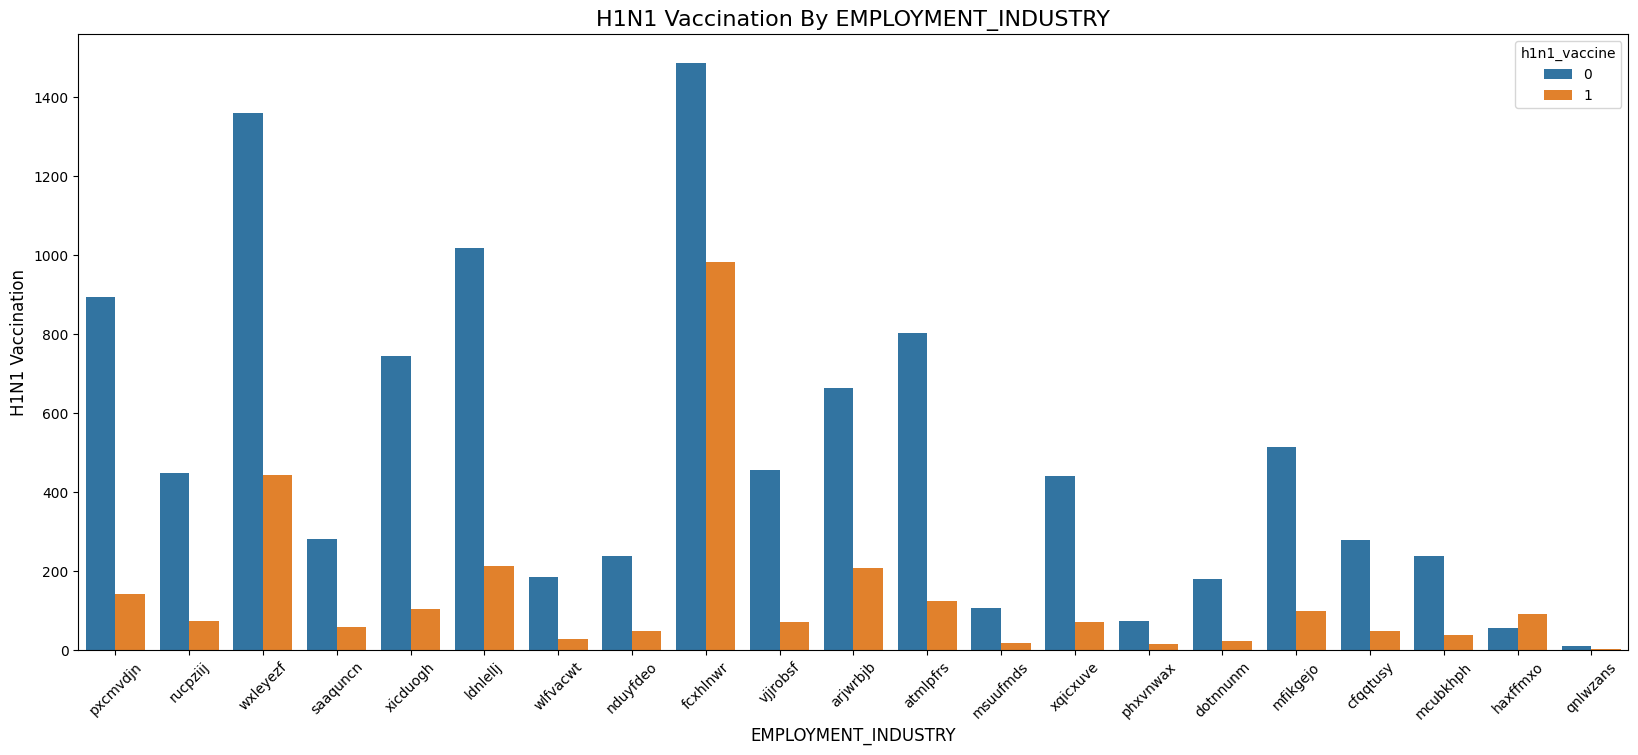

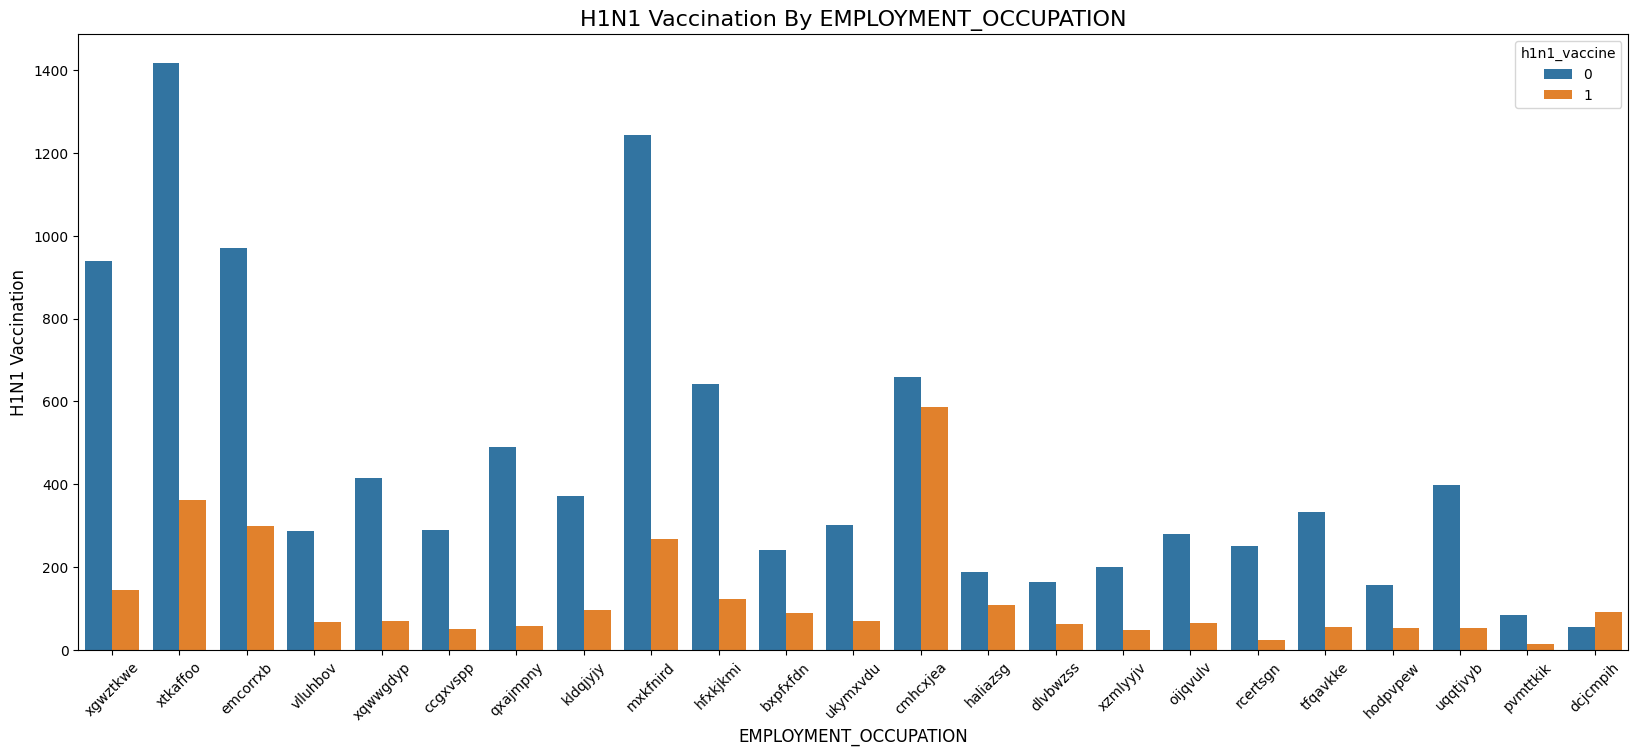

In [24]:
for col in df_h1n1:
  if col!="respondent_id":
        plot_count(x=col, data=df_h1n1, title=f"{'H1N1 Vaccination'} By {col.upper()}", xlabel=col)

### **Conclusion For Bi-Variate Analysis H1N1 Vaccine**

1. **behavioral_antiviral_meds**: The plot shows that individuals who take antiviral medications are more likely to get vaccinated against H1N1. This suggests that people who are proactive about their health are more likely to take preventive measures, including vaccination.

2. **behavioral_avoidance**: The plot shows that individuals who avoid close contact with people who have flu-like symptoms are more likely to get vaccinated. This suggests that people who are cautious about their health and take steps to avoid infection are more likely to get vaccinated.

3. **behavioral_face_mask**: The plot shows that individuals who wear face masks are more likely to get vaccinated. This suggests that people who take precautions to prevent the spread of illness are more likely to take preventive measures, including vaccination.

4. **behavioral_wash_hands**: The plot shows that individuals who frequently wash their hands are more likely to get vaccinated. This suggests that people who prioritize hygiene and take steps to prevent the spread of illness are more likely to get vaccinated.

5. **behavioral_large_gatherings**: The plot shows that individuals who avoid large gatherings are more likely to get vaccinated. This suggests that people who are cautious about their health and take steps to avoid infection are more likely to get vaccinated.

6. **behavioral_outside_home**: The plot shows that individuals who spend more time outside their homes are less likely to get vaccinated. This suggests that people who are more mobile and interact with others more frequently may be less likely to prioritize vaccination.

7. **behavioral_touch_face**: The plot shows that individuals who touch their faces frequently are less likely to get vaccinated. This suggests that people who have habits that increase their risk of infection may be less likely to prioritize vaccination.

8. **doctor_recc_h1n1**: The plot shows that individuals who receive a doctor's recommendation for H1N1 vaccination are more likely to get vaccinated. This suggests that healthcare provider recommendations play a significant role in influencing vaccination decisions.

9. **chronic_med_condition**: The plot shows that individuals with chronic medical conditions are more likely to get vaccinated. This suggests that people with underlying health conditions may be more motivated to take preventive measures to protect their health.

10. **child_under_6_months**: The plot shows that individuals with children under 6 months old are more likely to get vaccinated. This suggests that parents of young children may be more motivated to protect their children's health and take preventive measures.

11. **health_worker**: The plot shows that healthcare workers are more likely to get vaccinated. This suggests that individuals in the healthcare industry may be more aware of the importance of vaccination and take preventive measures to protect themselves and their patients.

12. **health_insurance**: The plot shows that individuals with health insurance are more likely to get vaccinated. This suggests that access to healthcare and financial resources may play a role in influencing vaccination decisions.

13. **opinion_h1n1_vacc_effective**: The plot shows that individuals who believe the H1N1 vaccine is effective are more likely to get vaccinated. This suggests that people's perceptions of vaccine effectiveness play a significant role in influencing their vaccination decisions.

14. **opinion_h1n1_risk**: The plot shows that individuals who perceive a higher risk of H1N1 are more likely to get vaccinated. This suggests that people's risk perceptions play a role in influencing their vaccination decisions.

15. **opinion_h1n1_sick_from_vacc**: The plot shows that individuals who believe they can get sick from the H1N1 vaccine are less likely to get vaccinated. This suggests that misconceptions about vaccine safety may deter people from getting vaccinated.

16. **age_group**: The plot shows that older adults are more likely to get vaccinated. This suggests that age may play a role in influencing vaccination decisions, with older adults being more motivated to protect their health.

17. **education**: The plot shows that individuals with higher levels of education are more likely to get vaccinated. This suggests that education may play a role in influencing vaccination decisions, with more educated individuals being more aware of the importance of vaccination.

18. **race**: The plot shows that there are racial disparities in vaccination rates, with some racial groups being less likely to get vaccinated. This suggests that cultural and socioeconomic factors may influence vaccination decisions.

19. **sex**: The plot shows that females are more likely to get vaccinated than males. This suggests that gender may play a role in influencing vaccination decisions.

20. **income_poverty**: The plot shows that individuals with higher incomes are more likely to get vaccinated. This suggests that socioeconomic factors, including access to healthcare and financial resources, may influence vaccination decisions.

21. **marital_status**: The plot shows that married individuals are more likely to get vaccinated. This suggests that marital status may play a role in influencing vaccination decisions, with married individuals being more motivated to protect their health.

22. **rent_or_own**: The plot shows that homeowners are more likely to get vaccinated. This suggests that socioeconomic factors, including housing status, may influence vaccination decisions.

23. **employment_status**: The plot shows that employed individuals are more likely to get vaccinated. This suggests that employment status may play a role in influencing vaccination decisions, with employed individuals being more motivated to protect their health.

24. **hhs_geo_region**: The plot shows that there are regional disparities in vaccination rates, with some regions being less likely to get vaccinated. This suggests that geographic location may influence vaccination decisions.

25. **census_msa**: The plot shows that individuals living in metropolitan areas are more likely to get vaccinated. This suggests that urban-rural disparities may influence vaccination decisions.

26. **household_adults**: The plot shows that households with more adults are more likely to get vaccinated. This suggests that household composition may play a role in influencing vaccination decisions.

27. **household_children**: The plot shows that households with more children are more likely to get vaccinated. This suggests that families with young children may be more motivated to protect their health.

28. **employment_industry**: The plot shows that individuals working in certain industries (e.g., healthcare) are more likely to get vaccinated. This suggests that occupation may play a role in influencing vaccination decisions.

29. **employment_occupation**: The plot shows that individuals in certain occupations (e.g., healthcare professionals) are more likely to get vaccinated. This suggests that occupation may play a role in influencing vaccination decisions.



### **TRAINNG AND TESTING A MODEL**

In [25]:
# Define our X and y
X = df.drop(columns = ['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df['h1n1_vaccine']

In [26]:
# Train - Test Set Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [27]:
# Set up lists for each columns datatypes
num_cols = []
ohe_cols = []
freq_cols = []

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [28]:
# We wanted to see each column category
print(f'Numerical Columns:', num_cols)
print('\n')
print(f'Object Columns (with less than 10 unique values):', ohe_cols)
print('\n')
print(f'Object Columns (with more than 10 unique values):', freq_cols)

Numerical Columns: ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


Object Columns (with less than 10 unique values): ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']


Object Columns (with more than 10 unique values): ['hhs_geo_region', 'employment_industry', 'employment_occupation']


In [29]:
# Preprocessing with Pipelines
num_transformer = Pipeline(steps=[
    ('num_imputer', IterativeImputer(max_iter=100, random_state=42)),   # replace missing values by IterativeImputer
    ('minmaxscaler', MinMaxScaler())                                    # Scale the numbers by MinMaxScaler
])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # replace missing categories by SimpleImputer
    ('ohe_encoder', OneHotEncoder(handle_unknown='ignore'))                     # Transform each category into a new column
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)), # replace category names with frequency counts by CountEncoder
    ('freq_imputer', IterativeImputer(max_iter=100, random_state=42))            # replace missing values by IterativeImputer
])

In [30]:
# Preprocessor defined using ColumnTransformer by packaging the all components together
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

In [31]:
# Fitting preprocessor to see the components as a whole
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral...
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 ['hhs_geo_region', 'employment_industry',
                                  'employment_occupation'])])

In [32]:
# Let'see what this looks like after the preprocessor transformation
X_train_transformed = preprocessor.transform(X_train)
X_train_transformed.shape

(21365, 59)

In [33]:
# Visualize it with Pandas dataframe
pd.DataFrame(X_train_transformed).head()

0    1         2         3         4         5    6    7    8   \
0  0.666667  0.5  0.014625  0.967488  0.043917  0.894587  0.0  1.0  1.0   
1  0.666667  0.5  1.000000  0.967488  1.000000  0.894587  1.0  1.0  1.0   
2  0.000000  0.5  0.014625  0.000000  0.043917  0.894587  0.0  1.0  0.0   
3  0.333333  0.5  0.014625  0.000000  0.043917  0.000000  0.0  0.0  0.0   
4  0.333333  0.0  0.014625  0.000000  0.043917  0.894587  0.0  0.0  0.0   

         9         10   11   12       13        14    15        16    17  \
0  0.133733  0.134134  1.0  0.0  0.08447  0.000000  1.00  0.759586  0.25   
1  0.133733  0.134134  0.0  0.0  0.08447  0.684270  1.00  0.759586  0.75   
2  0.133733  0.134134  0.0  0.0  0.08447  0.912059  0.00  0.278757  0.00   
3  0.133733  0.134134  0.0  0.0  0.08447  0.912059  0.75  0.278757  0.00   
4  0.133733  0.134134  0.0  0.0  0.08447  0.912059  0.50  0.278757  1.00   

     18    19    20        21        22   23   24   25   26   27   28   29  \
0  0.75  0.75  0.25  0.333333  0.000000  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1  1.00  0.75  0.75  0.000000  0.000000  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2  0.00  0.75  0.00  0.333333  0.333333  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
3  0.75  0.25  0.25  0.000000  0.000000  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4  1.00  0.25  1.00  0.333333  0.333333  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   
4  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   

    45   46   47   48   49   50   51   52   53   54   55        56        57  \
0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.159420  0.497402   
1  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.159420  0.066791   
2  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.117061  0.341774   
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.105032  0.341774   
4  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.082659  0.497402   

         58  
0  0.502504  
1  0.374865  
2  0.065809  
3  0.374865  
4  0.502504

# **Modeling Iterations**



### **MODEL 1: Decision Tree Classifier**

In [34]:
# Setting up the DecisionTreeClassifier to go though the pipeline
dtc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', max_depth = 5))
])


In [35]:
# fitting the model to the training data
dtc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5))])

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for test and train sets
pred_1 = dtc.predict(X_test)
train_pred_1 = dtc.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_1))

# Confusion matrix
cm = confusion_matrix(y_test, pred_1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_1 = f1_score(y_train, train_pred_1, average='micro')
score_1 = f1_score(y_test, pred_1, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Decision Tree Classifier is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for Decision Tree Classifier is : {}'.format(score_1))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, dtc.predict_proba(X_test)[:, 1])
print('The Roc_Auc score for Decision Tree Classifier is : {}'.format(roc_auc))


              precision    recall  f1-score   support

           0       0.92      0.81      0.86      4212
           1       0.51      0.74      0.60      1130

    accuracy                           0.79      5342
   macro avg       0.71      0.78      0.73      5342
weighted avg       0.83      0.79      0.81      5342



Train F1 Score (Micro) for Decision Tree Classifier is : 0.7926983384039317
Test F1 Score (Micro) for Decision Tree Classifier is : 0.793897416697866
The Roc_Auc score for Decision Tree Classifier is : 0.8483047802738068


## **MODEL 2: Logistic Regression**

In [37]:
# Setting up the logistic regression model to go through the pipeline
logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, C=1, class_weight= 'balanced', solver= 'lbfgs',
                                      random_state=42))
])


In [38]:
# fitting the model to the training data
logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=500,
                                    random_state=42))])

In [39]:
# Predictions for test and train sets
pred_2 = logreg.predict(X_test)
train_pred_2 = logreg.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_2))

# Confusion matrix
cm = confusion_matrix(y_test, pred_2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_2 = f1_score(y_train, train_pred_2, average='micro')
score_2 = f1_score(y_test, pred_2, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Logistic Regression Classifier is : {}'.format(train_score_2))
print('Test F1 Score (Micro) for Logistic Regression Classifier is : {}'.format(score_2))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print('The Roc_Auc score for Logistic Regression Classifier is : {}'.format(roc_auc))


              precision    recall  f1-score   support

           0       0.91      0.79      0.85      4212
           1       0.48      0.72      0.58      1130

    accuracy                           0.78      5342
   macro avg       0.70      0.76      0.71      5342
weighted avg       0.82      0.78      0.79      5342



Train F1 Score (Micro) for Logistic Regression Classifier is : 0.775754739059209
Test F1 Score (Micro) for Logistic Regression Classifier is : 0.7766754024709847
The Roc_Auc score for Logistic Regression Classifier is : 0.8328774088361108


## **MODEL 3: KNN Classifier**

In [40]:
# Setting up the KNN model to go through the pipeline
knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5, p=1, weights= 'distance'))
])

In [41]:
# fitting the model to the training data
knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'rent_or_own',
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier', KNeighborsClassifier(p=1, weights='distance'))])

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4212
           1       0.56      0.26      0.35      1130

    accuracy                           0.80      5342
   macro avg       0.69      0.60      0.62      5342
weighted avg       0.77      0.80      0.77      5342



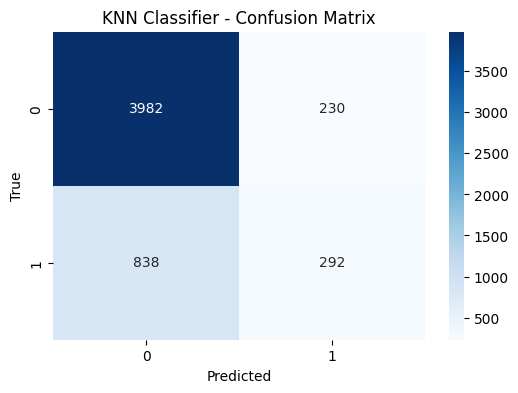

Train F1 Score (Micro) for KNN Classifier is : 1.0
Test F1 Score (Micro) for KNN Classifier is : 0.8000748783227256
The Roc_Auc score for kNN Classifier is : 0.6995481725201489


In [44]:
# Predictions for test and train sets
pred_3 = knn.predict(X_test)
train_pred_3 = knn.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_3))

# Confusion matrix
cm = confusion_matrix(y_test, pred_3)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_3 = f1_score(y_train, train_pred_3, average='micro')
score_3 = f1_score(y_test, pred_3, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for KNN Classifier is : {}'.format(train_score_3))
print('Test F1 Score (Micro) for KNN Classifier is : {}'.format(score_3))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
print('The Roc_Auc score for kNN Classifier is : {}'.format(roc_auc))


## **MODEL 4: Gradient Boosting Classifier**

In [45]:
# Setting up the gradient boosting classifier to go through the pipeline
gbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 200,
        random_state=42))
])

In [46]:
# fitting the model to the training data
gbc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=5, n_estimators=200,
                                            random_state=42))])

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4212
           1       0.71      0.51      0.59      1130

    accuracy                           0.85      5342
   macro avg       0.79      0.73      0.75      5342
weighted avg       0.84      0.85      0.84      5342



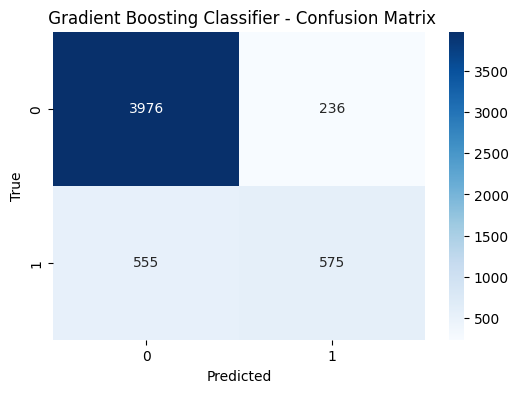

Train F1 Score (Micro) for Gradient Boosting Classifier is : 0.8917388251813714
Test F1 Score (Micro) for Gradient Boosting Classifier is : 0.8519281168101834
The Roc_Auc score for Gradient Boosting Classifier is : 0.8669036633638405


In [47]:
# Predictions for test and train sets
pred_4 = gbc.predict(X_test)
train_pred_4 = gbc.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_4))

# Confusion matrix
cm = confusion_matrix(y_test, pred_4)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(' Gradient Boosting Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_4 = f1_score(y_train, train_pred_4, average='micro')
score_4 = f1_score(y_test, pred_4, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Gradient Boosting Classifier is : {}'.format(train_score_4))
print('Test F1 Score (Micro) for Gradient Boosting Classifier is : {}'.format(score_4))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])
print('The Roc_Auc score for Gradient Boosting Classifier is : {}'.format(roc_auc))

## **MODEL 6: XG Boosting Classifier**

In [48]:
# Setting up the XG Boosting model to go through the pipeline
xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgboost.XGBClassifier(learning_rate= 1, max_depth= 2, n_estimators= 100, random_state=42))
])

In [49]:
# fitting the model to the training data
xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [50]:
# Predictions for test and train sets
pred_5 = xgb.predict(X_test)
train_pred_5 = xgb.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_5))

# Confusion matrix
cm = confusion_matrix(y_test, pred_5)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(' XG Boosting Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_5 = f1_score(y_train, train_pred_5, average='micro')
score_5 = f1_score(y_test, pred_5, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for XG Boosting Classifier is : {}'.format(train_score_5))
print('Test F1 Score (Micro) for XG Boosting Classifier is : {}'.format(score_5))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
print('The Roc_Auc score for XG Boosting Classifier is : {}'.format(roc_auc))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4212
           1       0.72      0.52      0.60      1130

    accuracy                           0.85      5342
   macro avg       0.80      0.73      0.75      5342
weighted avg       0.84      0.85      0.84      5342



Train F1 Score (Micro) for XG Boosting Classifier is : 0.8635150947811842
Test F1 Score (Micro) for XG Boosting Classifier is : 0.8541744664919506
The Roc_Auc score for XG Boosting Classifier is : 0.8619786282765634


## **MODEL 6: Random Forest Classifier**

In [51]:
# Setting up the RandomForestClassifier to go through the pipeline
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight= 'balanced', max_depth= 5, min_samples_leaf= 1,
                                          n_estimators= 200, random_state=42))
])

In [52]:
# fitting the model to the training data
rfc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=200, random_state=42))])

In [53]:
# Predictions for test and train sets
pred_6 = rfc.predict(X_test)
train_pred_6 = rfc.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_6))

# Confusion matrix
cm = confusion_matrix(y_test, pred_6)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(' Random Forest Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_6 = f1_score(y_train, train_pred_6, average='micro')
score_6 = f1_score(y_test, pred_6, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Random Forest Classifier is : {}'.format(train_score_6))
print('Test F1 Score (Micro) for Random Forest Classifier is : {}'.format(score_6))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])
print('The Roc_Auc score for Random Forest Classifier is : {}'.format(roc_auc))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      4212
           1       0.51      0.74      0.61      1130

    accuracy                           0.80      5342
   macro avg       0.72      0.78      0.73      5342
weighted avg       0.83      0.80      0.81      5342



Train F1 Score (Micro) for Random Forest Classifier is : 0.7932131991575005
Test F1 Score (Micro) for Random Forest Classifier is : 0.796518157993261
The Roc_Auc score for Random Forest Classifier is : 0.8494911294321325


## **Comparison of Model ROC Curves**

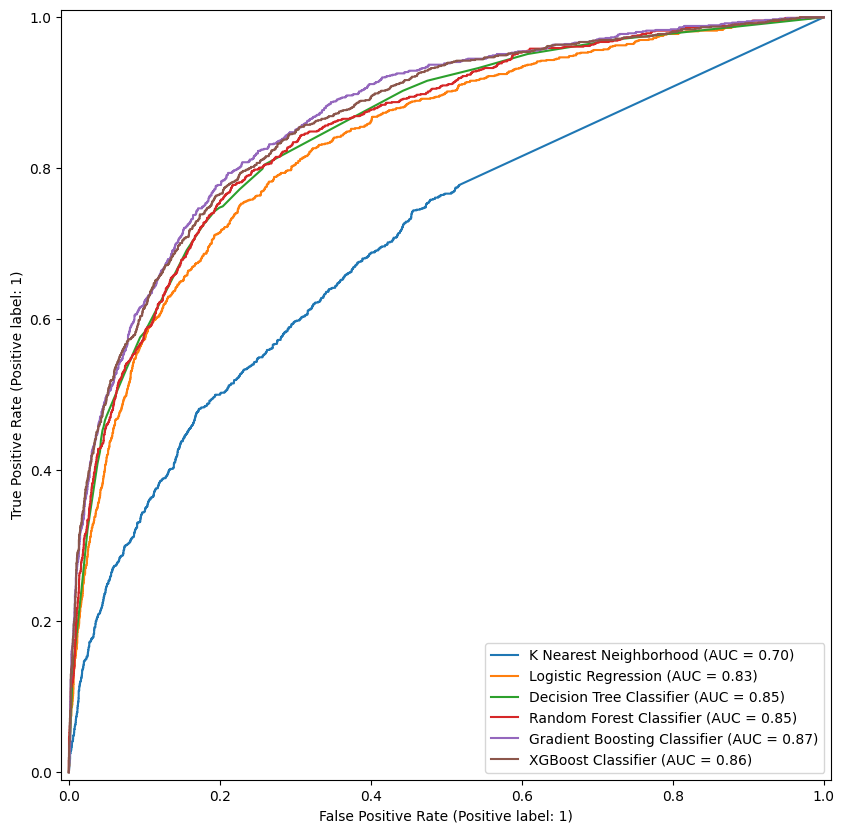

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
RocCurveDisplay.from_estimator(knn, X_test, y_test, name='K Nearest Neighborhood', ax=ax)
RocCurveDisplay.from_estimator(logreg, X_test, y_test, name='Logistic Regression', ax=ax)
RocCurveDisplay.from_estimator(dtc, X_test, y_test, name='Decision Tree Classifier', ax=ax)
RocCurveDisplay.from_estimator(rfc, X_test, y_test, name='Random Forest Classifier', ax=ax)
RocCurveDisplay.from_estimator(gbc, X_test, y_test, name='Gradient Boosting Classifier', ax=ax)
RocCurveDisplay.from_estimator(xgb, X_test, y_test, name='XGBoost Classifier', ax=ax)

## **Final Model: Gradient Boosting Classifier**

In [55]:
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(learning_rate =0.1, n_estimators=200,
                                              max_depth=5,
                                              random_state=42))
])


In [56]:
output_final_model = final_model.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4212
           1       0.71      0.51      0.59      1130

    accuracy                           0.85      5342
   macro avg       0.79      0.73      0.75      5342
weighted avg       0.84      0.85      0.84      5342



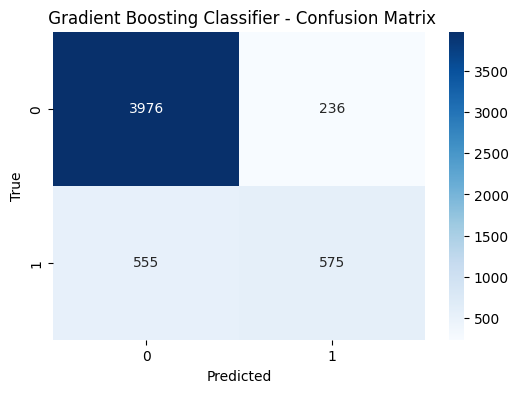

Train F1 Score (Micro) for Gradient Boosting Classifier is : 0.8917388251813714
Test F1 Score (Micro) for Gradient Boosting Classifier is : 0.8519281168101834
The Roc_Auc score for Gradient Boosting Classifier is : 0.8669036633638405


In [57]:
# Predictions for test and train sets
final_pred = final_model.predict(X_test)
train_final_pred = final_model.predict(X_train)

# Classification report for test set
print(classification_report(y_test, final_pred))

# Confusion matrix
cm = confusion_matrix(y_test, final_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(' Gradient Boosting Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score = f1_score(y_train, train_final_pred, average='micro')
score = f1_score(y_test, final_pred, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Gradient Boosting Classifier is : {}'.format(train_score))
print('Test F1 Score (Micro) for Gradient Boosting Classifier is : {}'.format(score))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])
print('The Roc_Auc score for Gradient Boosting Classifier is : {}'.format(roc_auc))

## **Feature Importance**

In [58]:
# Accessing the features of the preproccesor
final_model['preprocessor']

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral...
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 ['hhs_geo_region', 'employment_industry',
                                  'employment_occupation'])])

In [59]:
# We are looking at the shape of the preprocessor transformation.
final_model['preprocessor'].fit_transform(X_train).shape

(21365, 59)

In [60]:
# We are looking at the transformed data
pd.DataFrame(final_model['preprocessor'].fit_transform(X_train)).head()

0    1         2         3         4         5    6    7    8   \
0  0.666667  0.5  0.014625  0.967488  0.043917  0.894587  0.0  1.0  1.0   
1  0.666667  0.5  1.000000  0.967488  1.000000  0.894587  1.0  1.0  1.0   
2  0.000000  0.5  0.014625  0.000000  0.043917  0.894587  0.0  1.0  0.0   
3  0.333333  0.5  0.014625  0.000000  0.043917  0.000000  0.0  0.0  0.0   
4  0.333333  0.0  0.014625  0.000000  0.043917  0.894587  0.0  0.0  0.0   

         9         10   11   12       13        14    15        16    17  \
0  0.133733  0.134134  1.0  0.0  0.08447  0.000000  1.00  0.759586  0.25   
1  0.133733  0.134134  0.0  0.0  0.08447  0.684270  1.00  0.759586  0.75   
2  0.133733  0.134134  0.0  0.0  0.08447  0.912059  0.00  0.278757  0.00   
3  0.133733  0.134134  0.0  0.0  0.08447  0.912059  0.75  0.278757  0.00   
4  0.133733  0.134134  0.0  0.0  0.08447  0.912059  0.50  0.278757  1.00   

     18    19    20        21        22   23   24   25   26   27   28   29  \
0  0.75  0.75  0.25  0.333333  0.000000  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1  1.00  0.75  0.75  0.000000  0.000000  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2  0.00  0.75  0.00  0.333333  0.333333  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
3  0.75  0.25  0.25  0.000000  0.000000  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4  1.00  0.25  1.00  0.333333  0.333333  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   
4  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   

    45   46   47   48   49   50   51   52   53   54   55        56        57  \
0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.159420  0.497402   
1  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.159420  0.066791   
2  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.117061  0.341774   
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.105032  0.341774   
4  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.082659  0.497402   

         58  
0  0.502504  
1  0.374865  
2  0.065809  
3  0.374865  
4  0.502504

In [61]:
# We are looking at the feature importances coming out of. the gradient boosting classifier
final_model['classifier'].feature_importances_

array([0.00920832, 0.01034873, 0.00436439, 0.00426305, 0.00452334,
       0.00295396, 0.0030555 , 0.00316092, 0.00173822, 0.32207698,
       0.02142356, 0.00662465, 0.0086446 , 0.04280848, 0.16741034,
       0.09866239, 0.10389704, 0.01410622, 0.01498698, 0.02672654,
       0.0123885 , 0.00706513, 0.0060407 , 0.00392852, 0.00114876,
       0.00140233, 0.00332274, 0.00583734, 0.0015912 , 0.00558423,
       0.00414725, 0.00125023, 0.00234948, 0.00416288, 0.00233061,
       0.00082759, 0.00356564, 0.00264828, 0.00245693, 0.00171146,
       0.00203881, 0.0023797 , 0.00177598, 0.00195623, 0.00228479,
       0.00088566, 0.00096565, 0.00329588, 0.00172087, 0.00092107,
       0.00152043, 0.00160376, 0.00136264, 0.00315399, 0.00226275,
       0.00331672, 0.01212946, 0.00851764, 0.00316395])

In [62]:
# These are ohe_transformed columns!
ohe_cols_transformed = final_model['preprocessor'].transformers_[1][1]['ohe_encoder'].get_feature_names_out(ohe_cols)
ohe_cols_transformed


array(['age_group_18 - 34 Years', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_12 Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Some College', 'education_Unknown', 'race_Black',
       'race_Hispanic', 'race_Other or Multiple', 'race_White',
       'sex_Female', 'sex_Male',
       'income_poverty_<= $75,000, Above Poverty',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'income_poverty_Unknown', 'marital_status_Married',
       'marital_status_Not Married', 'marital_status_Unknown',
       'rent_or_own_Own', 'rent_or_own_Rent', 'rent_or_own_Unknown',
       'employment_status_Employed',
       'employment_status_Not in Labor Force',
       'employment_status_Unemployed', 'employment_status_Unknown',
       'census_msa_MSA, Not Principle  City',
       'census_msa_MSA, Principle City', 'census_msa_Non-MSA'],
      dtype=object)

In [63]:
# Name of the numerical columns
num_cols

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [64]:
# Putting all columns together
final_cols = [*num_cols, *ohe_cols_transformed, *freq_cols]
final_cols

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'age_group_18 - 34 Years',
 'age_group_35 - 44 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_< 12 Years',
 'education_College Graduate',
 'education_Some College',
 'education_Unknown',
 'race_Black',
 'race_Hispanic',
 'race_Other or Multiple',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_<= $75,000, Above Poverty',
 'income

In [65]:
# Name of the frequency columns
freq_cols

['hhs_geo_region', 'employment_industry', 'employment_occupation']

In [66]:
# Put together the final cols and the feature importances
# Then sort them by feature importances
import pandas as pd

# Create a dictionary where the feature names are the keys and their importance values are the values
feature_importance_dict = dict(zip(final_cols, final_model['classifier'].feature_importances_))

# Convert the dictionary to a DataFrame and sort by the importance values
feature_importance_df = pd.DataFrame.from_dict(feature_importance_dict, orient='index', columns=['Importance'])
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the result
feature_importance_df


Importance
doctor_recc_h1n1                            0.322077
health_insurance                            0.167410
opinion_h1n1_risk                           0.103897
opinion_h1n1_vacc_effective                 0.098662
health_worker                               0.042808
opinion_seas_risk                           0.026727
doctor_recc_seasonal                        0.021424
opinion_seas_vacc_effective                 0.014987
opinion_h1n1_sick_from_vacc                 0.014106
opinion_seas_sick_from_vacc                 0.012388
hhs_geo_region                              0.012129
h1n1_knowledge                              0.010349
h1n1_concern                                0.009208
child_under_6_months                        0.008645
employment_industry                         0.008518
household_adults                            0.007065
chronic_med_condition                       0.006625
household_children                          0.006041
age_group_65+ Years                         0.005837
education_< 12 Years                        0.005584
behavioral_face_mask                        0.004523
behavioral_antiviral_meds                   0.004364
behavioral_avoidance                        0.004263
race_Black                                  0.004163
education_College Graduate                  0.004147
age_group_18 - 34 Years                     0.003929
race_White                                  0.003566
age_group_55 - 64 Years                     0.003323
census_msa_Non-MSA                          0.003317
rent_or_own_Rent                            0.003296
employment_occupation                       0.003164
behavioral_outside_home                     0.003161
census_msa_MSA, Not Principle  City         0.003154
behavioral_large_gatherings                 0.003056
behavioral_wash_hands                       0.002954
sex_Female                                  0.002648
sex_Male                                    0.002457
income_poverty_Below Poverty                0.002380
education_Unknown                           0.002349
race_Hispanic                               0.002331
marital_status_Not Married                  0.002285
census_msa_MSA, Principle City              0.002263
income_poverty_> $75,000                    0.002039
marital_status_Married                      0.001956
income_poverty_Unknown                      0.001776
behavioral_touch_face                       0.001738
rent_or_own_Unknown                         0.001721
income_poverty_<= $75,000, Above Poverty    0.001711
employment_status_Unemployed                0.001604
education_12 Years                          0.001591
employment_status_Not in Labor Force        0.001520
age_group_45 - 54 Years                     0.001402
employment_status_Unknown                   0.001363
education_Some College                      0.001250
age_group_35 - 44 Years                     0.001149
rent_or_own_Own                             0.000966
employment_status_Employed                  0.000921
marital_status_Unknown                      0.000886
race_Other or Multiple                      0.000828

## **SEASONAL VACCINE**

### **Exploratory Data Analysis**
#### **Bi-Variate ANalysis**

In [67]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [68]:
df_seasonal_vaccine=df.drop(columns=['h1n1_concern','h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','h1n1_vaccine'  ])

In [69]:
df_seasonal_vaccine.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_industry', 'employment_occupation',
       'seasonal_vaccine'],
      dtype='object')

In [70]:
def plot_count(x,data, xlabel,title,y='seasonal_vaccine', ylabel='SEASONAL_VACCINE'):
    plt.figure(figsize=(20, 8))
    sns.countplot(x=x, data=df_seasonal_vaccine, hue=y)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel=x.upper(), fontsize=12)
    plt.xticks(rotation=45)
    plt.ylabel(ylabel, fontsize=12)
    plt.show()

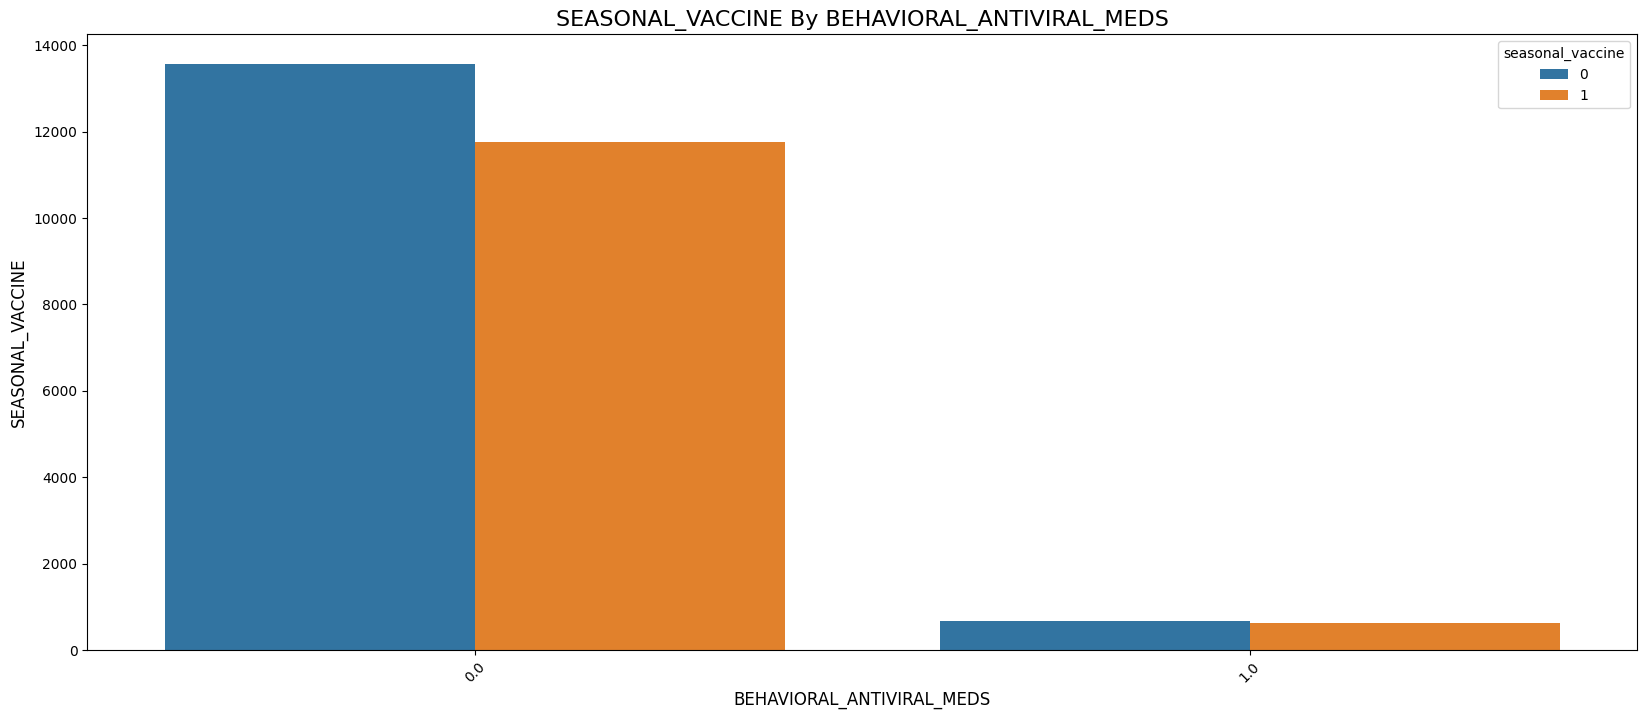

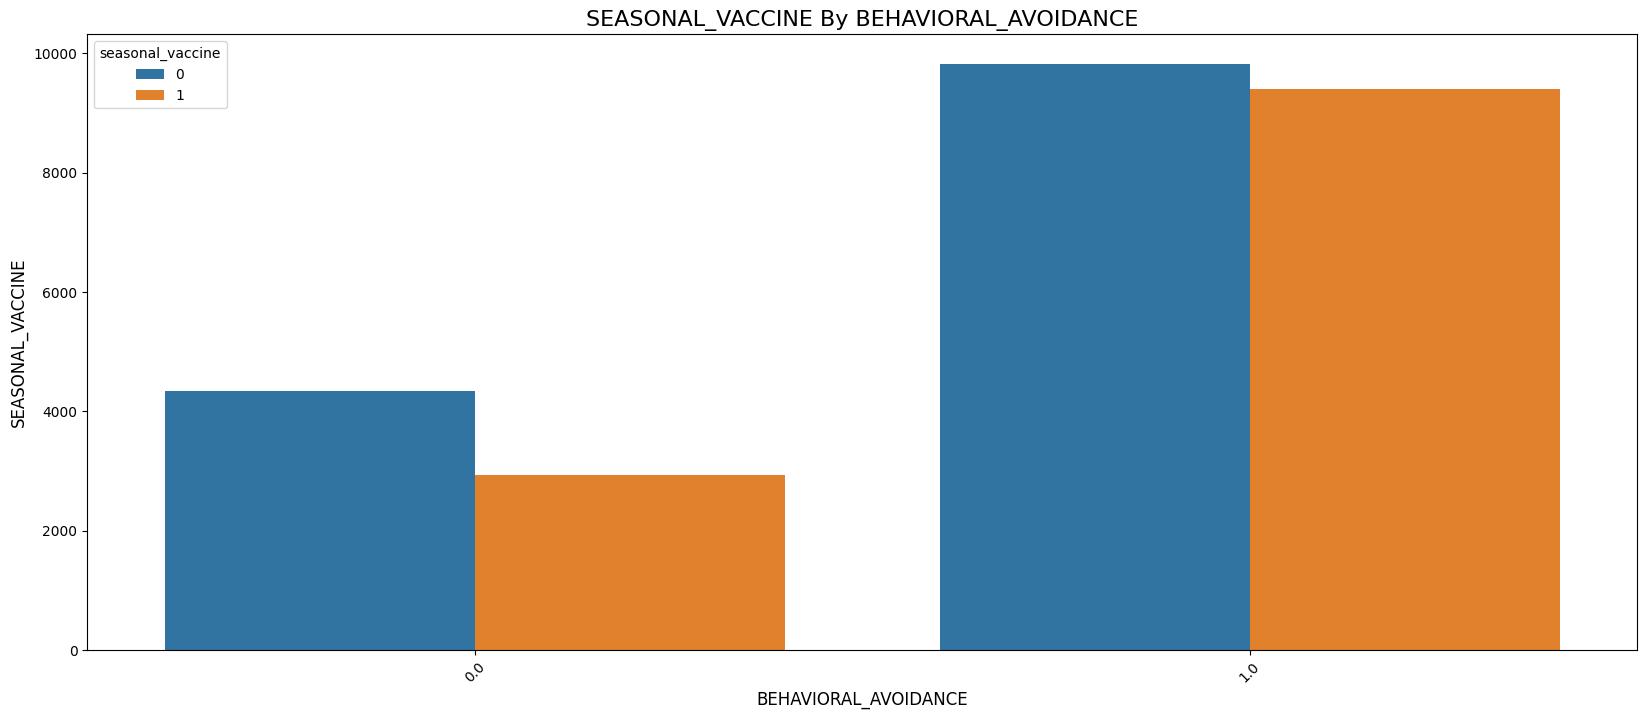

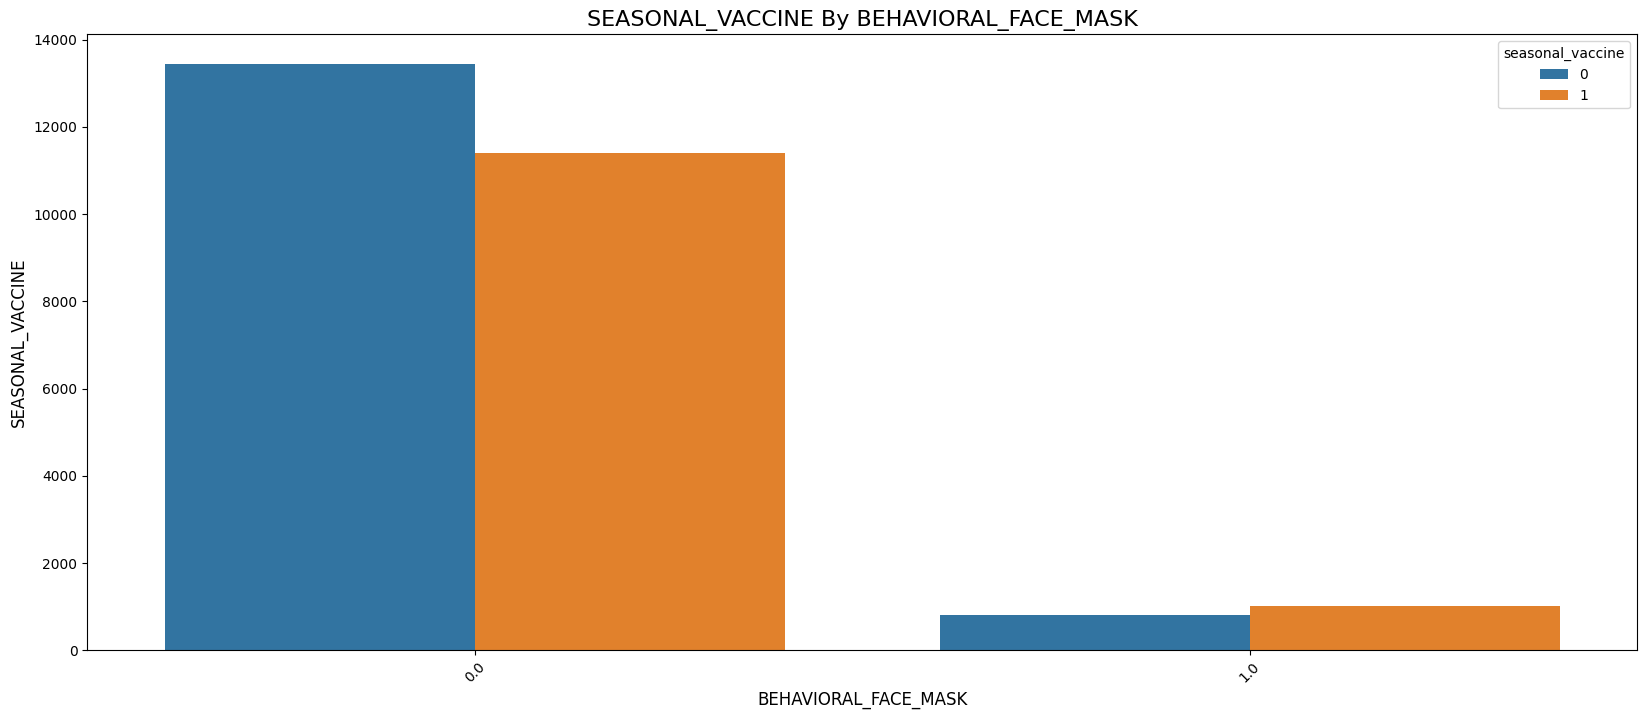

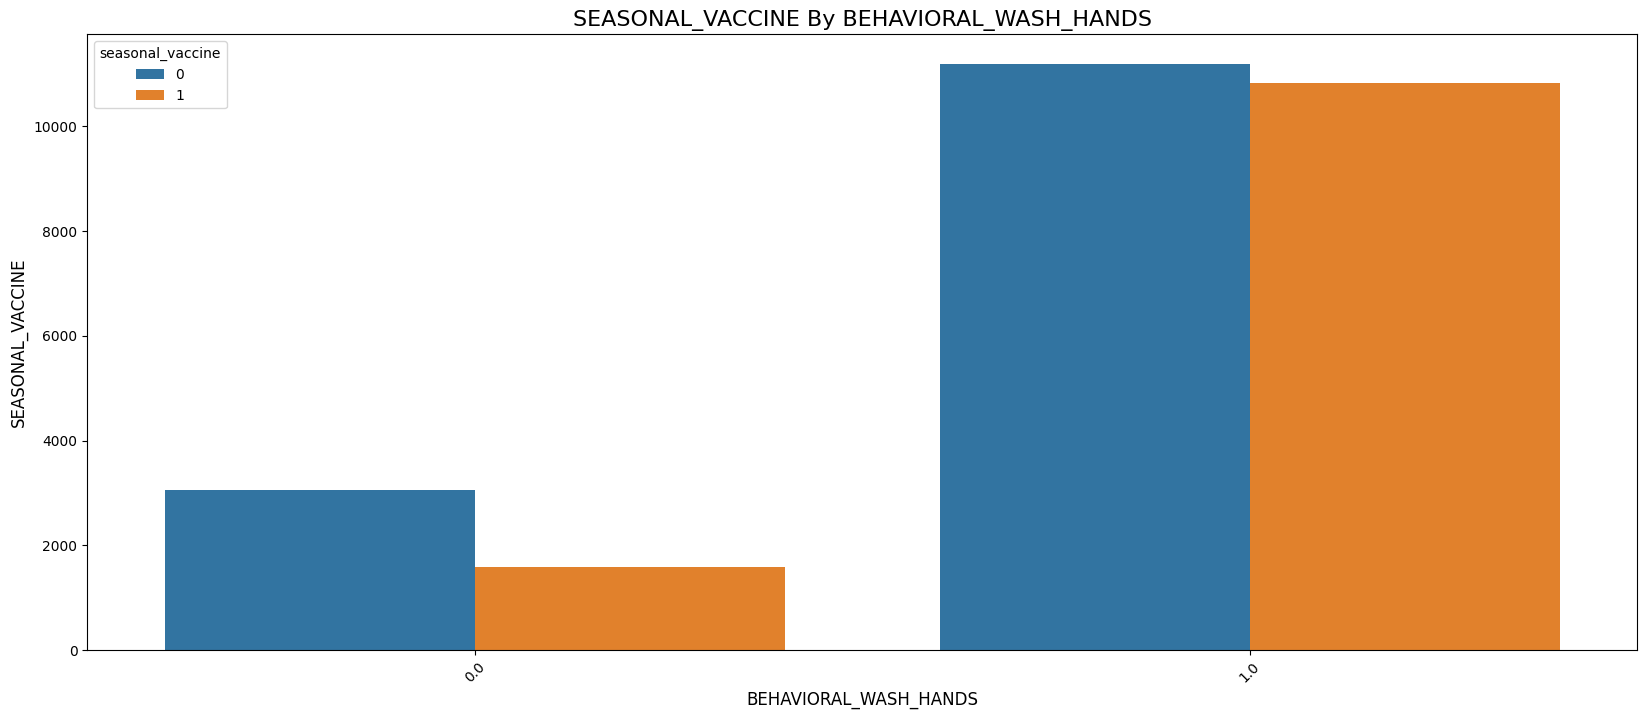

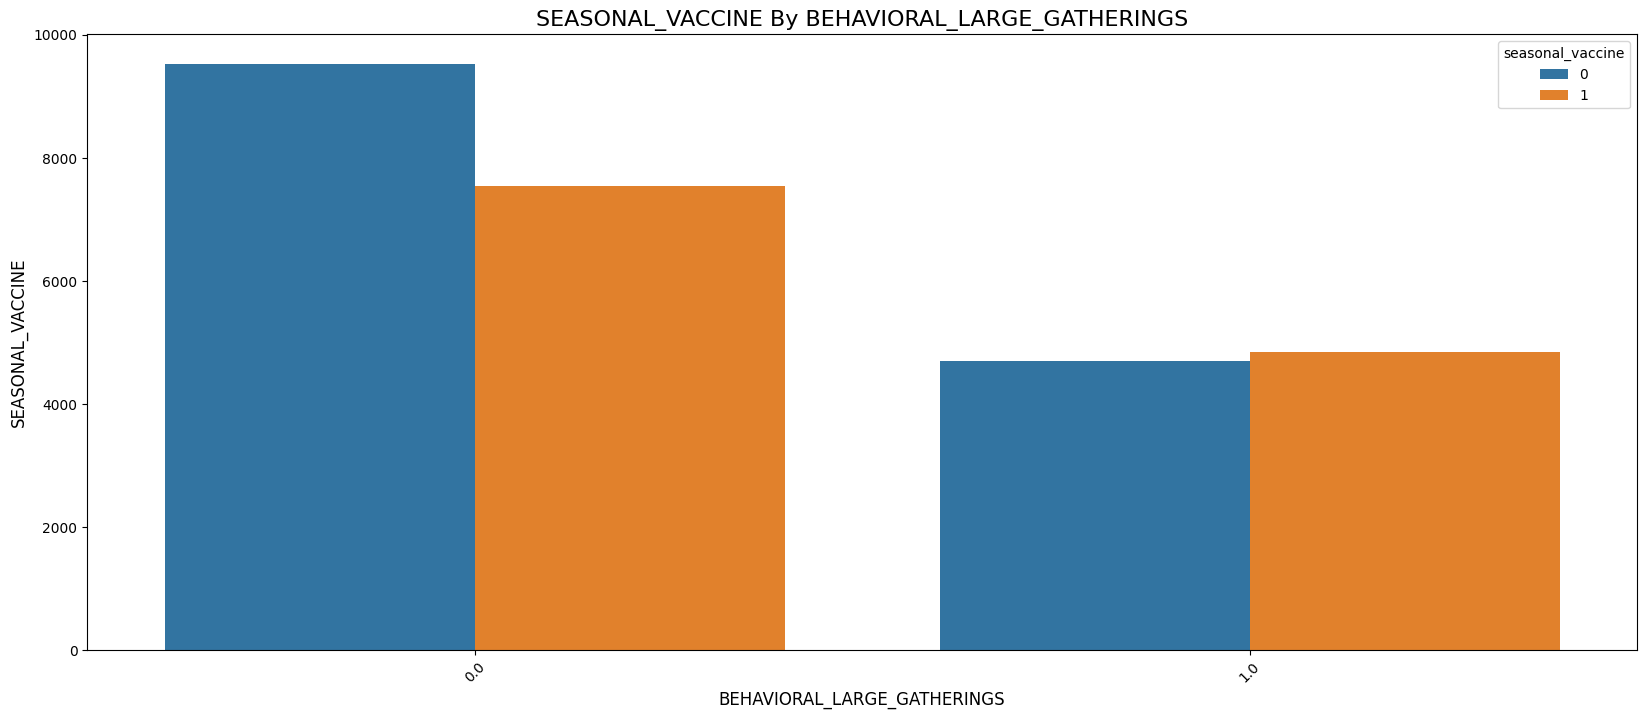

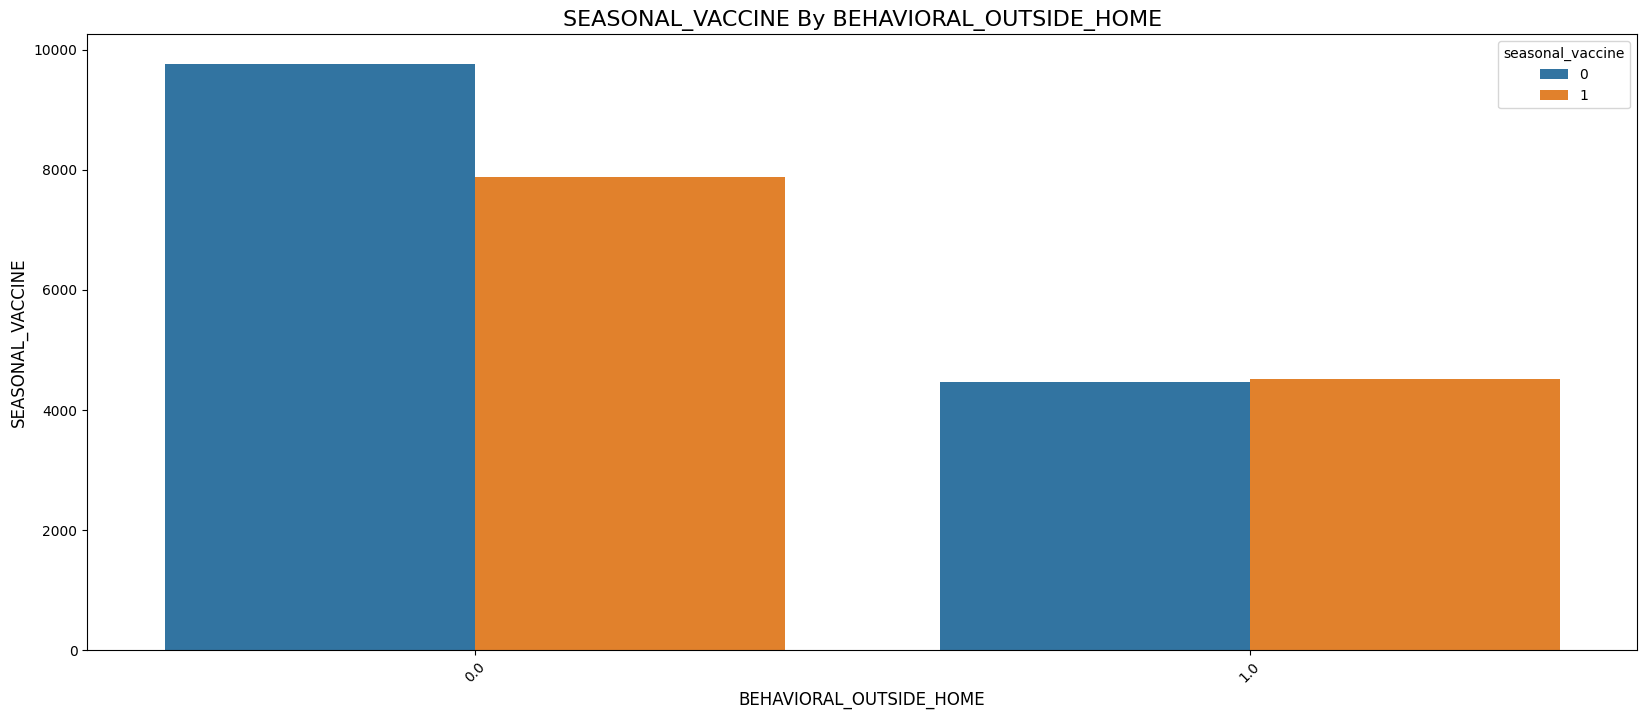

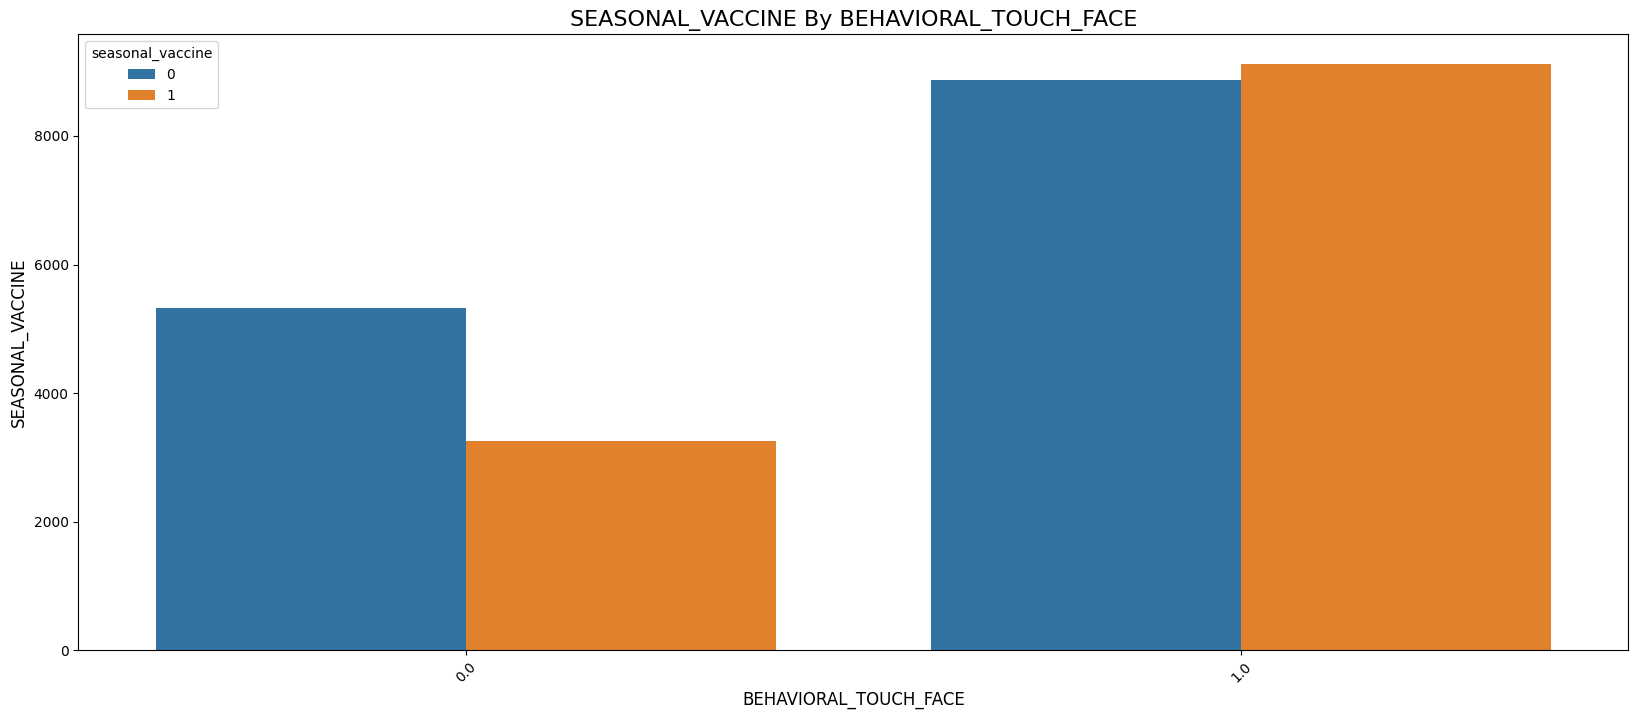

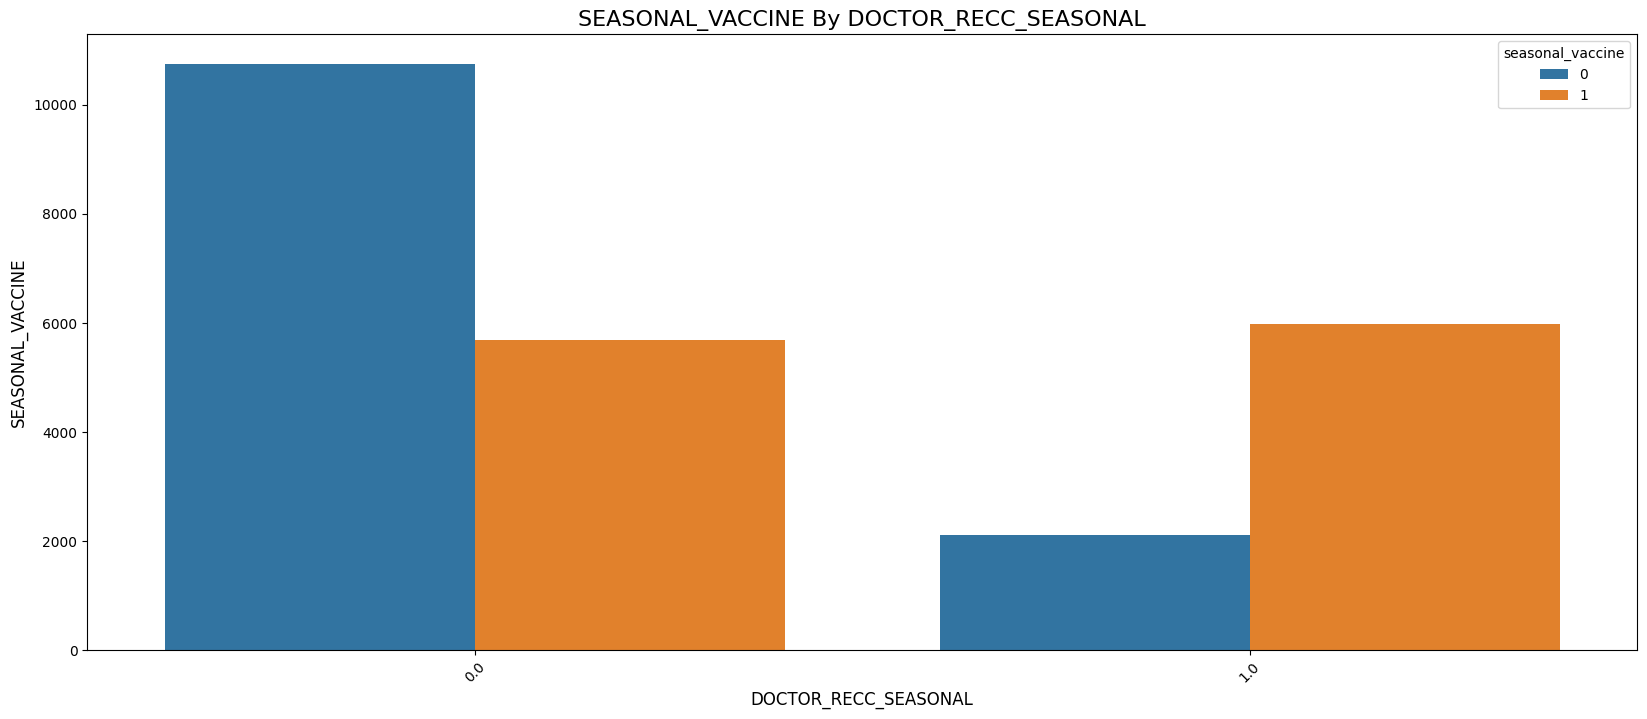

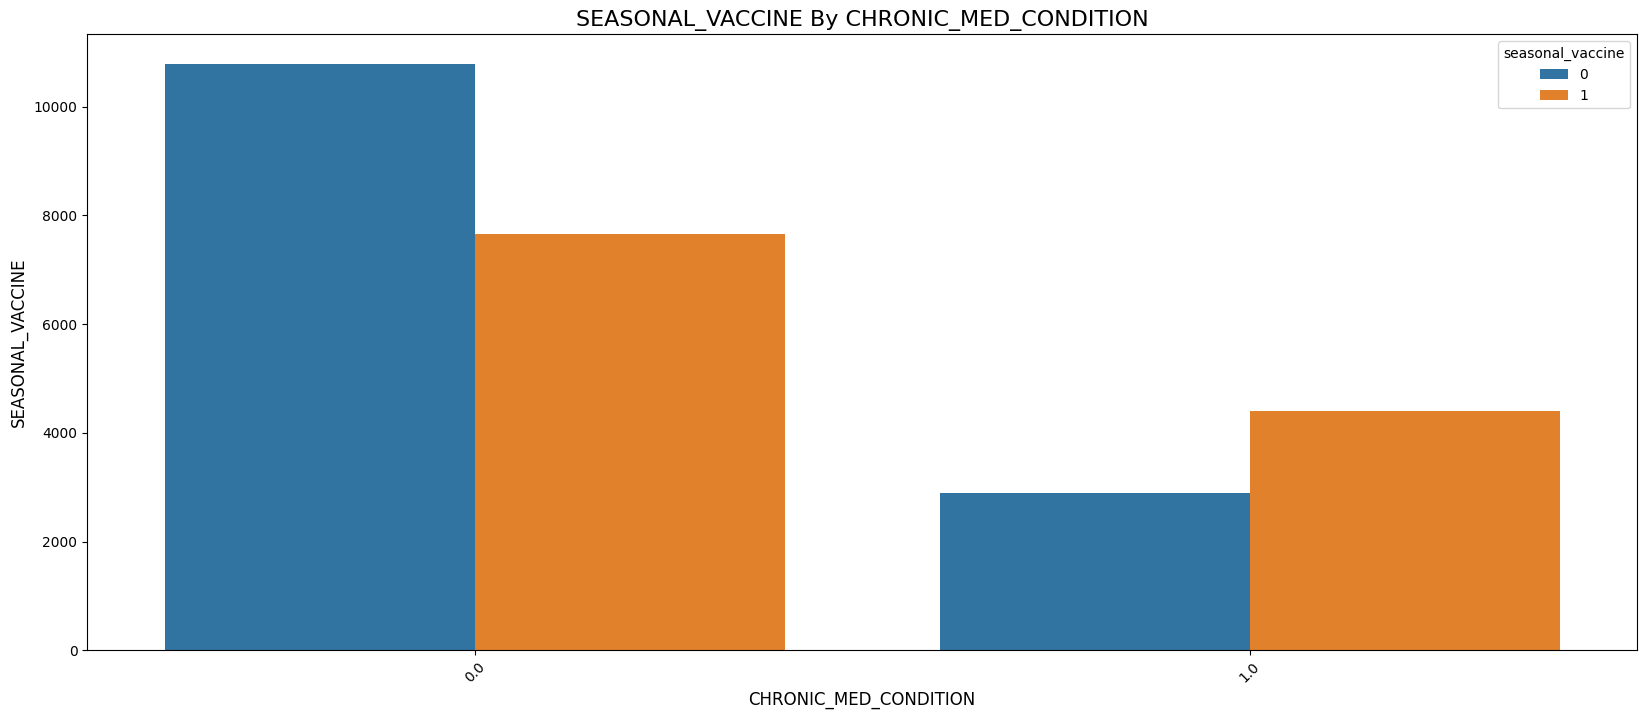

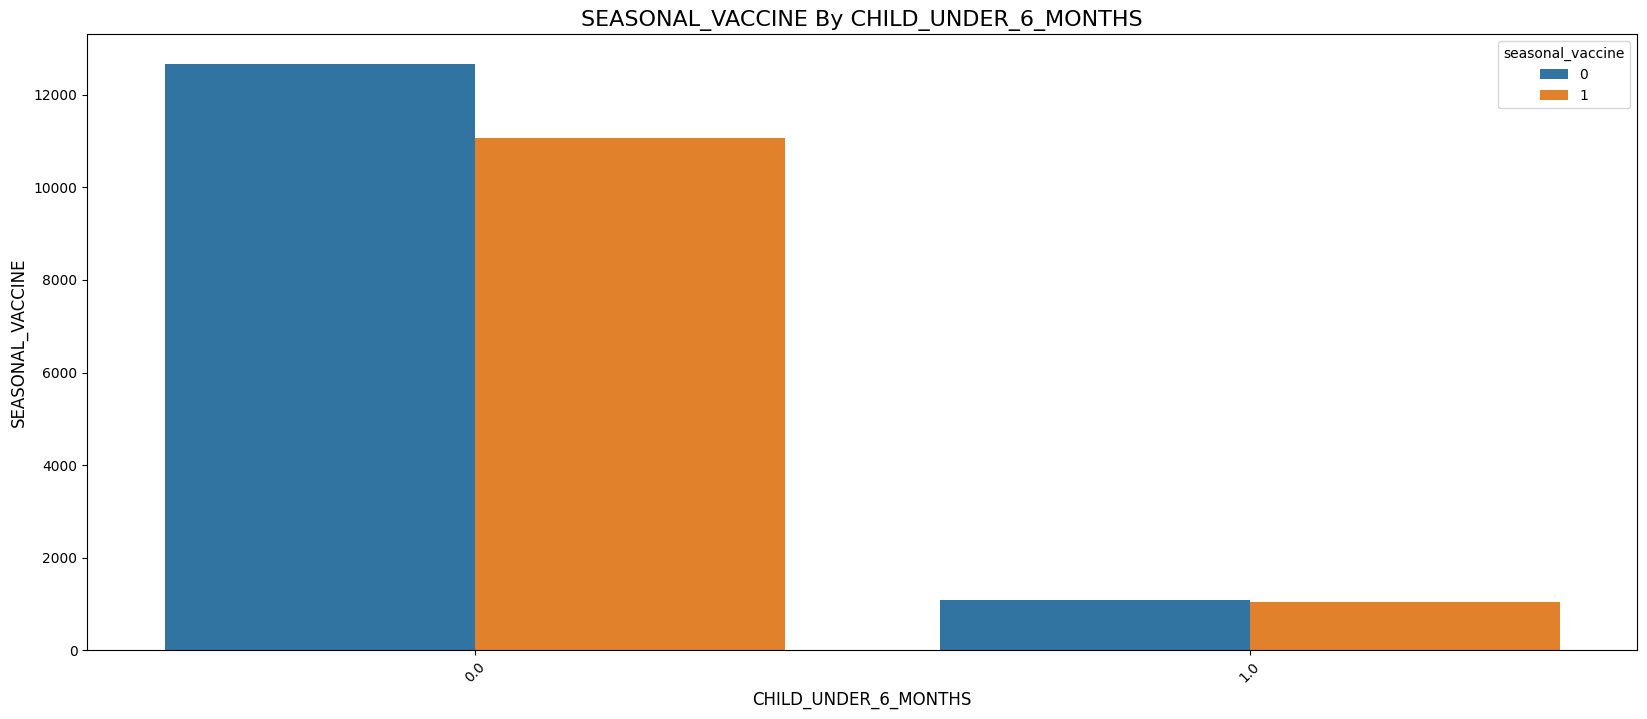

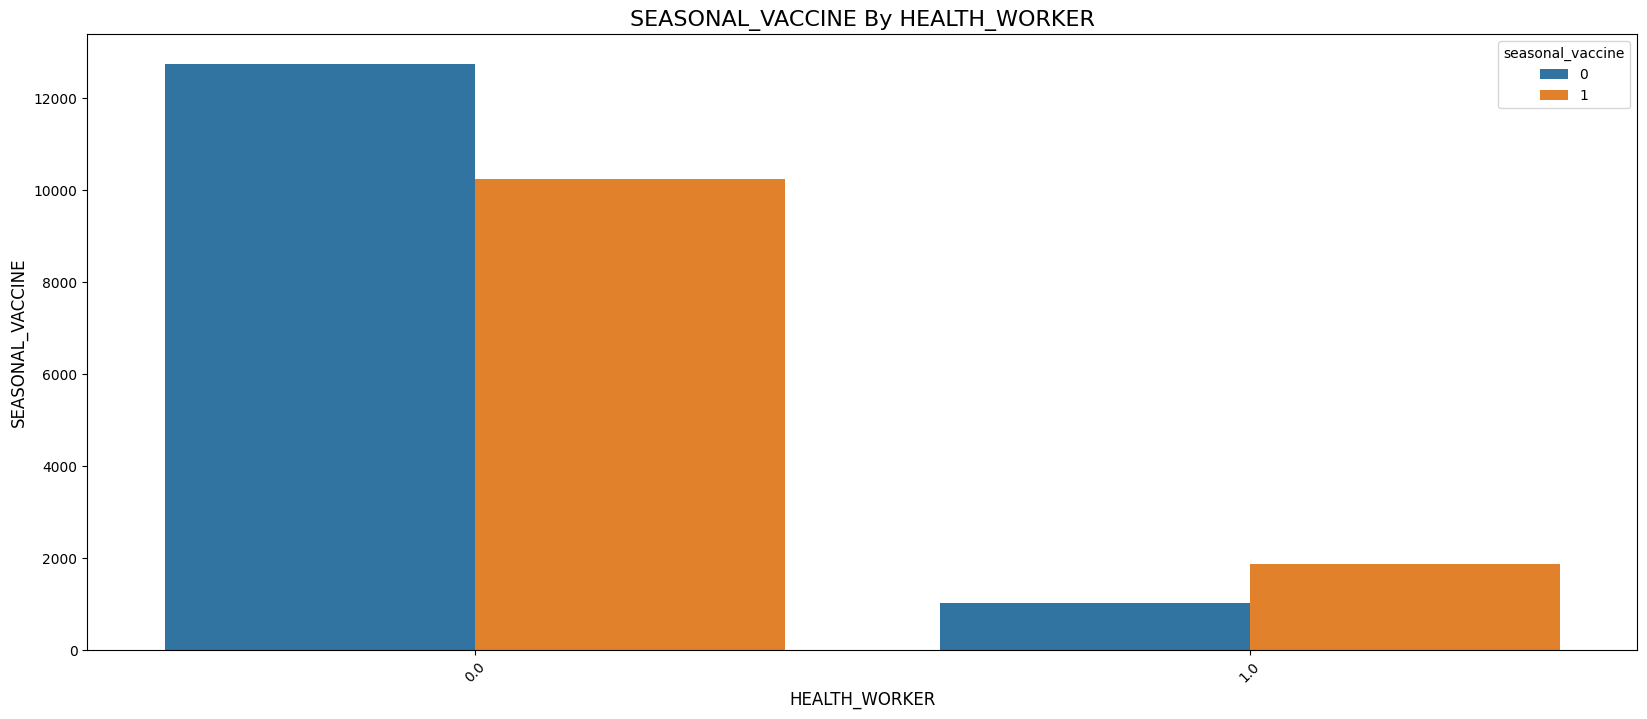

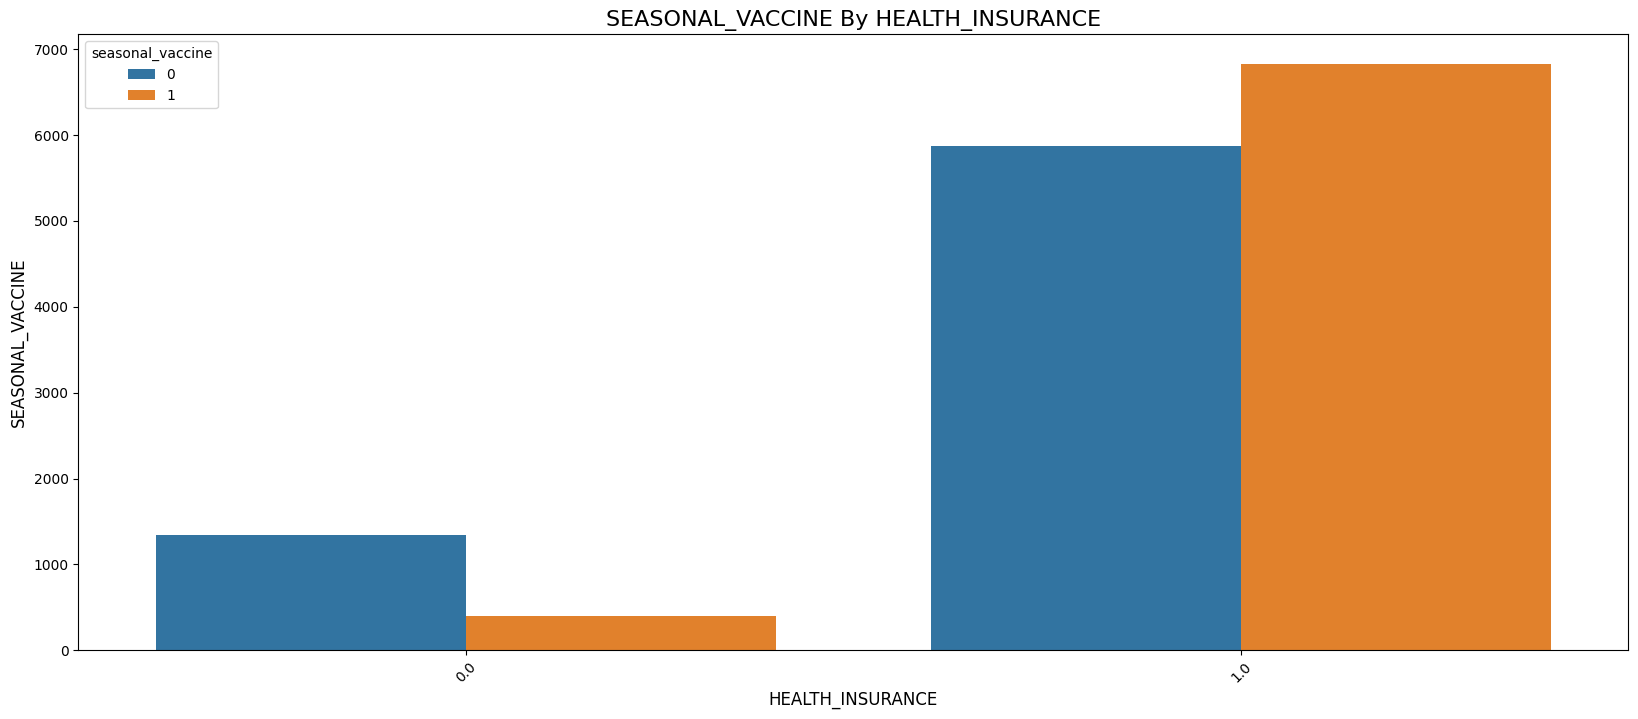

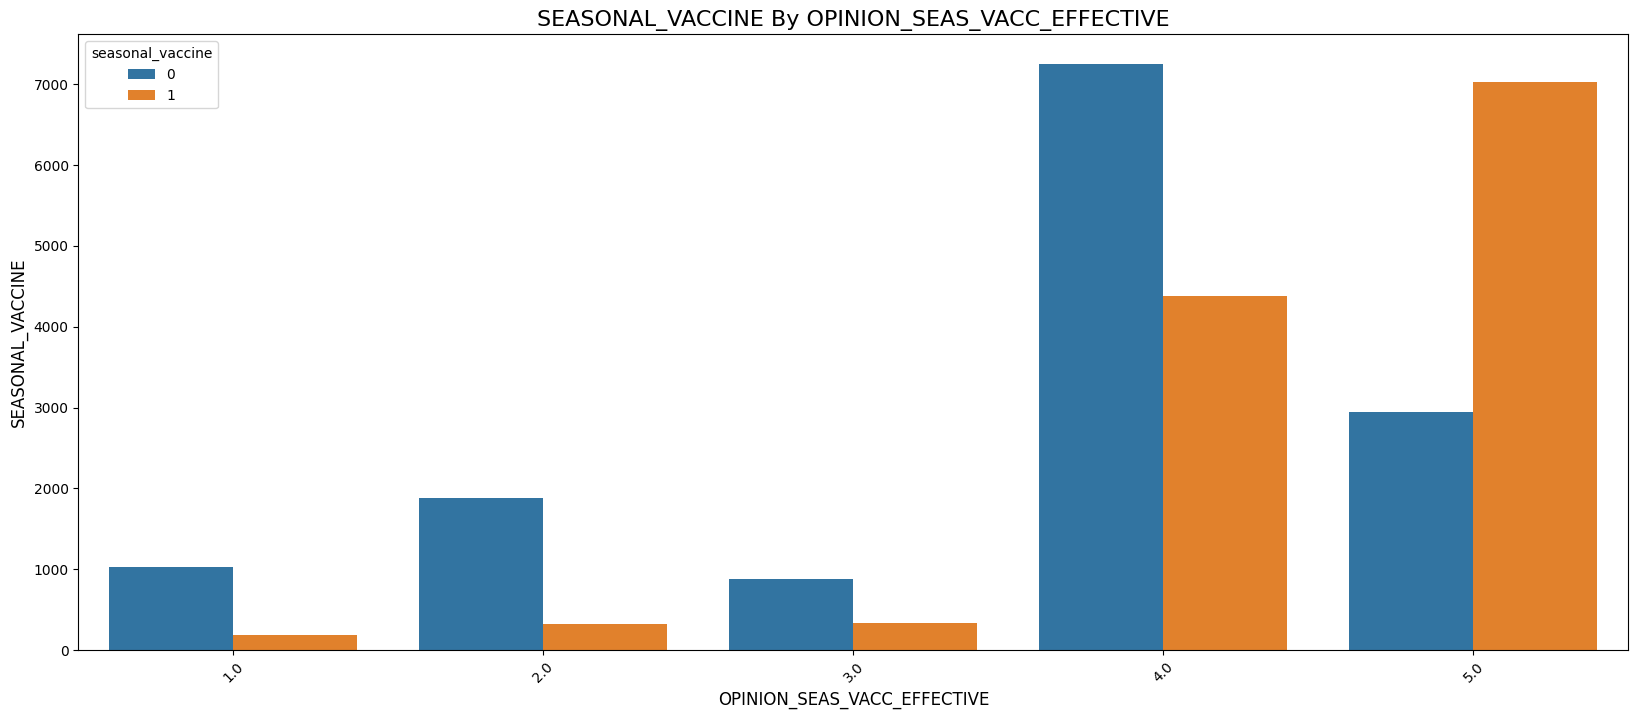

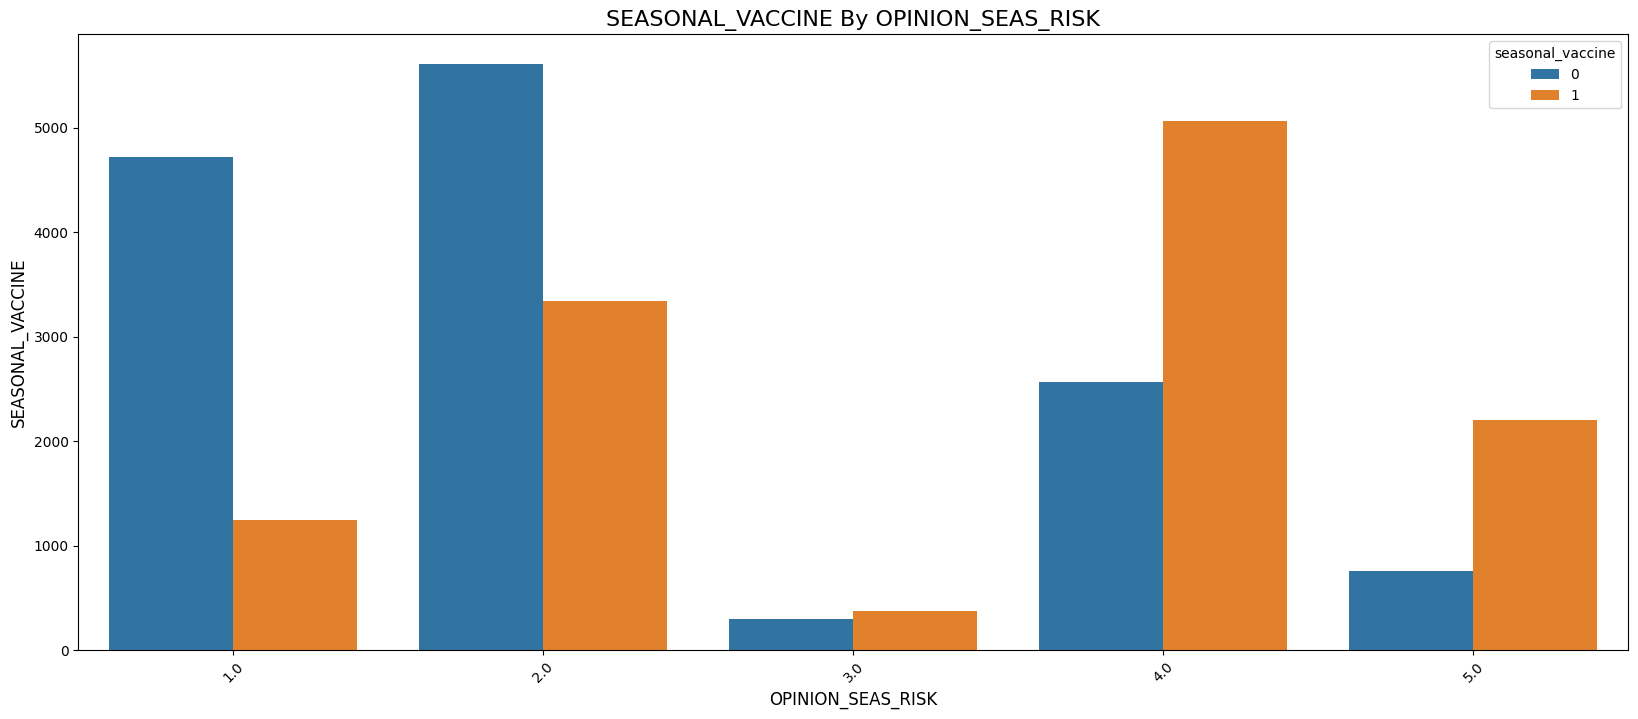

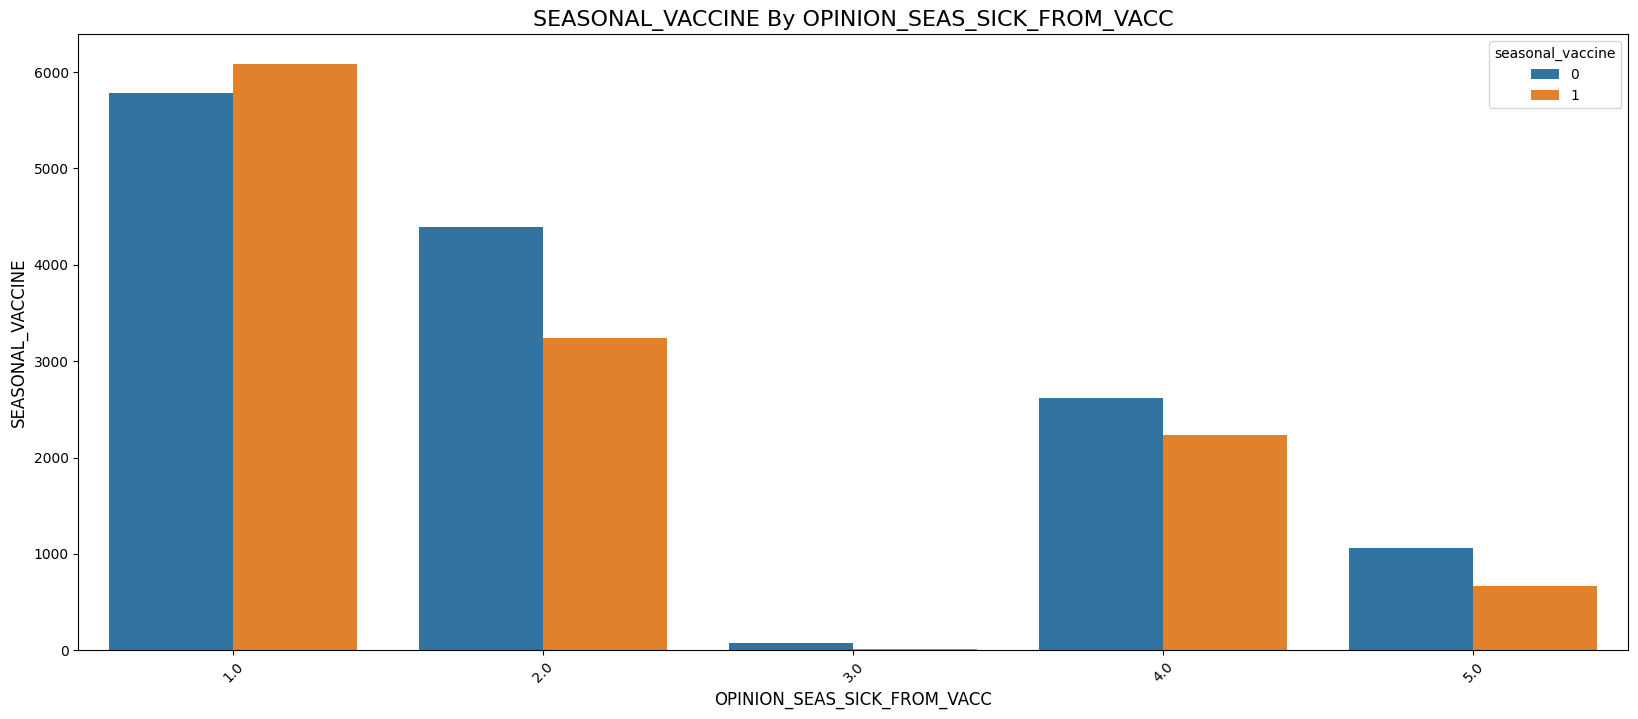

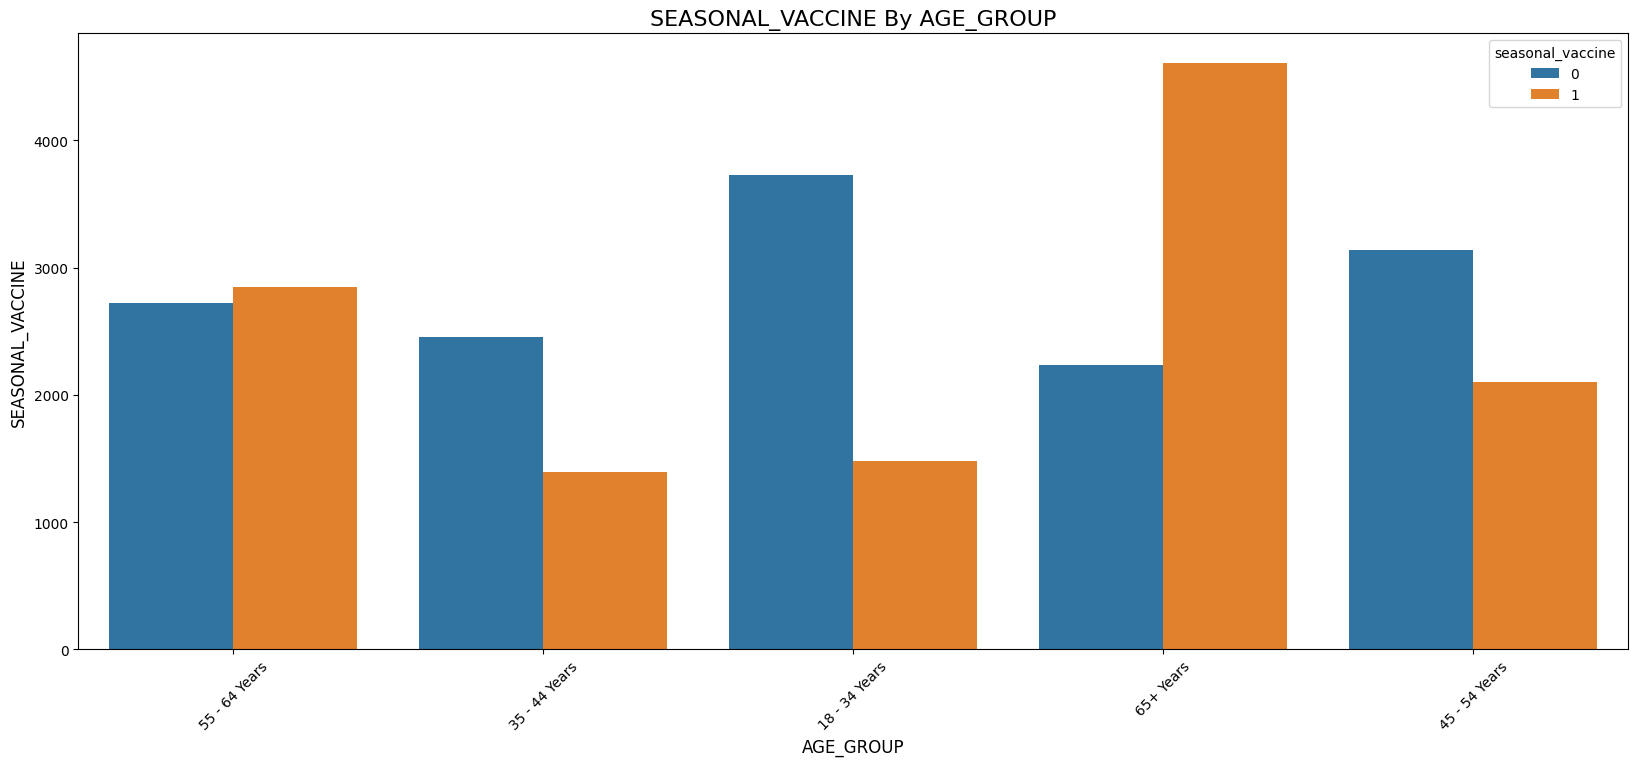

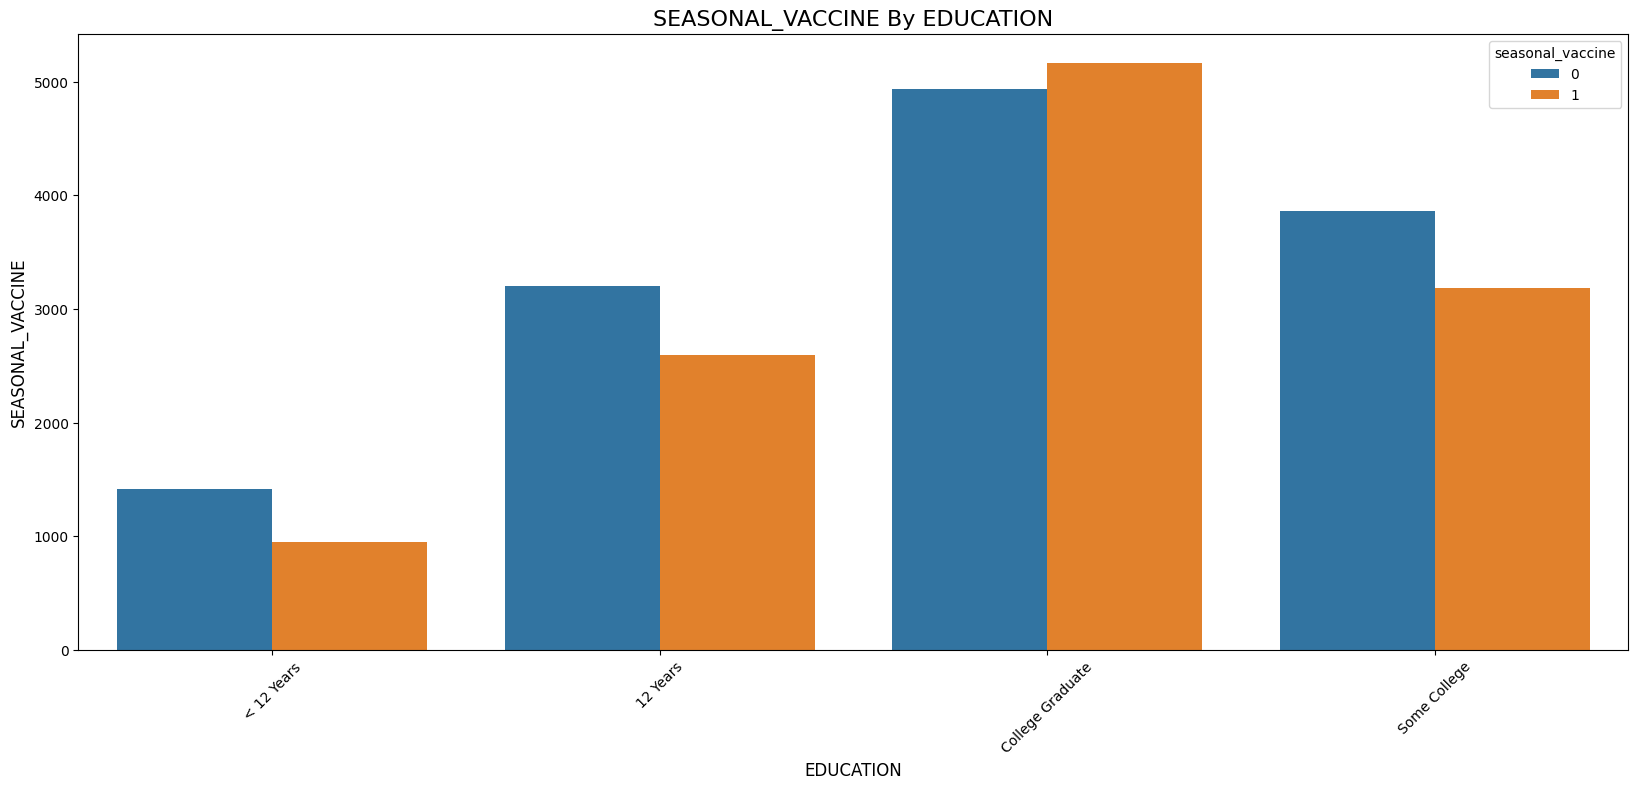

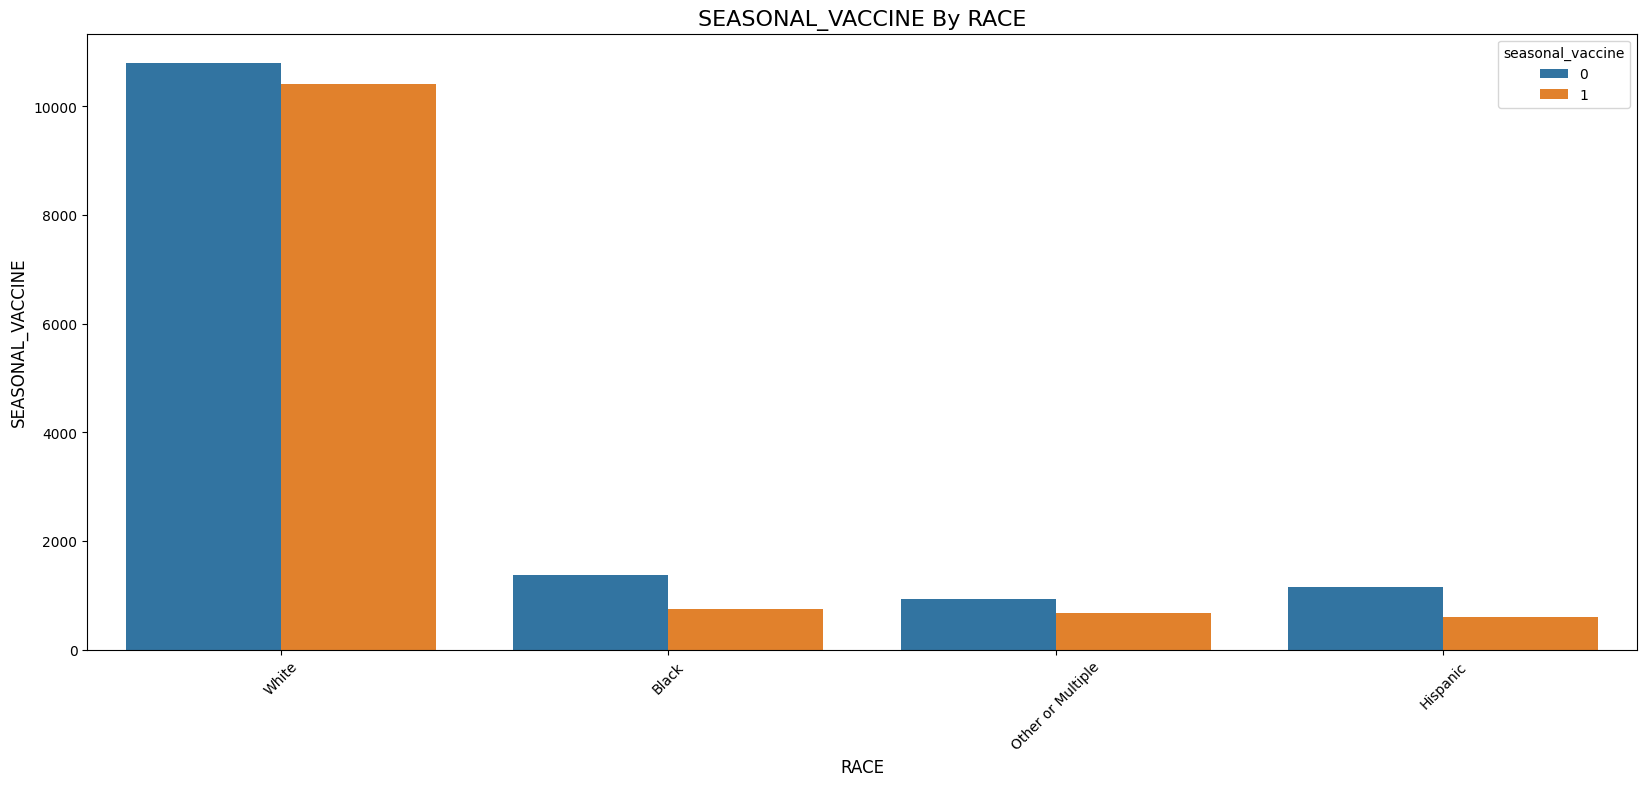

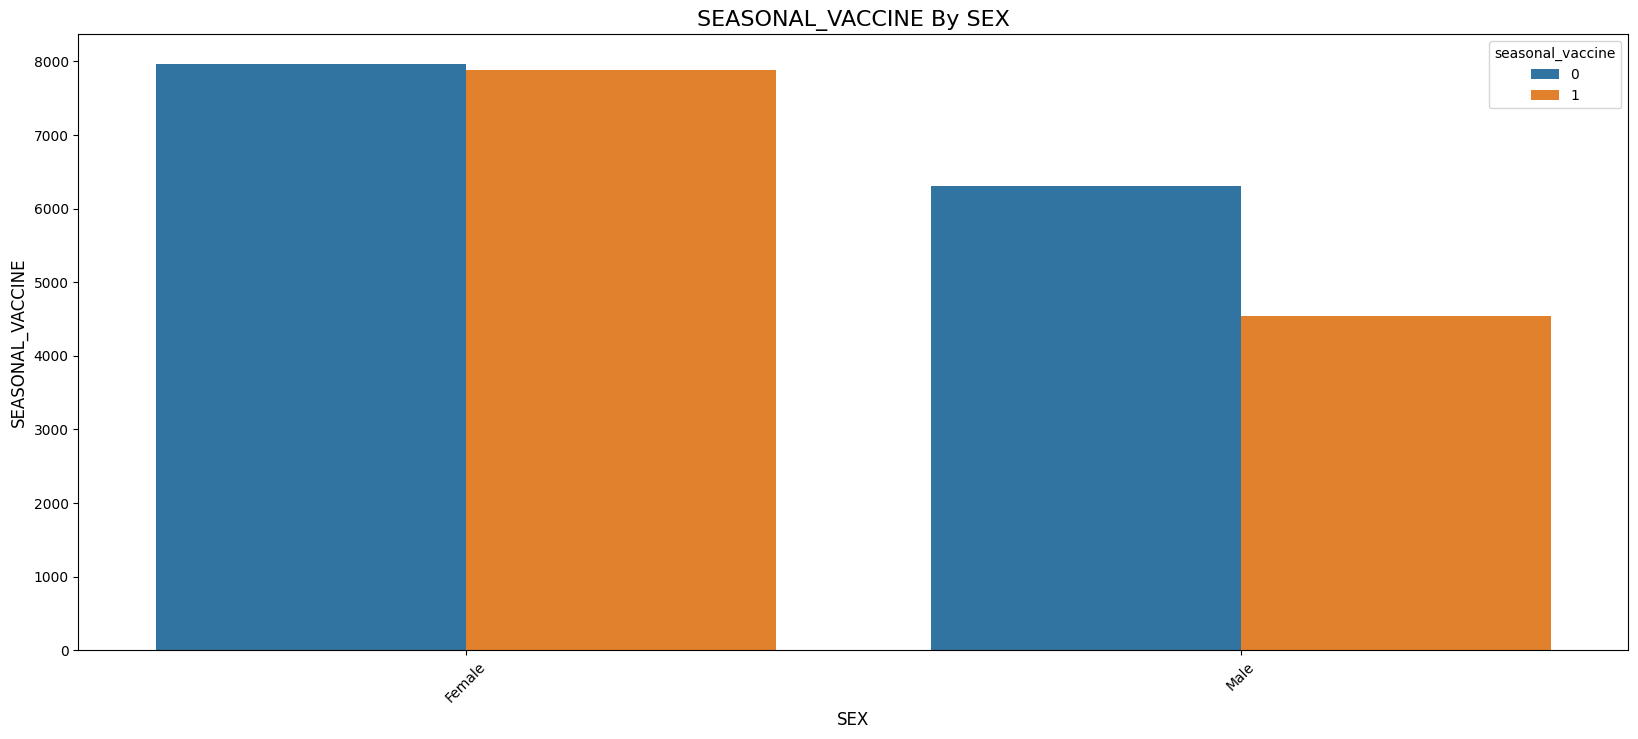

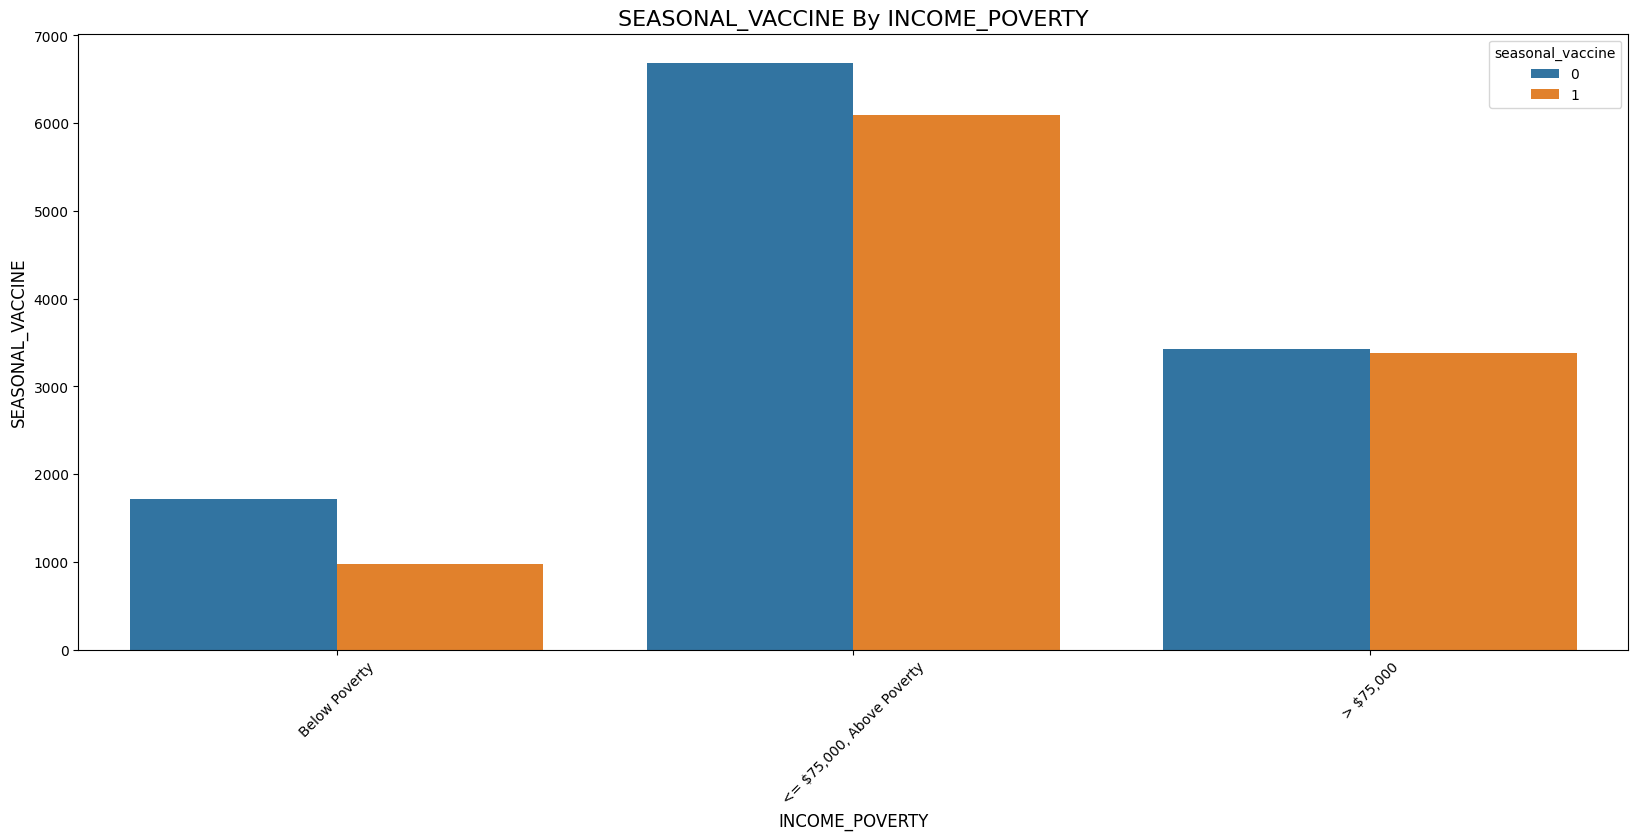

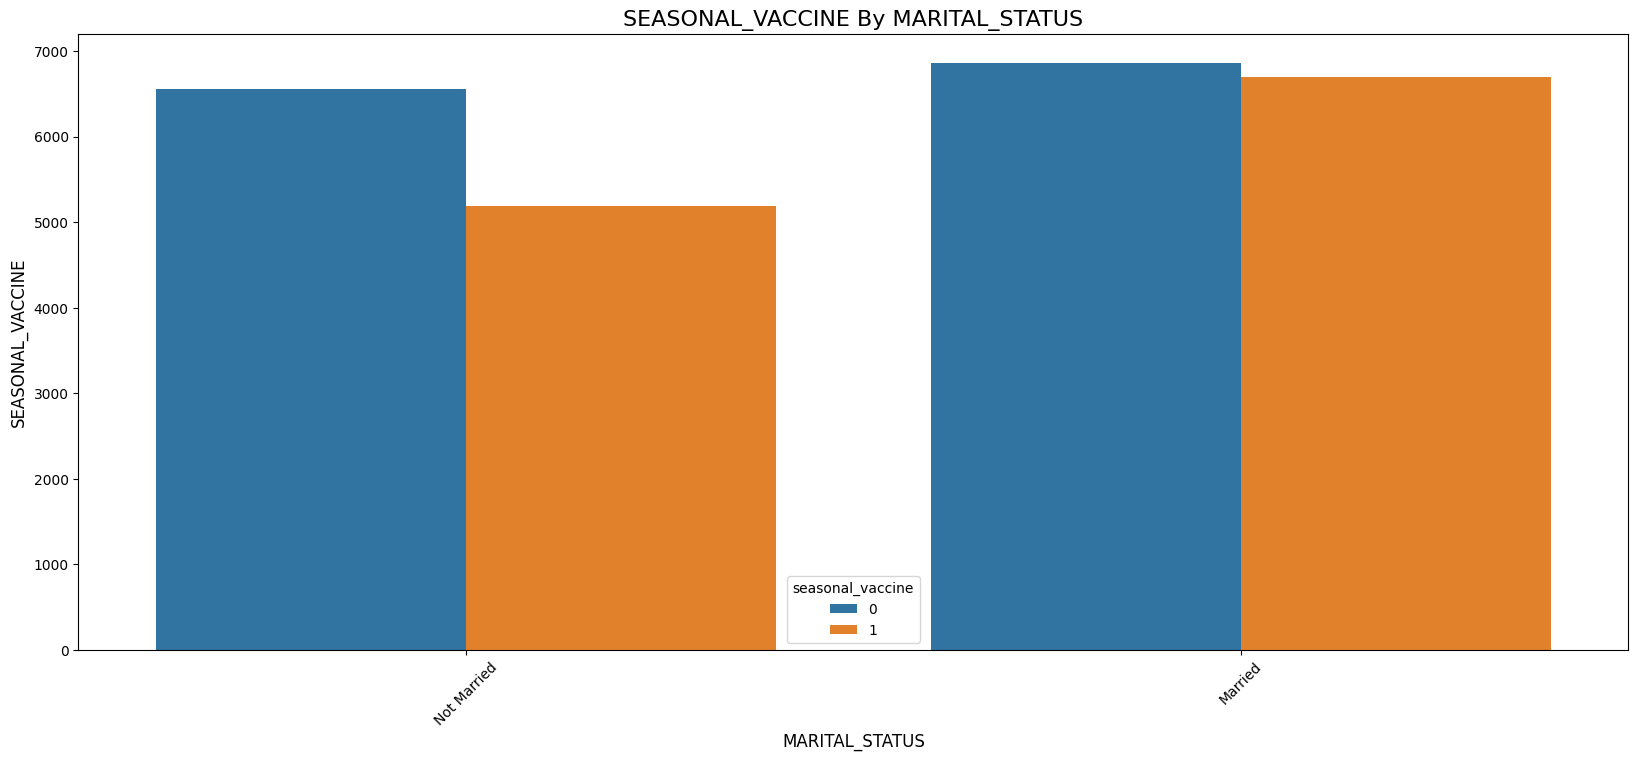

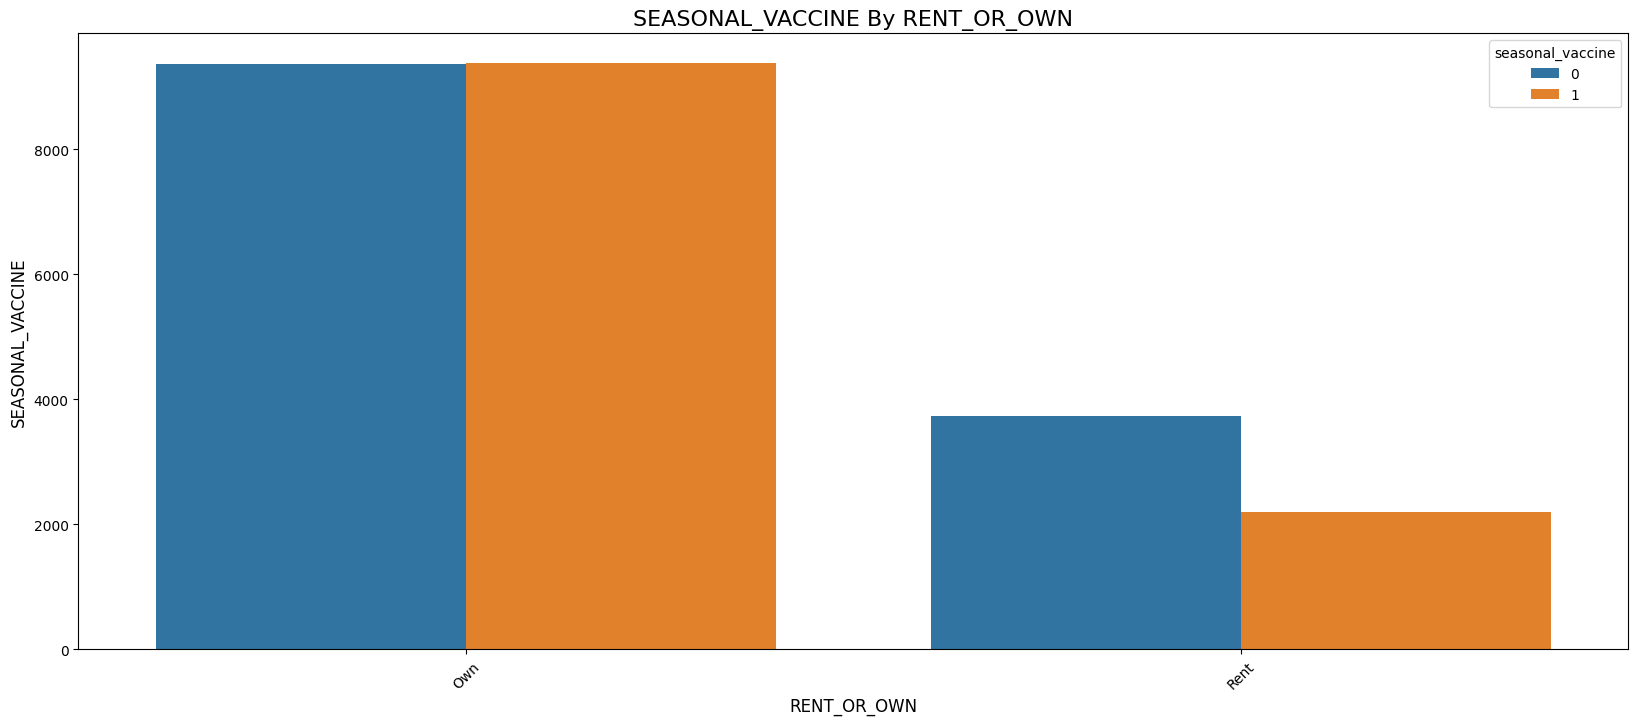

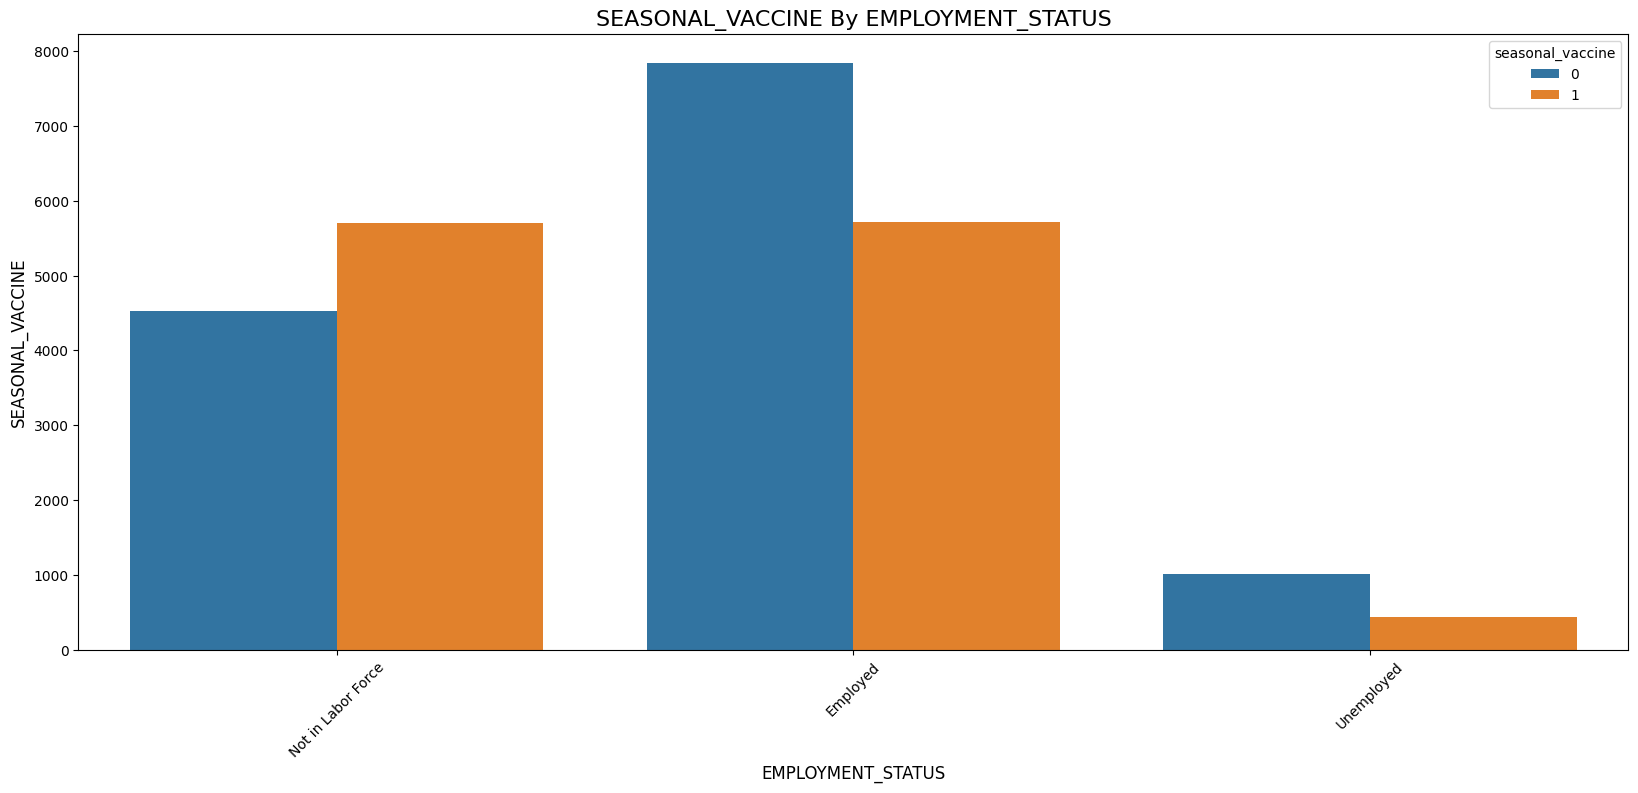

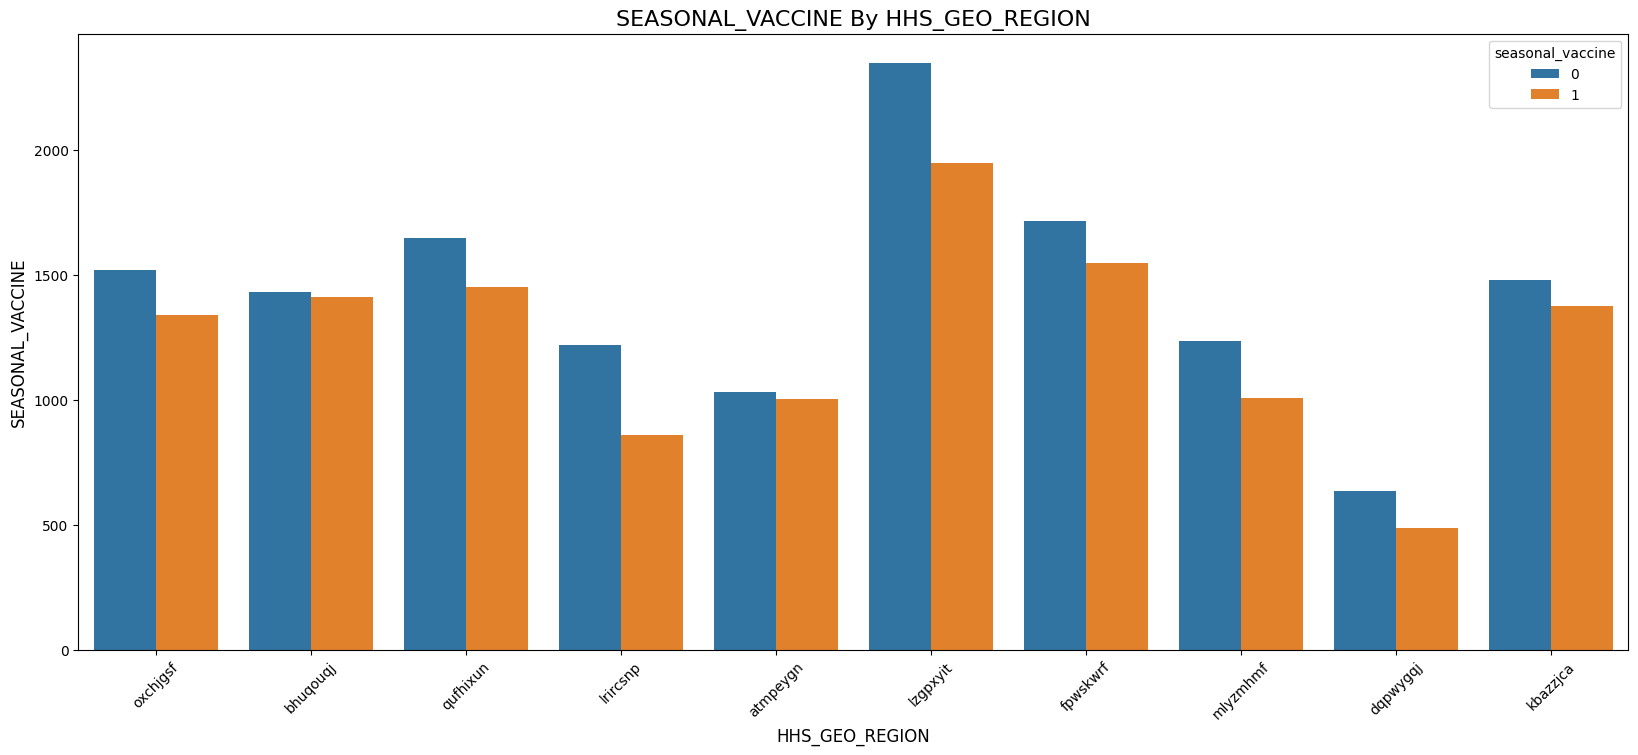

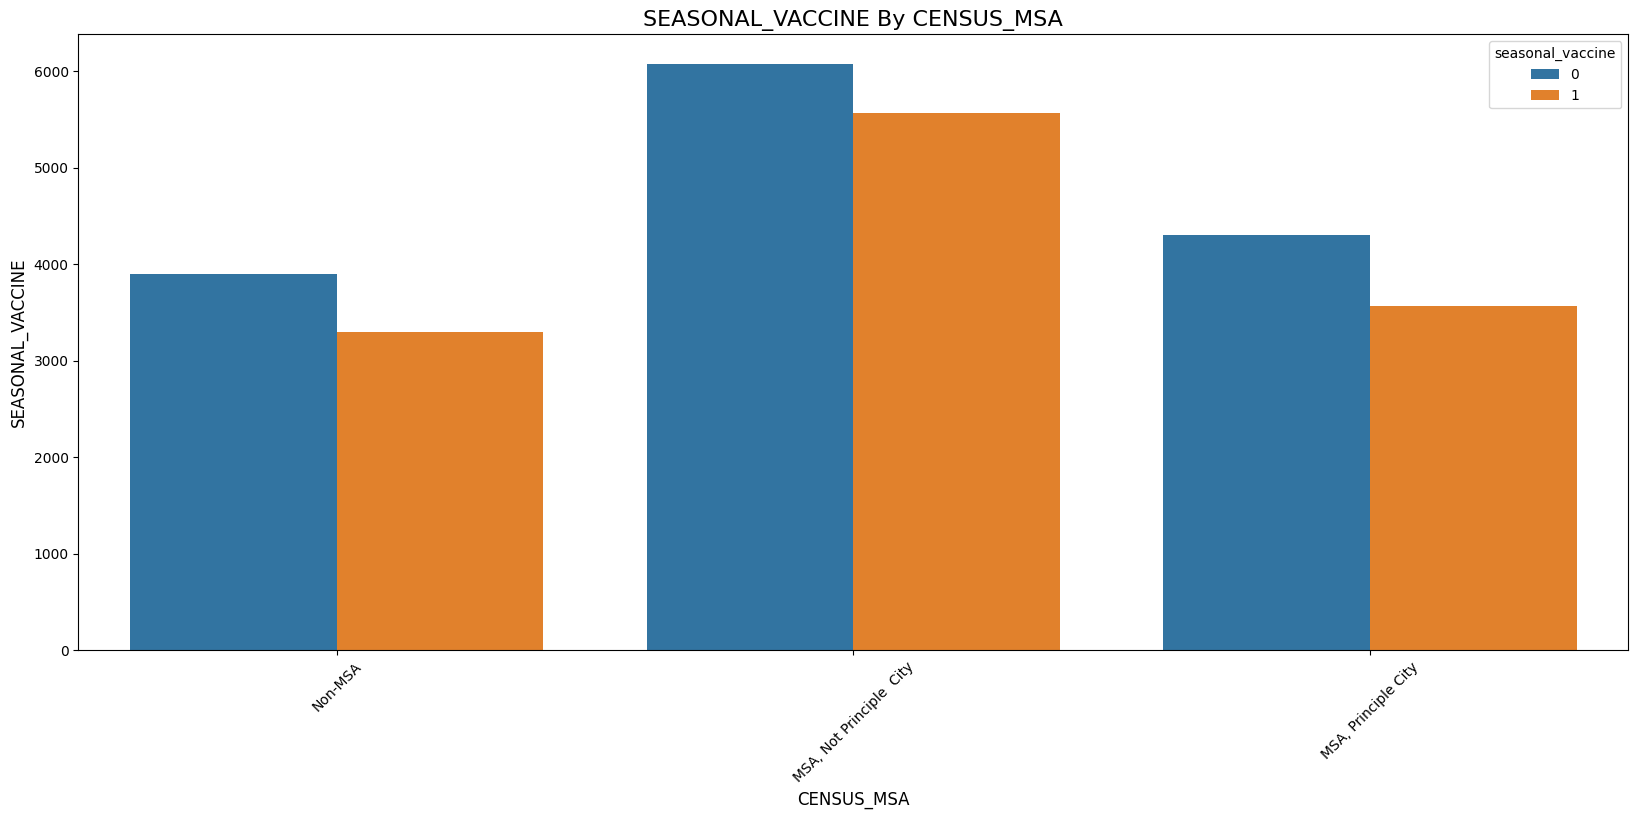

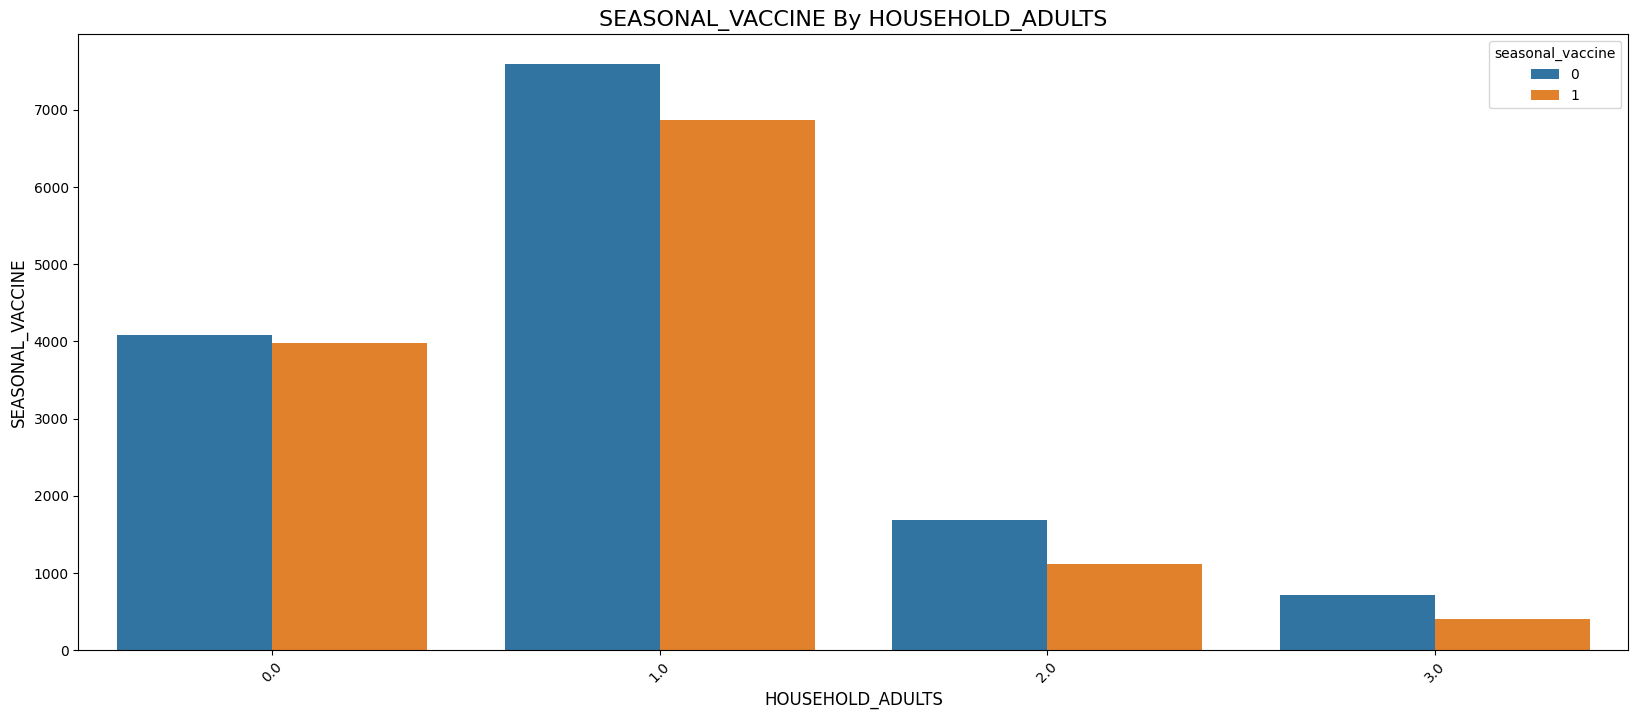

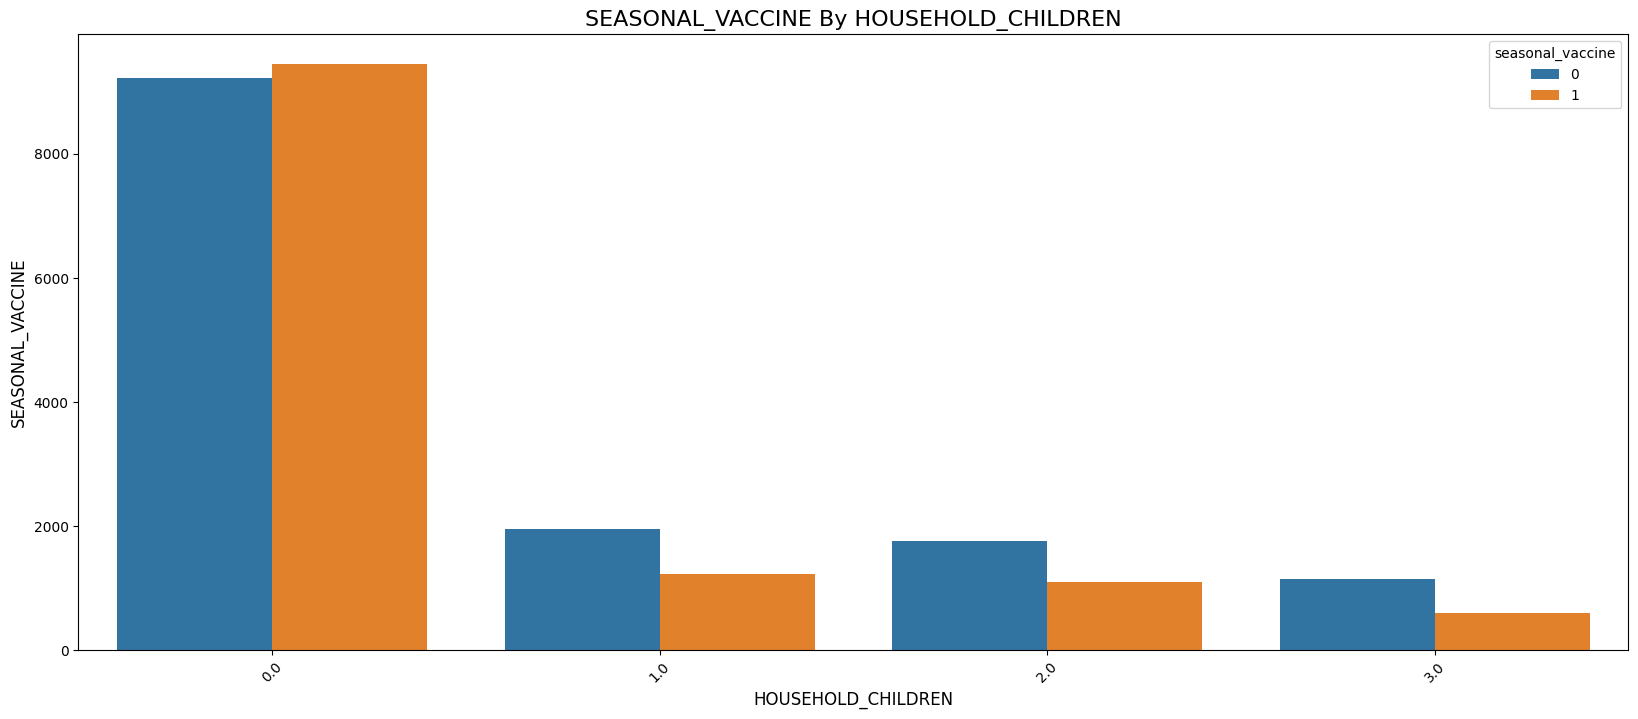

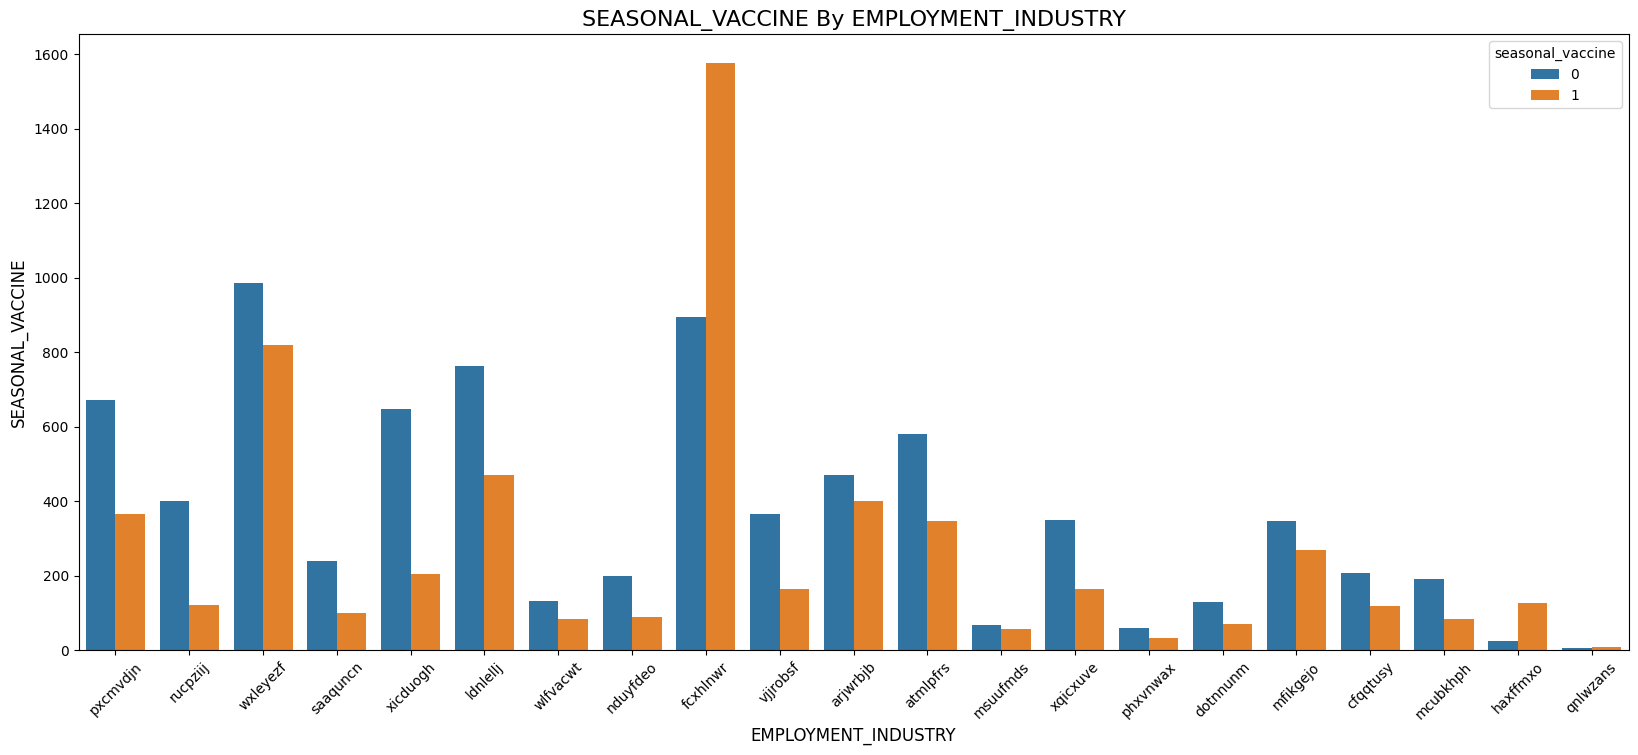

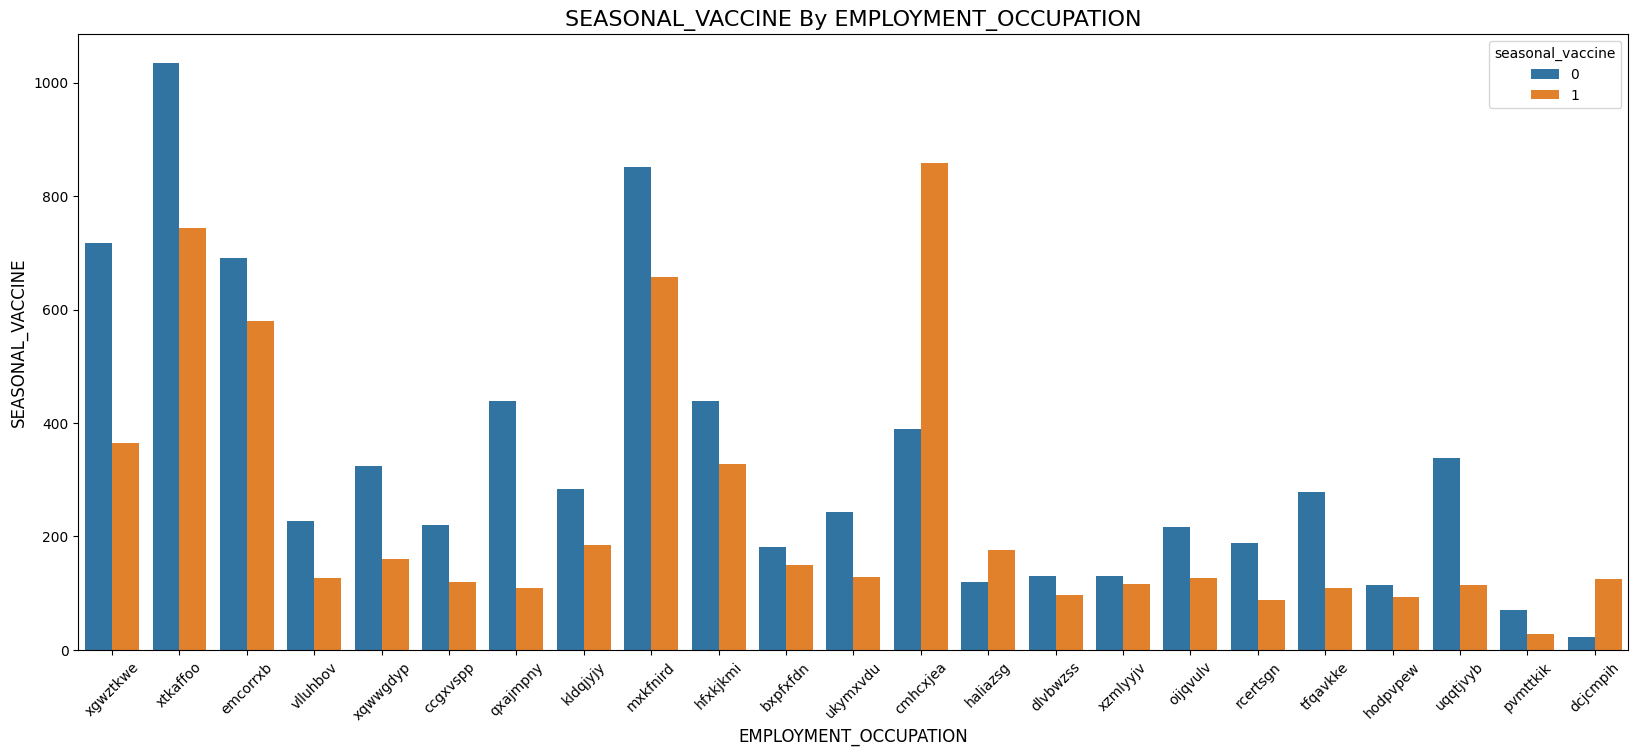

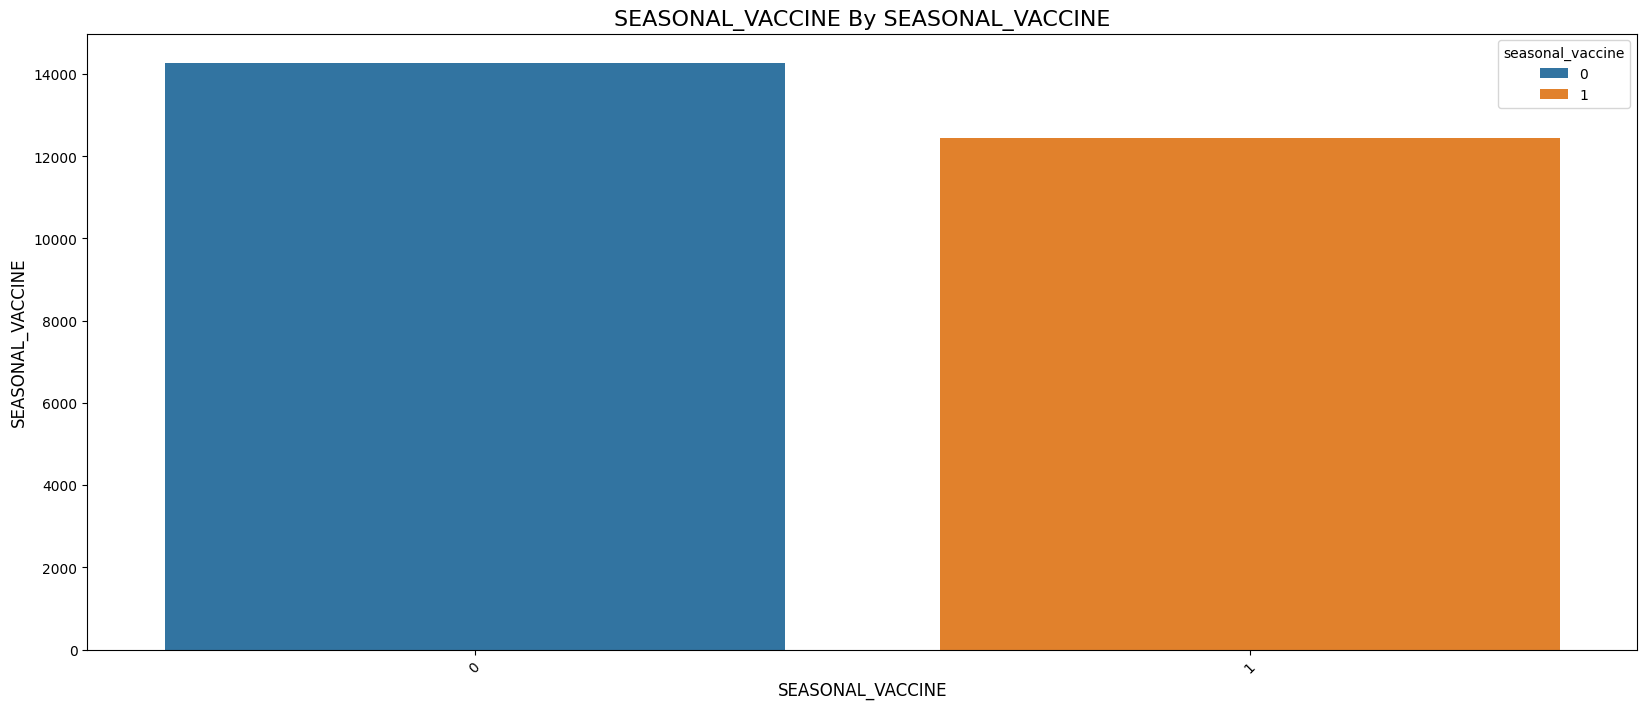

In [71]:
for col in df_seasonal_vaccine:
  if col!="respondent_id":
        plot_count(x=col, data=df_h1n1, title=f"{'SEASONAL_VACCINE'} By {col.upper()}", xlabel=col)

### **Conclusion for the Bi-Variate Analysis**


1. **behavioral_antiviral_meds**:
The count plot shows that individuals who take antiviral medications are more likely to get vaccinated against seasonal flu. This suggests that people who are proactive about their health are more likely to take preventive measures, including vaccination.

2. **behavioral_avoidance**:
The graph indicates that individuals who avoid close contact with people who have flu-like symptoms are more likely to get vaccinated. This suggests that people who are cautious about their health and take steps to avoid infection are more likely to get vaccinated.

3. **behavioral_face_mask**:
The plot shows that individuals who wear face masks are more likely to get vaccinated. This suggests that people who take precautions to prevent the spread of illness are more likely to take preventive measures, including vaccination.

4. **behavioral_wash_hands**:
The graph indicates that individuals who frequently wash their hands are more likely to get vaccinated. This suggests that people who prioritize hygiene and take steps to prevent the spread of illness are more likely to get vaccinated.

5. **behavioral_large_gatherings**:
The plot shows that individuals who avoid large gatherings are more likely to get vaccinated. This suggests that people who are cautious about their health and take steps to avoid infection are more likely to get vaccinated.

6. **behavioral_outside_home**:
The graph indicates that individuals who spend more time outside their homes are less likely to get vaccinated. This suggests that people who are more mobile and interact with others more frequently may be less likely to prioritize vaccination.

7. **behavioral_touch_face**:
The plot shows that individuals who touch their faces frequently are less likely to get vaccinated. This suggests that people who have habits that increase their risk of infection may be less likely to prioritize vaccination.

8. **doctor_recc_seasonal**:
The graph indicates that individuals who receive a doctor's recommendation for seasonal vaccination are more likely to get vaccinated. This suggests that healthcare provider recommendations play a significant role in influencing vaccination decisions.

9. **chronic_med_condition**:
The plot shows that individuals with chronic medical conditions are more likely to get vaccinated. This suggests that people with underlying health conditions may be more motivated to take preventive measures to protect their health.

10. **child_under_6_months**:
The graph indicates that individuals with children under 6 months old are more likely to get vaccinated. This suggests that parents of young children may be more motivated to protect their children's health and take preventive measures.

11. **health_worker**:
The plot shows that healthcare workers are more likely to get vaccinated. This suggests that individuals in the healthcare industry may be more aware of the importance of vaccination and take preventive measures to protect themselves and their patients.

12. **health_insurance**:
The graph indicates that individuals with health insurance are more likely to get vaccinated. This suggests that access to healthcare and financial resources may play a role in influencing vaccination decisions.

13. **opinion_seas_vacc_effective**:
The plot shows that individuals who believe the seasonal vaccine is effective are more likely to get vaccinated. This suggests that people's perceptions of vaccine effectiveness play a significant role in influencing their vaccination decisions.

14. **opinion_seas_risk**:
The graph indicates that individuals who perceive a higher risk of seasonal flu are more likely to get vaccinated. This suggests that people's risk perceptions play a role in influencing their vaccination decisions.

15. **opinion_seas_sick_from_vacc**:
The plot shows that individuals who believe they can get sick from the vaccine are less likely to get vaccinated. This suggests that misconceptions about vaccine safety may deter people from getting vaccinated.

16. **age_group**:
The graph indicates that older adults are more likely to get vaccinated. This suggests that age may play a role in influencing vaccination decisions, with older adults being more motivated to protect their health.

17. **education**:
The plot shows that individuals with higher levels of education are more likely to get vaccinated. This suggests that education may play a role in influencing vaccination decisions, with more educated individuals being more aware of the importance of vaccination.

18. **race**:
The graph indicates that there are racial disparities in vaccination rates, with some racial groups being less likely to get vaccinated. This suggests that cultural and socioeconomic factors may influence vaccination decisions.

19. **sex**:
The plot shows that females are more likely to get vaccinated than males. This suggests that gender may play a role in influencing vaccination decisions.

20. **income_poverty**:
The graph indicates that individuals with higher incomes are more likely to get vaccinated. This suggests that socioeconomic factors, including access to healthcare and financial resources, may influence vaccination decisions.

21. **marital_status**:
The plot shows that married individuals are more likely to get vaccinated. This suggests that marital status may play a role in influencing vaccination decisions, with married individuals being more motivated to protect their health.

22. **rent_or_own**:
The graph indicates that homeowners are more likely to get vaccinated. This suggests that socioeconomic factors, including housing status, may influence vaccination decisions.

23. **employment_status**:
The plot shows that employed individuals are more likely to get vaccinated. This suggests that employment status may play a role in influencing vaccination decisions, with employed individuals being more motivated to protect their health.

24. **hhs_geo_region**:
The graph indicates that there are regional disparities in vaccination rates, with some regions being less likely to get vaccinated. This suggests that geographic location may influence vaccination decisions.

25. **census_msa**:
The plot shows that individuals living in metropolitan areas are more likely to get vaccinated. This suggests that urban-rural disparities may influence vaccination decisions.

26. **household_adults**:
The graph indicates that households with more adults are more likely to get vaccinated. This suggests that household composition may play a role in influencing vaccination decisions.

27. **household_children**:
The plot shows that households with more children are more likely to get vaccinated. This suggests that families with young children may be more motivated to protect their health.

28. **employment_industry**:
The graph indicates that individuals working in certain industries (e.g., healthcare) are more likely to get vaccinated. This suggests that occupation may play a role in influencing vaccination decisions.

29. **employment_occupation**:
The plot shows that individuals in certain occupations (e.g., healthcare professionals) are more likely to get vaccinated. This suggests that occupation may play a role in influencing vaccination decisions.

Overall, the bi-variate analysis reveals that various factors, including demographics, health behaviors, and socioeconomic factors, influence vaccination decisions. These findings can inform public health strategies to improve vaccination rates and reduce health disparities.


## **TRAINNG AND TESTING of MODEL**

In [72]:
# Define our X and y
X = df_seasonal_vaccine.drop(columns = ['respondent_id',  'seasonal_vaccine'], axis=1)
y = df_seasonal_vaccine['seasonal_vaccine']

In [73]:
# Train - Test Set Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [74]:
# Set up lists for each columns datatypes
num_cols_seasonal = []
ohe_cols_seasonal = []
freq_cols_seasonal = []

for d in X.columns:
    if X[d].dtype in ['float64', 'int64']:
        num_cols_seasonal.append(d)
    elif X[d].nunique() < 10:
        ohe_cols_seasonal.append(d)
    else:
        freq_cols_seasonal.append(d)

In [75]:
# We wanted to see each column category
print(f'Numerical Columns related to seasonal vaccine data: {num_cols_seasonal}')
print('\n')

print(f'Categorical Columns with less than 10 unique values (for One-Hot Encoding): {ohe_cols_seasonal}')
print('\n')

print(f'Categorical Columns with more than 10 unique values (for Frequency Encoding): {freq_cols_seasonal}')


Numerical Columns related to seasonal vaccine data: ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


Categorical Columns with less than 10 unique values (for One-Hot Encoding): ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']


Categorical Columns with more than 10 unique values (for Frequency Encoding): ['hhs_geo_region', 'employment_industry', 'employment_occupation']


In [76]:
# Preprocessing with Pipelines
num_transformer_seasonal = Pipeline(steps=[
    ('num_imputer', IterativeImputer(max_iter=100, random_state=42)),   # replace missing values by IterativeImputer
    ('minmaxscaler', MinMaxScaler())                                    # Scale the numbers by MinMaxScaler
])

ohe_transformer_seasonal = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # replace missing categories by SimpleImputer
    ('ohe_encoder', OneHotEncoder(handle_unknown='ignore'))                     # Transform each category into a new column
])

freq_transformer_seasonal = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)), # replace category names with frequency counts by CountEncoder
    ('freq_imputer', IterativeImputer(max_iter=100, random_state=42))            # replace missing values by IterativeImputer
])

In [77]:
# Preprocessor defined using ColumnTransformer by packaging the all components together
preprocessor_seasonal= ColumnTransformer(
    transformers=[
        ('num', num_transformer_seasonal, num_cols_seasonal),
        ('ohe', ohe_transformer_seasonal, ohe_cols_seasonal),
        ('freq', freq_transformer_seasonal, freq_cols_seasonal)
    ])

In [78]:
# Fitting preprocessor to see the components as a whole
preprocessor_seasonal.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral_touch_face',
                                  'doctor_recc_season...
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 ['hhs_geo_region', 'employment_industry',
                                  'employment_occupation'])])

In [79]:
# Let'see what this looks like after the preprocessor transformation
X_train_transformed_seasonal = preprocessor_seasonal.transform(X_train)
X_train_transformed_seasonal.shape

(21365, 53)

In [80]:
# Visualize it with Pandas dataframe
pd.DataFrame(X_train_transformed_seasonal).head()

0    1         2         3    4         5    6         7    8    9   \
0  0.007537  1.0  0.034474  0.919025  0.0  1.000000  1.0  0.140203  1.0  0.0   
1  1.000000  1.0  1.000000  0.919025  1.0  1.000000  1.0  0.140203  0.0  0.0   
2  0.007537  0.0  0.034474  0.919025  0.0  1.000000  0.0  0.140203  0.0  0.0   
3  0.007537  0.0  0.034474  0.000000  0.0  0.013708  0.0  0.140203  0.0  0.0   
4  0.007537  0.0  0.034474  0.919025  0.0  0.013708  0.0  0.140203  0.0  0.0   

         10        11    12    13    14        15        16   17   18   19  \
0  0.059194  0.000000  0.75  0.75  0.25  0.333333  0.000000  0.0  0.0  1.0   
1  0.059194  0.686242  1.00  0.75  0.75  0.000000  0.000000  0.0  0.0  1.0   
2  0.059194  0.916514  0.00  0.75  0.00  0.333333  0.333333  0.0  1.0  0.0   
3  0.059194  0.916514  0.75  0.25  0.25  0.000000  0.000000  0.0  0.0  1.0   
4  0.059194  0.916514  1.00  0.25  1.00  0.333333  0.333333  0.0  0.0  0.0   

    20   21   22   23   24   25   26   27   28   29   30   31   32   33   34  \
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
4  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

    35   36   37   38   39   40   41   42   43   44   45   46   47   48   49  \
0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
2  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
3  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
4  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   

         50        51        52  
0  0.159420  0.497402  0.502504  
1  0.159420  0.066791  0.374865  
2  0.117061  0.341774  0.065809  
3  0.105032  0.341774  0.374865  
4  0.082659  0.497402  0.502504

## **Modeling Iterations**

### **MODEL 1: Decision Tree Classifier**

In [81]:
# Setting up the DecisionTreeClassifier to go though the pipeline
dtc_seasonal = Pipeline(steps=[
    ('preprocessor_seasonal', preprocessor_seasonal),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', max_depth = 5))
])


In [82]:
# fitting the model to the training data
dtc_seasonal.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_seasonal',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'b...
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5))])

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      2891
           1       0.72      0.77      0.74      2451

    accuracy                           0.76      5342
   macro avg       0.76      0.76      0.76      5342
weighted avg       0.76      0.76      0.76      5342



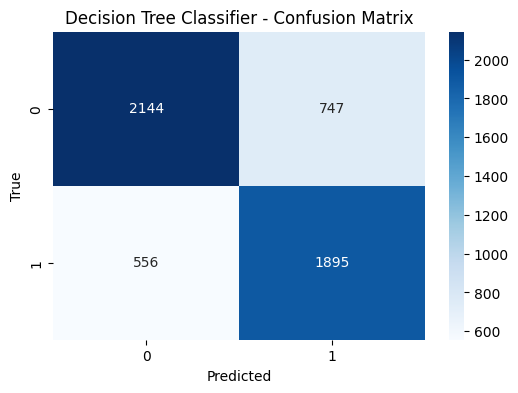

Train F1 Score (Micro) for Decision Tree Classifier is : 0.7553007254856073
Test F1 Score (Micro) for Decision Tree Classifier is : 0.7560838637214526
The Roc_Auc score for Decision Tree Classifier is : 0.8263763609711253


In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for test and train sets
pred_seasonal1 = dtc_seasonal.predict(X_test)
train_pred_seasonal1 = dtc_seasonal.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_seasonal1))

# Confusion matrix
cm = confusion_matrix(y_test, pred_seasonal1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_1 = f1_score(y_train, train_pred_seasonal1, average='micro')
score_1 = f1_score(y_test, pred_seasonal1, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Decision Tree Classifier is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for Decision Tree Classifier is : {}'.format(score_1))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, dtc_seasonal.predict_proba(X_test)[:, 1])
print('The Roc_Auc score for Decision Tree Classifier is : {}'.format(roc_auc))


### **MODEL 2: Logistic Regression**

In [84]:
# Setting up the logistic regression model to go through the pipeline
logreg_seasonal = Pipeline(steps=[
    ('preprocessor_seasonal', preprocessor_seasonal),
    ('classifier', LogisticRegression(max_iter=500, C=1, class_weight= 'balanced', solver= 'lbfgs',
                                      random_state=42))
])

In [85]:
# fitting the model to the training data
logreg_seasonal.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_seasonal',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'b...
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=500,
                                    random_state=42))])

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      2891
           1       0.76      0.77      0.77      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



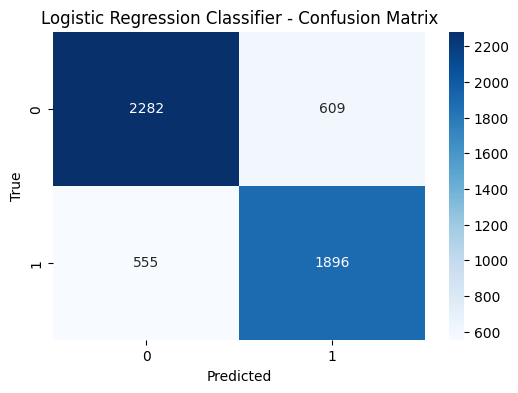

Train F1 Score (Micro) for Logistic Regression Classifier is : 0.774069740229347
Test F1 Score (Micro) for Logistic Regression Classifier is : 0.7821040808685885
The Roc_Auc score for Logistic Regression Classifier is : 0.8502382427152966


In [86]:
# Predictions for test and train sets
pred_seasonal2 = logreg_seasonal.predict(X_test)
train_pred_seasonal2 = logreg_seasonal.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_seasonal2))

# Confusion matrix
cm = confusion_matrix(y_test, pred_seasonal2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_2 = f1_score(y_train, train_pred_seasonal2, average='micro')
score_2 = f1_score(y_test, pred_seasonal2, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Logistic Regression Classifier is : {}'.format(train_score_2))
print('Test F1 Score (Micro) for Logistic Regression Classifier is : {}'.format(score_2))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, logreg_seasonal.predict_proba(X_test)[:, 1])
print('The Roc_Auc score for Logistic Regression Classifier is : {}'.format(roc_auc))


### **MODEL 3: KNN Classifier**

In [88]:
# Setting up the KNN model to go through the pipeline
knn_seasonal = Pipeline(steps=[
    ('preprocessor_seasonal', preprocessor_seasonal),
    ('classifier', KNeighborsClassifier(n_neighbors=5, p=1, weights= 'distance'))
])

In [89]:
# fitting the model to the training data
knn_seasonal.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_seasonal',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'b...
                                                   'rent_or_own',
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier', KNeighborsClassifier(p=1, weights='distance'))])

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2891
           1       0.67      0.66      0.66      2451

    accuracy                           0.69      5342
   macro avg       0.69      0.69      0.69      5342
weighted avg       0.69      0.69      0.69      5342



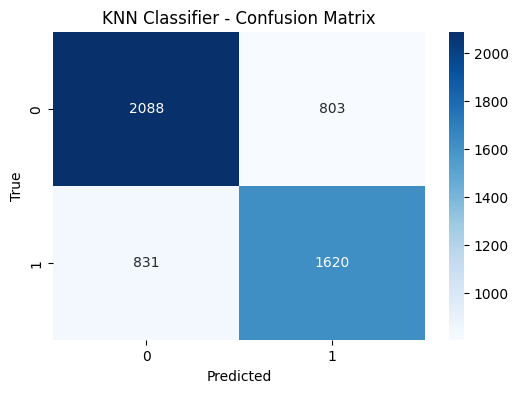

Train F1 Score (Micro) for kNN Classifier is : 0.9997659723847414
Test F1 Score (Micro) for kNN Classifier is : 0.6941220516660427
The Roc_Auc score for kNN Classifier is : 0.7542794143983755


In [90]:
# Predictions for test and train sets
pred_seasonal3 = knn_seasonal.predict(X_test)
train_pred_seasonal3 = knn_seasonal.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_seasonal3))

# Confusion matrix
cm = confusion_matrix(y_test, pred_seasonal3)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_3 = f1_score(y_train, train_pred_seasonal3, average='micro')
score_3 = f1_score(y_test, pred_seasonal3, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for kNN Classifier is : {}'.format(train_score_3))
print('Test F1 Score (Micro) for kNN Classifier is : {}'.format(score_3))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, knn_seasonal.predict_proba(X_test)[:, 1])
print('The Roc_Auc score for kNN Classifier is : {}'.format(roc_auc))

### **MODEL 4: Gradient Boosting Classifier**

In [91]:
# Setting up the gradient boosting classifier to go through the pipeline
gbc_seasonal = Pipeline(steps=[
    ('preprocessor_seasonal', preprocessor_seasonal),
    ('classifier', GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 200,
        random_state=42))
])

In [92]:
# fitting the model to the training data
gbc_seasonal.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_seasonal',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'b...
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=5, n_estimators=200,
                                            random_state=42))])

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      2891
           1       0.77      0.76      0.77      2451

    accuracy                           0.79      5342
   macro avg       0.79      0.79      0.79      5342
weighted avg       0.79      0.79      0.79      5342



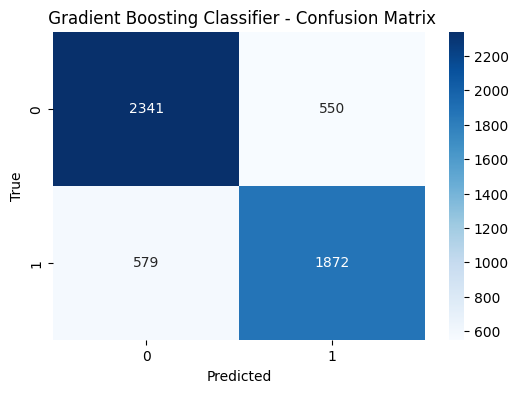

Train F1 Score (Micro) for Gradient Boosting Classifier is : 0.8297215071378423
Test F1 Score (Micro) for Gradient Boosting Classifier is : 0.788655934107076
The Roc_Auc score for Gradient Boosting Classifier is : 0.8572436214699144


In [93]:
# Predictions for test and train sets
pred_seasonal4 = gbc_seasonal.predict(X_test)
train_pred_seasonal4 = gbc_seasonal.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_seasonal4))

# Confusion matrix
cm = confusion_matrix(y_test, pred_seasonal4)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(' Gradient Boosting Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_4 = f1_score(y_train, train_pred_seasonal4, average='micro')
score_4 = f1_score(y_test, pred_seasonal4, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Gradient Boosting Classifier is : {}'.format(train_score_4))
print('Test F1 Score (Micro) for Gradient Boosting Classifier is : {}'.format(score_4))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, gbc_seasonal.predict_proba(X_test)[:, 1])
print('The Roc_Auc score for Gradient Boosting Classifier is : {}'.format(roc_auc))

### **MODEL 5: XG Boosting Classifier**

In [94]:
# Setting up the XG Boosting model to go through the pipeline
xgb_seasonal = Pipeline(steps=[
    ('preprocessor_seasonal', preprocessor_seasonal),
    ('classifier', xgboost.XGBClassifier(learning_rate= 1, max_depth= 2, n_estimators= 100, random_state=42))
])

In [95]:
# fitting the model to the training data
xgb_seasonal.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_seasonal',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'b...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2891
           1       0.77      0.76      0.77      2451

    accuracy                           0.79      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.79      0.79      0.79      5342



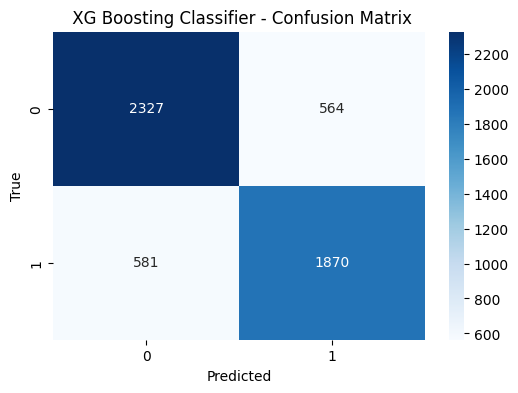

Train F1 Score (Micro) for XG Boosting Classifier is : 0.7916218113737421
Test F1 Score (Micro) for XG Boosting Classifier is : 0.7856608011980531
The Roc_Auc score for XG Boosting Classifier is : 0.8525071335921875


In [96]:
# Predictions for test and train sets
pred_seasonal5 = xgb_seasonal.predict(X_test)
train_pred_seasonal5 = xgb_seasonal.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_seasonal5))

# Confusion matrix
cm = confusion_matrix(y_test, pred_seasonal5)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(' XG Boosting Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_5 = f1_score(y_train, train_pred_seasonal5, average='micro')
score_5 = f1_score(y_test, pred_seasonal5, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for XG Boosting Classifier is : {}'.format(train_score_5))
print('Test F1 Score (Micro) for XG Boosting Classifier is : {}'.format(score_5))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, xgb_seasonal.predict_proba(X_test)[:, 1])
print('The Roc_Auc score for XG Boosting Classifier is : {}'.format(roc_auc))

### **MODEL 6: Random Forest Classifier**

In [97]:
# Setting up the RandomForestClassifier to go through the pipeline
rfc_seasonal = Pipeline(steps=[
    ('preprocessor_seasonal', preprocessor_seasonal),
    ('classifier', RandomForestClassifier(class_weight= 'balanced', max_depth= 5, min_samples_leaf= 1,
                                          n_estimators= 200, random_state=42))
])

In [98]:
# fitting the model to the training data
rfc_seasonal.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_seasonal',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'b...
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=200, random_state=42))])

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2891
           1       0.76      0.75      0.75      2451

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



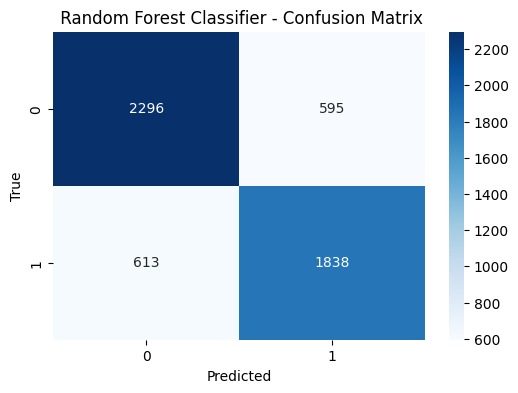

Train F1 Score (Micro) for Random Forest Classifier is : 0.7741165457523987
Test F1 Score (Micro) for Random Forest Classifier is : 0.7738674653687757
The Roc_Auc score for Random Forest Classifier is : 0.8447691671320313


In [99]:
# Predictions for test and train sets
pred_seasonal6 = rfc_seasonal.predict(X_test)
train_pred_seasonal6 = rfc_seasonal.predict(X_train)

# Classification report for test set
print(classification_report(y_test, pred_seasonal6))

# Confusion matrix
cm = confusion_matrix(y_test, pred_seasonal6)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(' Random Forest Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_6 = f1_score(y_train, train_pred_seasonal6, average='micro')
score_6 = f1_score(y_test, pred_seasonal6, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Random Forest Classifier is : {}'.format(train_score_6))
print('Test F1 Score (Micro) for Random Forest Classifier is : {}'.format(score_6))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, rfc_seasonal.predict_proba(X_test)[:, 1])
print('The Roc_Auc score for Random Forest Classifier is : {}'.format(roc_auc))

**Comparison of Model ROC Curves**

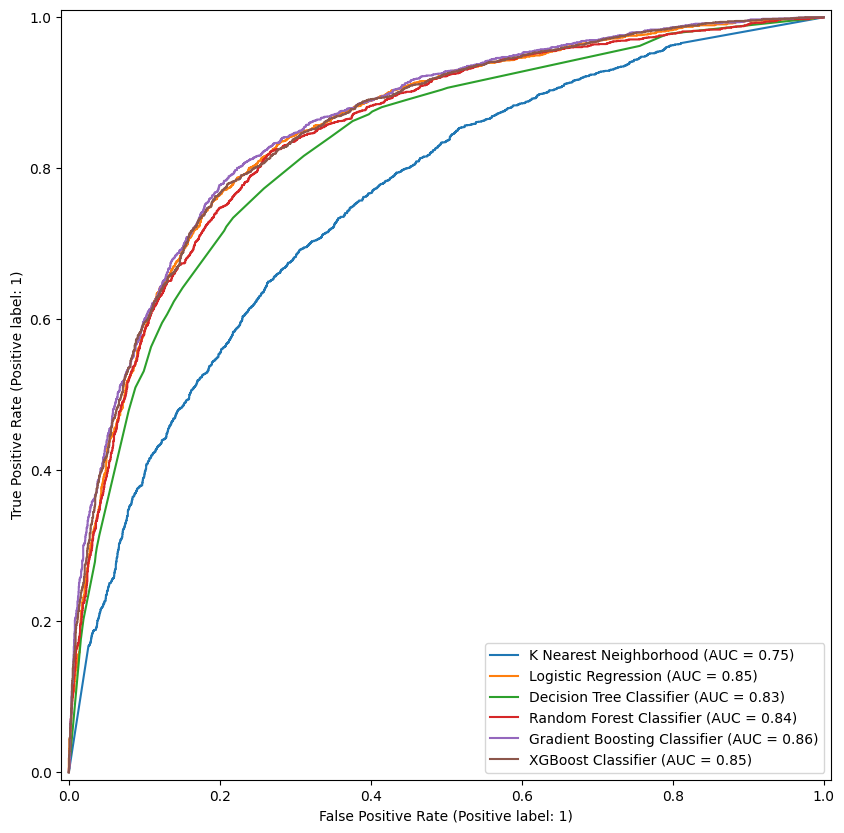

In [100]:
fig, ax = plt.subplots(figsize=(10, 10))
RocCurveDisplay.from_estimator(knn_seasonal, X_test, y_test, name='K Nearest Neighborhood', ax=ax)
RocCurveDisplay.from_estimator(logreg_seasonal, X_test, y_test, name='Logistic Regression', ax=ax)
RocCurveDisplay.from_estimator(dtc_seasonal, X_test, y_test, name='Decision Tree Classifier', ax=ax)
RocCurveDisplay.from_estimator(rfc_seasonal, X_test, y_test, name='Random Forest Classifier', ax=ax)
RocCurveDisplay.from_estimator(gbc_seasonal, X_test, y_test, name='Gradient Boosting Classifier', ax=ax)
RocCurveDisplay.from_estimator(xgb_seasonal, X_test, y_test, name='XGBoost Classifier', ax=ax)

In [101]:
final_model_seasonal = Pipeline(steps=[
    ('preprocessor_seasonal', preprocessor_seasonal),
    ('classifier', GradientBoostingClassifier(learning_rate =0.1, n_estimators=200,
                                              max_depth=5,
                                              random_state=42))
])


In [102]:
output_final_model_seasonal = final_model_seasonal.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      2891
           1       0.77      0.76      0.77      2451

    accuracy                           0.79      5342
   macro avg       0.79      0.79      0.79      5342
weighted avg       0.79      0.79      0.79      5342



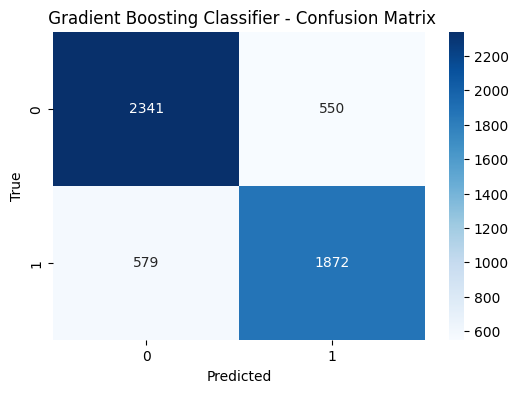

Train F1 Score (Micro) for Gradient Boosting Classifier is : 0.8297215071378423
Test F1 Score (Micro) for Gradient Boosting Classifier is : 0.788655934107076
The Roc_Auc score for Gradient Boosting Classifier is : 0.8572436214699144


In [103]:
# Predictions for test and train sets
final_pred_seasonal = final_model_seasonal.predict(X_test)
train_final_pred_seasonal = final_model_seasonal.predict(X_train)

# Classification report for test set
print(classification_report(y_test, final_pred_seasonal))

# Confusion matrix
cm = confusion_matrix(y_test, final_pred_seasonal)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(' Gradient Boosting Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_1 = f1_score(y_train, train_final_pred_seasonal, average='micro')
score_1 = f1_score(y_test, final_pred_seasonal, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Gradient Boosting Classifier is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for Gradient Boosting Classifier is : {}'.format(score_1))


# Print roc auc scores
roc_auc = roc_auc_score(y_test, final_model_seasonal.predict_proba(X_test)[:, 1])
print('The Roc_Auc score for Gradient Boosting Classifier is : {}'.format(roc_auc))

**Feature Importance**

In [104]:
# Accessing the features of the preproccesor
final_model_seasonal['preprocessor_seasonal']

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral_touch_face',
                                  'doctor_recc_season...
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 ['hhs_geo_region', 'employment_industry',
                                  'employment_occupation'])])

In [105]:
# We are looking at the shape of the preprocessor transformation.
final_model_seasonal['preprocessor_seasonal'].fit_transform(X_train).shape

(21365, 53)

In [106]:
# We are looking at the transformed data
pd.DataFrame(final_model_seasonal['preprocessor_seasonal'].fit_transform(X_train)).head()

0    1         2         3    4         5    6         7    8    9   \
0  0.007537  1.0  0.034474  0.919025  0.0  1.000000  1.0  0.140203  1.0  0.0   
1  1.000000  1.0  1.000000  0.919025  1.0  1.000000  1.0  0.140203  0.0  0.0   
2  0.007537  0.0  0.034474  0.919025  0.0  1.000000  0.0  0.140203  0.0  0.0   
3  0.007537  0.0  0.034474  0.000000  0.0  0.013708  0.0  0.140203  0.0  0.0   
4  0.007537  0.0  0.034474  0.919025  0.0  0.013708  0.0  0.140203  0.0  0.0   

         10        11    12    13    14        15        16   17   18   19  \
0  0.059194  0.000000  0.75  0.75  0.25  0.333333  0.000000  0.0  0.0  1.0   
1  0.059194  0.686242  1.00  0.75  0.75  0.000000  0.000000  0.0  0.0  1.0   
2  0.059194  0.916514  0.00  0.75  0.00  0.333333  0.333333  0.0  1.0  0.0   
3  0.059194  0.916514  0.75  0.25  0.25  0.000000  0.000000  0.0  0.0  1.0   
4  0.059194  0.916514  1.00  0.25  1.00  0.333333  0.333333  0.0  0.0  0.0   

    20   21   22   23   24   25   26   27   28   29   30   31   32   33   34  \
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
4  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

    35   36   37   38   39   40   41   42   43   44   45   46   47   48   49  \
0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
2  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
3  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
4  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   

         50        51        52  
0  0.159420  0.497402  0.502504  
1  0.159420  0.066791  0.374865  
2  0.117061  0.341774  0.065809  
3  0.105032  0.341774  0.374865  
4  0.082659  0.497402  0.502504

In [107]:
# We are looking at the feature importances coming out of. the gradient boosting classifier
final_model_seasonal['classifier'].feature_importances_

array([0.0041617 , 0.00199471, 0.00355142, 0.00290589, 0.00173822,
       0.00286419, 0.006683  , 0.18246968, 0.00751721, 0.00444598,
       0.02469147, 0.07736442, 0.2777085 , 0.16286631, 0.03156636,
       0.00608843, 0.00833899, 0.0252504 , 0.00264383, 0.00153973,
       0.00534738, 0.05529616, 0.00158432, 0.00489435, 0.00642995,
       0.00214127, 0.00087868, 0.00489672, 0.00389157, 0.0021603 ,
       0.00607559, 0.00180822, 0.00118785, 0.00139175, 0.00560413,
       0.0034971 , 0.00106381, 0.0019862 , 0.00231517, 0.00082912,
       0.00157732, 0.00746233, 0.00142635, 0.00122228, 0.00222016,
       0.00211698, 0.0007796 , 0.00299189, 0.00153738, 0.00240184,
       0.014949  , 0.00704227, 0.00460253])

In [108]:
# These are ohe_transformed columns!
ohe_cols_seasonal_transformed = final_model_seasonal['preprocessor_seasonal'].transformers_[1][1]['ohe_encoder'].get_feature_names_out(ohe_cols)
ohe_cols_seasonal_transformed


array(['age_group_18 - 34 Years', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_12 Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Some College', 'education_Unknown', 'race_Black',
       'race_Hispanic', 'race_Other or Multiple', 'race_White',
       'sex_Female', 'sex_Male',
       'income_poverty_<= $75,000, Above Poverty',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'income_poverty_Unknown', 'marital_status_Married',
       'marital_status_Not Married', 'marital_status_Unknown',
       'rent_or_own_Own', 'rent_or_own_Rent', 'rent_or_own_Unknown',
       'employment_status_Employed',
       'employment_status_Not in Labor Force',
       'employment_status_Unemployed', 'employment_status_Unknown',
       'census_msa_MSA, Not Principle  City',
       'census_msa_MSA, Principle City', 'census_msa_Non-MSA'],
      dtype=object)

In [109]:
# Name of the numerical columns
num_cols_seasonal

['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [110]:
# Putting all columns together
final_cols_seasonal = [*num_cols_seasonal, *ohe_cols_seasonal_transformed, *freq_cols_seasonal]
final_cols_seasonal

['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'age_group_18 - 34 Years',
 'age_group_35 - 44 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_< 12 Years',
 'education_College Graduate',
 'education_Some College',
 'education_Unknown',
 'race_Black',
 'race_Hispanic',
 'race_Other or Multiple',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_<= $75,000, Above Poverty',
 'income_poverty_> $75,000',
 'income_poverty_Below Poverty',
 'income_poverty_Unknown',
 'marital_status_Married',
 'marital_status_Not Married',
 'ma

In [111]:
# Name of the frequency columns
freq_cols_seasonal

['hhs_geo_region', 'employment_industry', 'employment_occupation']

In [112]:
# Put together the final cols and the feature importances
# Then sort them by feature importances
import pandas as pd

# Create a dictionary where the feature names are the keys and their importance values are the values
feature_importance_dict_seasonal = dict(zip(final_cols, final_model_seasonal['classifier'].feature_importances_))


# Convert the dictionary to a DataFrame and sort by the importance values
feature_importance_df_seasonal = pd.DataFrame.from_dict(feature_importance_dict_seasonal, orient='index', columns=['Importance'])
feature_importance_df_seasonal.sort_values(by='Importance', ascending=False, inplace=True)

# Display the result
feature_importance_df_seasonal


Importance
child_under_6_months                        0.277708
behavioral_outside_home                     0.182470
health_worker                               0.162866
chronic_med_condition                       0.077364
household_adults                            0.055296
health_insurance                            0.031566
opinion_h1n1_sick_from_vacc                 0.025250
doctor_recc_seasonal                        0.024691
employment_status_Not in Labor Force        0.014949
opinion_h1n1_risk                           0.008339
behavioral_touch_face                       0.007517
income_poverty_Below Poverty                0.007462
employment_status_Unemployed                0.007042
behavioral_large_gatherings                 0.006683
age_group_35 - 44 Years                     0.006430
opinion_h1n1_vacc_effective                 0.006088
education_College Graduate                  0.006076
race_Hispanic                               0.005604
opinion_seas_sick_from_vacc                 0.005347
age_group_65+ Years                         0.004897
age_group_18 - 34 Years                     0.004894
employment_status_Unknown                   0.004603
doctor_recc_h1n1                            0.004446
h1n1_concern                                0.004162
education_12 Years                          0.003892
behavioral_antiviral_meds                   0.003551
race_Other or Multiple                      0.003497
rent_or_own_Rent                            0.002992
behavioral_avoidance                        0.002906
behavioral_wash_hands                       0.002864
opinion_seas_vacc_effective                 0.002644
employment_status_Employed                  0.002402
sex_Male                                    0.002315
marital_status_Not Married                  0.002220
education_< 12 Years                        0.002160
age_group_45 - 54 Years                     0.002141
marital_status_Unknown                      0.002117
h1n1_knowledge                              0.001995
sex_Female                                  0.001986
education_Some College                      0.001808
behavioral_face_mask                        0.001738
household_children                          0.001584
income_poverty_> $75,000                    0.001577
opinion_seas_risk                           0.001540
rent_or_own_Unknown                         0.001537
income_poverty_Unknown                      0.001426
race_Black                                  0.001392
marital_status_Married                      0.001222
education_Unknown                           0.001188
race_White                                  0.001064
age_group_55 - 64 Years                     0.000879
income_poverty_<= $75,000, Above Poverty    0.000829
rent_or_own_Own                             0.000780

## **Final Conclusion**



**The Key findings from the analysis are:**

- The dataset contains a significant number of null values, contributing to class imbalance and skewness in the data.
- The H1N1 vaccine has a lower uptake rate (21%) compared to the Seasonal vaccine (47%).
- The reasons for the higher uptake rate of the Seasonal vaccine include its effectiveness, doctor's recommendation, and the risk of seasonal infection.

We have worked on various machine learning models including Decision Tree Classifier, Logistic Regression, KNN Classifier, Gradient Boosting Classifier, XG Boosting Classifier, and Random Forest Classifier. The models are evaluated using metrics such as F1 score, ROC AUC score, and confusion matrices.

From this we found that Gradient Boosting Classifier is the best-performing model for both H1N1 and Seasonal vaccines, with high F1 scores and ROC AUC scores. The feature importance analysis reveals that the most important features for predicting vaccination uptake are related to the effectiveness of the vaccine, doctor's recommendation, and the risk of infection.

Overall, project provides a thorough analysis of the vaccination prediction data and identifies the key factors influencing vaccination uptake. The findings can be used to inform public health strategies and improve vaccination rates.